# Problem Set 4

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set so make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 3.3 will be relatively painless or incredibly painful. 
* Do the extra credit problems last!

---

## Introduction to the assignment

As with the last assignment, you will be using the Boston Housing Prices Data Set.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import random
%matplotlib inline   
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 

In [2]:
# Load the Boston Housing data into a dataframe
# Target.txt contains the median house values and Data.txt contains the other 13 features
# in order ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

---

## Part 1: Getting Oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, explore the relationship between  median housing price and the percentage of lower status of the population using a linear regression model. Do this by - 
- (a) Regressing the `MEDV` (median housing price) on `LSTAT` (Percentage of lower status of the population)
- (b) Regressing the `MEDV` (median housing price) on `LSTAT` **and** the natural log transformed value of `LSTAT`

Interpret the results of both models by comparing them in terms of coefficients, their statistical significance and the variance explained by each model.


*Hint-*
* *You can use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn and OLS model from stats package.*

In [3]:
df = pd.DataFrame(data, columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
 ,'B', 'LSTAT'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685
503,0.226099,0.0,12.254201,0.0,0.689092,7.199346,91.0,2.348891,1.0,284.0,21.042043,398.026747,5.831161
504,0.139833,0.0,12.054379,0.0,0.650875,7.065029,89.3,2.783274,1.0,275.0,21.105130,395.290366,6.890841


In [4]:
lstat = df[['LSTAT']]
lstat 

,LSTAT
0,5.715647
1,9.338417
2,4.142473
3,3.239272
4,6.115159
...,...
501,9.795056
502,9.785685
503,5.831161
504,6.890841


In [5]:
# Regressing the MEDV on LSTAT
from sklearn.linear_model import LinearRegression
X = lstat
y = target
reg_X = LinearRegression().fit(X, y)
#reg_X.score(X, y)
#reg.intercept_

In [6]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error

y_train_predict = reg_X.predict(X)
rmse = (np.sqrt(mean_squared_error(y, y_train_predict)))
r2 = reg_X.score(X, y)
intercept = reg_X.intercept_
coe = reg_X.coef_

print("The model performance for training set")
print("--------------------------------------")
print('Intercept is {}'.format(intercept))
print('Coefficient is {}'.format(coe))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
Intercept is 34.93274191627465
Coefficient is [-0.94876815]
RMSE is 6.216088147787075
R2 score is 0.5422890901063222




In [7]:
#log transform
lstat['log'] = np.log(lstat['LSTAT'])
lstat

<ipython-input-7-58a7c2a1af49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lstat['log'] = np.log(lstat['LSTAT'])


,LSTAT,log
0,5.715647,1.743207
1,9.338417,2.234137
2,4.142473,1.421293
3,3.239272,1.175349
4,6.115159,1.810771
...,...,...
501,9.795056,2.281878
502,9.785685,2.280921
503,5.831161,1.763216
504,6.890841,1.930193


In [8]:
# Regressing MEDV on log LSTAT
X_log = lstat[['log']]
y = target
reg_log = LinearRegression().fit(X_log, y)
reg_log.score(X_log, y)

0.6562266801567944

In [9]:
logy_train_predict = reg_log.predict(X_log)
rmse_log = (np.sqrt(mean_squared_error(y, logy_train_predict)))
r2_log = reg_log.score(X_log, y)
intercept_log = reg_log.intercept_
coe_log = reg_log.coef_

print("The model performance for training set")
print("--------------------------------------")
print('Intercept is {}'.format(intercept_log))
print('Coefficient is {}'.format(coe_log))
print('RMSE is {}'.format(rmse_log))
print('R2 score is {}'.format(r2_log))
print("\n")

The model performance for training set
--------------------------------------
Intercept is 53.98182755315706
Coefficient is [-13.01424447]
RMSE is 5.387131990168327
R2 score is 0.6562266801567944




- The intercept for MEDV on LSTAT model is 34.93, the intercept for MEDV for log LSTAT is 53.98; 
- The RMSE of MEDV on LSTAT is 6.21, the RMSE of MEDV on log STAT is 5.38, indicates that the Log transformed model fits better than the original  model. 
- The R^2 of the regression MEDV on LSTAT is 0.542; the R^2 of the regresson MEDV on log LSTAT is 0.656, which indicates that the log trasformed model fits better than the original model.


### 1.2 Regression lines

Create a scatterplot of `MEDV` on the y-axis and `LSTAT` on the x-axis, and add the two regression lines from 1.1. Show the linear regression line in red, and the linear+log regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

**Bonus**: Add the 95% confidence bands (i.e.  the area that has a 95% chance of containing the true regression line) to each of these lines.

In [10]:
df_target = pd.DataFrame(target, columns = ['MEDV'])
lmdf = lstat.merge(df_target, left_index= True, right_index= True)[['LSTAT','MEDV','log']]
lmdf

,LSTAT,MEDV,log
0,5.715647,24.0,1.743207
1,9.338417,21.6,2.234137
2,4.142473,34.7,1.421293
3,3.239272,33.4,1.175349
4,6.115159,36.2,1.810771
...,...,...,...
501,9.795056,22.4,2.281878
502,9.785685,20.6,2.280921
503,5.831161,23.9,1.763216
504,6.890841,22.0,1.930193


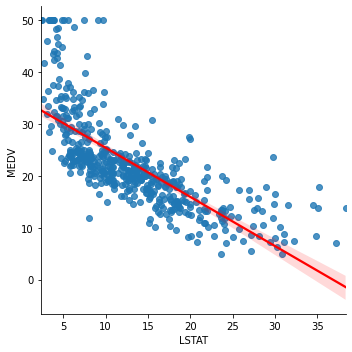

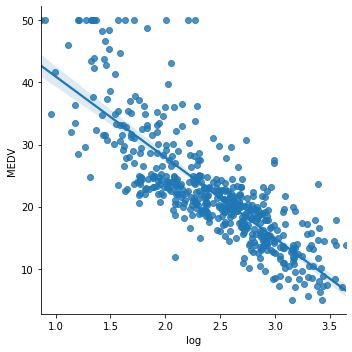

In [11]:
# Your code here
import seaborn as sns
sns.lmplot(x='LSTAT', y='MEDV', data= lmdf,ci = 95, line_kws={'color': 'red'});
#sns.lmplot(x = float(np.log(lmdf['LSTAT'])), y = 'MEDV', data= lmdf);
sns.lmplot(x='log', y= 'MEDV', data = lmdf, ci= 95)

### 1.3 Cross-Validation

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Before you proceed with cross-validation, split your dataset into training and test sets, using a 90-10 split. You can use the [train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) functions from sklearn. After that, using the cross-validation functions from scikit-learn, use 40-fold cross-validation to fit regression (a) from above, i.e. the linear fit of `MEDV` on `LSTAT`. Remember to use the **training set only**. We'll touch the test set only later. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 40 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?


*NOTE - In the `train_test_split` function be sure to set a random_state of 42.*

In [12]:
df_2 = df['LSTAT']
#df_2 = df_2.merge(df_target, left_index = True, right_index=True)
df_2

0      5.715647
1      9.338417
2      4.142473
3      3.239272
4      6.115159
         ...   
501    9.795056
502    9.785685
503    5.831161
504    6.890841
505    8.106447
Name: LSTAT, Length: 506, dtype: float64

In [13]:
from sklearn.model_selection import KFold

# split dataset using 90-10 split [array]

x_train, x_test, y_train, y_test = train_test_split(df_2, target,
                                                    test_size=0.1, random_state = 42, shuffle=True)

In [14]:
#sanity check 
len(x_test)/len(lmdf)

0.1007905138339921

In [15]:
x_train

281     4.790841
22     19.228462
101     7.781176
268     3.747244
485    10.610438
         ...    
106    18.847692
270    13.766952
348     6.304298
435    23.699868
102    11.287689
Name: LSTAT, Length: 455, dtype: float64

In [16]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9])

In [17]:
#split in dataframe
X_train, X_test, Y_train, Y_test = train_test_split(df, df_target,
                                                    test_size=0.1, random_state = 42, shuffle=True)

In [18]:
from sklearn.model_selection import cross_validate
import warnings 
warnings.filterwarnings('ignore')

coe = []

lm = sklearn.linear_model.LinearRegression()

cv_results = cross_validate(lm, X_train[['LSTAT']], y_train, cv=40, return_estimator=True)

for model in cv_results["estimator"]:
    coe.append(model.coef_)
    print(model.coef_)

[-0.94695227]
[-0.96076579]
[-0.94755234]
[-0.9673255]
[-0.96389885]
[-0.95277517]
[-0.9627124]
[-0.96125186]
[-0.94730534]
[-0.94795239]
[-0.96646233]
[-0.95305858]
[-0.95664851]
[-0.94083834]
[-0.93644213]
[-0.9602972]
[-0.95611004]
[-0.9595209]
[-0.95241202]
[-0.95597654]
[-0.94664206]
[-0.94756661]
[-0.94489653]
[-0.96711453]
[-0.9496485]
[-0.95882538]
[-0.93529007]
[-0.94582173]
[-0.94364669]
[-0.96037369]
[-0.95599416]
[-0.94712379]
[-0.94852794]
[-0.9547781]
[-0.94969208]
[-0.95281644]
[-0.96141019]
[-0.9500209]
[-0.96442794]
[-0.95981981]


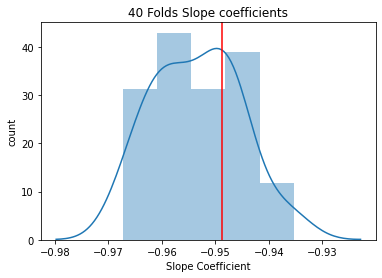

In [19]:
sns.distplot(coe)
plt.title('40 Folds Slope coefficients')
plt.xlabel('Slope Coefficient')
plt.ylabel('count')

plt.axvline(x=-0.94876815,color='red')


- The coefficient from estimated is -0.94, which is in the most frequent band of the density, according to the density kernel plot. 

## Part 2: Gradient Descent: Linear Regression

This is where it gets fun!

*Note - For all of part 2, only use your training set that you created in 1.3*

### 2.1 Implement gradient descent with one independent variable (LSTAT)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the percentage of lower status of the population i.e. `MEDV`~`LSTAT`. Experiment with 3-4 different values of the learning rate *R*, and do the following for each *R*:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge
* Report the total running time of your algorithm, in seconds

How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.


*HINTS-*
* Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to - 
    * (a) check to see if the loss has stopped decreasing,
    * (b) check if both your current parameter estimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 1e-6).
* We recommend you include a MaxIterations parameter in your gradient descent algorithm, to prevent divergence.

In [20]:
#reference check
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_train, y_train)
print('intercept and slope from stats {}, {}'.format(intercept, slope))

intercept and slope from stats 35.0387926190787, -0.9534939195110951


In [21]:
import time

"""
Function
--------
bivariate_ols
    Gradient Descent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    coefficient
    
    
"""
import time

def bivariate_ols(xvalues, yvalues, R=0.001, MaxIterations=100000):
    
    start_time = time.time()
    
    #convert to np array 
    x_arr = np.array(xvalues)
    y_arr = np.array(yvalues)
    
    #initialize 
    J = np.inf  #cost function 
    epilon = 1e-6
    
    converged = False
    iteration = 0
    m = len(x_arr)

    alpha = 0.0
    beta = 0.0
      
    #iteration
    while not converged:

        gd_alpha = alpha
        gd_beta = beta
        J_old = J
        
        #update
        alpha = gd_alpha - R / m * ((gd_alpha + gd_beta * x_arr - y_arr).sum())
        beta = gd_beta - R / m * (((gd_alpha + gd_beta * x_arr - y_arr) * x_arr).sum())
        
        #gd0 = 1.0 / m * sum([alpha + beta*xvalues[i] - yvalues[i] for i in range(m)])
        #gd1 = 1.0/m * sum([alpha + beta * xvalues[i] - yvalues[i] * xvalues[i] for i in range(m)])
        
        # cost function 
        J = 1.0 / (2 * m) * ((((alpha + beta * x_arr) - y_arr) ** 2).sum())
        print('cost is: {}'.format(J))
        
        iteration += 1
        
        if iteration == MaxIterations:
            print('Exceeded.')
            converged = True

        if (J_old - J) < 0:
            print('Diverged')
            converged = True
            
        if abs(alpha - gd_alpha) < epilon and abs(beta - gd_beta) < epilon:
            
            print('converge after iterations: {}'.format(iteration))
            converged = True
        
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    
    return alpha, beta

# example function call
print(bivariate_ols(X_train['LSTAT'], y_train))

cost is: 247.01199630699588
cost is: 214.22020753304236
cost is: 194.230581114846
cost is: 182.0348412686854
cost is: 174.5839818162786
cost is: 170.02178734779912
cost is: 167.21820582234318
cost is: 165.48526880018156
cost is: 164.40414550232708
cost is: 163.71985443132561
cost is: 163.27716448134498
cost is: 162.9815719451464
cost is: 162.7755435662337
cost is: 162.62405346138618
cost is: 162.50577809186663
cost is: 162.40773581837138
cost is: 162.32202349646704
cost is: 162.24382973682492
cost is: 162.17022539079537
cost is: 162.09942720578337
cost is: 162.03034954336465
cost is: 161.9623314681501
cost is: 161.8949706012366
cost is: 161.82802197125434
cost is: 161.76133643553237
cost is: 161.69482319129978
cost is: 161.62842695274531
cost is: 161.56211405655742
cost is: 161.49586400306646
cost is: 161.429664306546
cost is: 161.36350736010974
cost is: 161.29738852708047
cost is: 161.2313049790278
cost is: 161.16525498837314
cost is: 161.0992374977321
cost is: 161.03325185773275
cost

cost is: 128.88779268049962
cost is: 128.83686770006247
cost is: 128.78596652748575
cost is: 128.7350891516391
cost is: 128.6842355613973
cost is: 128.6334057456404
cost is: 128.58259969325366
cost is: 128.53181739312743
cost is: 128.48105883415735
cost is: 128.43032400524427
cost is: 128.37961289529417
cost is: 128.32892549321818
cost is: 128.27826178793273
cost is: 128.22762176835937
cost is: 128.17700542342482
cost is: 128.12641274206092
cost is: 128.07584371320485
cost is: 128.02529832579881
cost is: 127.97477656879019
cost is: 127.92427843113167
cost is: 127.87380390178093
cost is: 127.8233529697009
cost is: 127.77292562385968
cost is: 127.72252185323048
cost is: 127.67214164679169
cost is: 127.62178499352682
cost is: 127.57145188242461
cost is: 127.5211423024789
cost is: 127.4708562426887
cost is: 127.42059369205803
cost is: 127.37035463959626
cost is: 127.32013907431774
cost is: 127.26994698524209
cost is: 127.21977836139385
cost is: 127.16963319180297
cost is: 127.1195114655042

cost is: 86.5940027150296
cost is: 86.56285044023747
cost is: 86.53171272939811
cost is: 86.50058957570275
cost is: 86.4694809723458
cost is: 86.43838691252488
cost is: 86.4073073894407
cost is: 86.37624239629727
cost is: 86.34519192630171
cost is: 86.31415597266431
cost is: 86.28313452859855
cost is: 86.25212758732108
cost is: 86.22113514205176
cost is: 86.19015718601354
cost is: 86.15919371243258
cost is: 86.12824471453825
cost is: 86.097310185563
cost is: 86.06639011874252
cost is: 86.03548450731562
cost is: 86.00459334452427
cost is: 85.97371662361358
cost is: 85.94285433783195
cost is: 85.91200648043073
cost is: 85.88117304466458
cost is: 85.85035402379124
cost is: 85.81954941107165
cost is: 85.78875919976988
cost is: 85.75798338315309
cost is: 85.72722195449172
cost is: 85.69647490705921
cost is: 85.66574223413225
cost is: 85.63502392899066
cost is: 85.60431998491732
cost is: 85.57363039519835
cost is: 85.54295515312297
cost is: 85.51229425198349
cost is: 85.48164768507546
cost i

cost is: 70.71744436250017
cost is: 70.69371451344044
cost is: 70.66999575828648
cost is: 70.64628809185177
cost is: 70.62259150895227
cost is: 70.59890600440632
cost is: 70.57523157303471
cost is: 70.55156820966064
cost is: 70.52791590910971
cost is: 70.50427466620995
cost is: 70.48064447579183
cost is: 70.45702533268822
cost is: 70.43341723173442
cost is: 70.4098201677681
cost is: 70.38623413562941
cost is: 70.36265913016084
cost is: 70.33909514620736
cost is: 70.31554217861628
cost is: 70.29200022223739
cost is: 70.26846927192285
cost is: 70.24494932252723
cost is: 70.22144036890748
cost is: 70.19794240592303
cost is: 70.17445542843564
cost is: 70.15097943130948
cost is: 70.12751440941119
cost is: 70.10406035760968
cost is: 70.08061727077641
cost is: 70.05718514378512
cost is: 70.03376397151203
cost is: 70.01035374883567
cost is: 69.98695447063703
cost is: 69.96356613179948
cost is: 69.94018872720878
cost is: 69.91682225175306
cost is: 69.89346670032286
cost is: 69.87012206781112
co

cost is: 50.10813435562889
cost is: 50.094039533854364
cost is: 50.079951301528595
cost is: 50.06586965557098
cost is: 50.05179459290232
cost is: 50.037726110444886
cost is: 50.023664205122344
cost is: 50.00960887385986
cost is: 49.995560113583984
cost is: 49.98151792122274
cost is: 49.96748229370556
cost is: 49.95345322796333
cost is: 49.93943072092836
cost is: 49.92541476953439
cost is: 49.911405370716615
cost is: 49.897402521411664
cost is: 49.88340621855755
cost is: 49.869416459093785
cost is: 49.85543323996126
cost is: 49.84145655810232
cost is: 49.82748641046074
cost is: 49.8135227939817
cost is: 49.79956570561183
cost is: 49.7856151422992
cost is: 49.77167110099329
cost is: 49.757733578644974
cost is: 49.74380257220662
cost is: 49.729878078631984
cost is: 49.71596009487621
cost is: 49.70204861789593
cost is: 49.68814364464918
cost is: 49.6742451720954
cost is: 49.66035319719544
cost is: 49.64646771691162
cost is: 49.632588728207644
cost is: 49.61871622804863
cost is: 49.60485021

cost is: 42.668501642933414
cost is: 42.65788491257267
cost is: 42.647273145623444
cost is: 42.6366663397653
cost is: 42.626064492678886
cost is: 42.61546760204593
cost is: 42.60487566554926
cost is: 42.59428868087275
cost is: 42.58370664570141
cost is: 42.5731295577213
cost is: 42.56255741461955
cost is: 42.55199021408441
cost is: 42.54142795380517
cost is: 42.530870631472226
cost is: 42.52031824477706
cost is: 42.50977079141218
cost is: 42.49922826907126
cost is: 42.488690675448964
cost is: 42.478158008241095
cost is: 42.467630265144514
cost is: 42.45710744385714
cost is: 42.446589542078016
cost is: 42.4360765575072
cost is: 42.42556848784585
cost is: 42.415065330796246
cost is: 42.404567084061675
cost is: 42.39407374534652
cost is: 42.38358531235623
cost is: 42.37310178279736
cost is: 42.362623154377495
cost is: 42.352149424805326
cost is: 42.34168059179061
cost is: 42.331216653044144
cost is: 42.32075760627782
cost is: 42.31030344920459
cost is: 42.29985417953851
cost is: 42.289409

cost is: 33.403819630663335
cost is: 33.39753421774831
cost is: 33.39125174331714
cost is: 33.38497220599607
cost is: 33.37869560441199
cost is: 33.37242193719239
cost is: 33.366151202965455
cost is: 33.35988340035997
cost is: 33.35361852800538
cost is: 33.34735658453177
cost is: 33.34109756856985
cost is: 33.33484147875101
cost is: 33.328588313707236
cost is: 33.32233807207118
cost is: 33.316090752476114
cost is: 33.309846353555955
cost is: 33.30360487394528
cost is: 33.29736631227928
cost is: 33.29113066719378
cost is: 33.28489793732527
cost is: 33.27866812131085
cost is: 33.27244121778828
cost is: 33.26621722539592
cost is: 33.25999614277283
cost is: 33.253777968558644
cost is: 33.247562701393655
cost is: 33.2413503399188
cost is: 33.235140882775646
cost is: 33.22893432860638
cost is: 33.22273067605386
cost is: 33.21652992376153
cost is: 33.21033207037352
cost is: 33.20413711453455
cost is: 33.197945054889985
cost is: 33.19175589008586
cost is: 33.18556961876877
cost is: 33.17938623

cost is: 30.181361080340803
cost is: 30.176582194138582
cost is: 30.171805542106203
cost is: 30.167031123199173
cost is: 30.162258936373497
cost is: 30.15748898058565
cost is: 30.152721254792606
cost is: 30.147955757951816
cost is: 30.143192489021228
cost is: 30.138431446959284
cost is: 30.133672630724895
cost is: 30.12891603927747
cost is: 30.12416167157691
cost is: 30.11940952658359
cost is: 30.114659603258357
cost is: 30.109911900562587
cost is: 30.105166417458108
cost is: 30.100423152907247
cost is: 30.09568210587281
cost is: 30.090943275318082
cost is: 30.08620666020684
cost is: 30.081472259503357
cost is: 30.076740072172363
cost is: 30.0720100971791
cost is: 30.067282333489278
cost is: 30.062556780069094
cost is: 30.057833435885225
cost is: 30.05311229990484
cost is: 30.048393371095578
cost is: 30.04367664842558
cost is: 30.038962130863442
cost is: 30.034249817378264
cost is: 30.029539706939616
cost is: 30.02483179851757
cost is: 30.02012609108265
cost is: 30.015422583605886
cost

cost is: 25.885054475234675
cost is: 25.882284148821785
cost is: 25.879515117560008
cost is: 25.87674738084383
cost is: 25.87398093806806
cost is: 25.87121578862775
cost is: 25.86845193191827
cost is: 25.86568936733525
cost is: 25.862928094274608
cost is: 25.860168112132552
cost is: 25.85740942030556
cost is: 25.85465201819041
cost is: 25.85189590518414
cost is: 25.849141080684085
cost is: 25.846387544087854
cost is: 25.843635294793344
cost is: 25.840884332198733
cost is: 25.838134655702476
cost is: 25.83538626470331
cost is: 25.832639158600248
cost is: 25.829893336792605
cost is: 25.827148798679946
cost is: 25.824405543662145
cost is: 25.82166357113934
cost is: 25.818922880511952
cost is: 25.816183471180686
cost is: 25.81344534254652
cost is: 25.81070849401073
cost is: 25.807972924974845
cost is: 25.8052386348407
cost is: 25.802505623010383
cost is: 25.799773888886286
cost is: 25.79704343187107
cost is: 25.79431425136768
cost is: 25.79158634677933
cost is: 25.788859717509517
cost is: 

cost is: 24.54122729736242
cost is: 24.539085221556718
cost is: 24.53694414718963
cost is: 24.53480407379297
cost is: 24.53266500089879
cost is: 24.530526928039322
cost is: 24.528389854747065
cost is: 24.526253780554704
cost is: 24.524118704995146
cost is: 24.521984627601533
cost is: 24.51985154790721
cost is: 24.517719465445733
cost is: 24.515588379750902
cost is: 24.51345829035671
cost is: 24.511329196797384
cost is: 24.509201098607367
cost is: 24.507073995321306
cost is: 24.504947886474078
cost is: 24.502822771600773
cost is: 24.500698650236707
cost is: 24.49857552191739
cost is: 24.49645338617858
cost is: 24.494332242556233
cost is: 24.49221209058653
cost is: 24.49009292980586
cost is: 24.487974759750834
cost is: 24.485857579958278
cost is: 24.48374138996524
cost is: 24.48162618930898
cost is: 24.47951197752697
cost is: 24.477398754156905
cost is: 24.475286518736695
cost is: 24.473175270804465
cost is: 24.47106500989856
cost is: 24.468955735557522
cost is: 24.466847447320145
cost i

cost is: 22.627911373734488
cost is: 22.62666378935636
cost is: 22.62541678823452
cost is: 22.624170370096277
cost is: 22.622924534669092
cost is: 22.62167928168054
cost is: 22.62043461085832
cost is: 22.61919052193027
cost is: 22.617947014624352
cost is: 22.61670408866865
cost is: 22.615461743791375
cost is: 22.614219979720872
cost is: 22.61297879618561
cost is: 22.61173819291418
cost is: 22.61049816963531
cost is: 22.609258726077837
cost is: 22.608019861970742
cost is: 22.60678157704314
cost is: 22.605543871024235
cost is: 22.604306743643395
cost is: 22.603070194630106
cost is: 22.60183422371397
cost is: 22.600598830624723
cost is: 22.599364015092227
cost is: 22.598129776846474
cost is: 22.596896115617565
cost is: 22.595663031135757
cost is: 22.5944305231314
cost is: 22.593198591334993
cost is: 22.591967235477156
cost is: 22.590736455288628
cost is: 22.589506250500275
cost is: 22.588276620843104
cost is: 22.587047566048227
cost is: 22.585819085846897
cost is: 22.584591179970488
cost 

cost is: 21.972224007427037
cost is: 21.97128296245575
cost is: 21.970342357430976
cost is: 21.96940219214703
cost is: 21.96846246639833
cost is: 21.96752317997939
cost is: 21.966584332684818
cost is: 21.965645924309328
cost is: 21.964707954647707
cost is: 21.963770423494868
cost is: 21.962833330645793
cost is: 21.96189667589558
cost is: 21.960960459039413
cost is: 21.96002467987256
cost is: 21.95908933819041
cost is: 21.958154433788437
cost is: 21.957219966462194
cost is: 21.95628593600736
cost is: 21.955352342219687
cost is: 21.954419184895034
cost is: 21.95348646382935
cost is: 21.95255417881867
cost is: 21.951622329659145
cost is: 21.950690916147014
cost is: 21.949759938078596
cost is: 21.948829395250325
cost is: 21.94789928745872
cost is: 21.946969614500404
cost is: 21.946040376172075
cost is: 21.945111572270555
cost is: 21.944183202592736
cost is: 21.94325526693562
cost is: 21.942327765096298
cost is: 21.94140069687195
cost is: 21.94047406205987
cost is: 21.93954786045742
cost is

cost is: 21.19413483187863
cost is: 21.193557550198513
cost is: 21.192980538402473
cost is: 21.192403796364346
cost is: 21.191827323958016
cost is: 21.191251121057427
cost is: 21.190675187536584
cost is: 21.190099523269545
cost is: 21.189524128130437
cost is: 21.18894900199344
cost is: 21.188374144732787
cost is: 21.18779955622279
cost is: 21.18722523633778
cost is: 21.186651184952204
cost is: 21.186077401940516
cost is: 21.18550388717726
cost is: 21.184930640537008
cost is: 21.184357661894435
cost is: 21.183784951124238
cost is: 21.18321250810118
cost is: 21.182640332700096
cost is: 21.18206842479587
cost is: 21.181496784263437
cost is: 21.180925410977796
cost is: 21.180354304814024
cost is: 21.179783465647223
cost is: 21.179212893352585
cost is: 21.178642587805328
cost is: 21.178072548880753
cost is: 21.17750277645421
cost is: 21.176933270401115
cost is: 21.176364030596933
cost is: 21.175795056917185
cost is: 21.175226349237462
cost is: 21.1746579074334
cost is: 21.174089731380715
co

cost is: 20.924431861384274
cost is: 20.923980668131115
cost is: 20.923529685814636
cost is: 20.923078914336216
cost is: 20.922628353597283
cost is: 20.922178003499322
cost is: 20.92172786394385
cost is: 20.92127793483244
cost is: 20.920828216066706
cost is: 20.920378707548313
cost is: 20.91992940917897
cost is: 20.91948032086042
cost is: 20.919031442494475
cost is: 20.918582773982973
cost is: 20.918134315227803
cost is: 20.917686066130905
cost is: 20.917238026594266
cost is: 20.916790196519912
cost is: 20.91634257580992
cost is: 20.9158951643664
cost is: 20.91544796209153
cost is: 20.915000968887522
cost is: 20.914554184656627
cost is: 20.914107609301148
cost is: 20.913661242723443
cost is: 20.913215084825893
cost is: 20.912769135510942
cost is: 20.91232339468109
cost is: 20.911877862238843
cost is: 20.911432538086807
cost is: 20.910987422127583
cost is: 20.91054251426385
cost is: 20.91009781439832
cost is: 20.909653322433748
cost is: 20.909209038272937
cost is: 20.90876496181874
cost

cost is: 20.53958378370463
cost is: 20.539312510192982
cost is: 20.53904136350401
cost is: 20.538770343578406
cost is: 20.53849945035692
cost is: 20.538228683780314
cost is: 20.537958043789384
cost is: 20.53768753032494
cost is: 20.537417143327836
cost is: 20.537146882738952
cost is: 20.536876748499175
cost is: 20.53660674054946
cost is: 20.536336858830744
cost is: 20.536067103284022
cost is: 20.535797473850305
cost is: 20.535527970470646
cost is: 20.5352585930861
cost is: 20.53498934163777
cost is: 20.53472021606677
cost is: 20.53445121631426
cost is: 20.534182342321415
cost is: 20.533913594029446
cost is: 20.53364497137958
cost is: 20.533376474313084
cost is: 20.533108102771244
cost is: 20.53283985669537
cost is: 20.532571736026824
cost is: 20.53230374070696
cost is: 20.53203587067718
cost is: 20.531768125878916
cost is: 20.531500506253614
cost is: 20.53123301174276
cost is: 20.53096564228786
cost is: 20.530698397830445
cost is: 20.53043127831208
cost is: 20.530164283674363
cost is: 

cost is: 20.38549981403507
cost is: 20.385300576086554
cost is: 20.38510143128347
cost is: 20.384902379582257
cost is: 20.384703420939417
cost is: 20.384504555311427
cost is: 20.384305782654806
cost is: 20.384107102926087
cost is: 20.383908516081828
cost is: 20.383710022078603
cost is: 20.383511620873005
cost is: 20.38331331242166
cost is: 20.383115096681195
cost is: 20.382916973608268
cost is: 20.38271894315956
cost is: 20.38252100529177
cost is: 20.382323159961608
cost is: 20.382125407125816
cost is: 20.381927746741155
cost is: 20.381730178764407
cost is: 20.38153270315236
cost is: 20.381335319861833
cost is: 20.381138028849673
cost is: 20.380940830072735
cost is: 20.380743723487896
cost is: 20.38054670905206
cost is: 20.380349786722142
cost is: 20.380152956455085
cost is: 20.37995621820785
cost is: 20.379759571937413
cost is: 20.379563017600777
cost is: 20.379366555154963
cost is: 20.379170184557
cost is: 20.378973905763964
cost is: 20.378777718732927
cost is: 20.37858162342099
cost

cost is: 20.217966153228215
cost is: 20.21784523868754
cost is: 20.217724380675442
cost is: 20.217603579165488
cost is: 20.217482834131257
cost is: 20.21736214554636
cost is: 20.2172415133844
cost is: 20.217120937619004
cost is: 20.217000418223797
cost is: 20.216879955172427
cost is: 20.21675954843856
cost is: 20.216639197995864
cost is: 20.216518903818017
cost is: 20.21639866587872
cost is: 20.216278484151676
cost is: 20.216158358610613
cost is: 20.216038289229264
cost is: 20.215918275981362
cost is: 20.215798318840672
cost is: 20.215678417780968
cost is: 20.215558572776025
cost is: 20.21543878379964
cost is: 20.215319050825617
cost is: 20.215199373827772
cost is: 20.21507975277994
cost is: 20.214960187655965
cost is: 20.2148406784297
cost is: 20.21472122507501
cost is: 20.21460182756578
cost is: 20.214482485875894
cost is: 20.21436319997926
cost is: 20.214243969849804
cost is: 20.21412479546144
cost is: 20.214005676788105
cost is: 20.21388661380377
cost is: 20.21376760648239
cost is:

cost is: 20.159126104511593
cost is: 20.159032698192913
cost is: 20.158939335542485
cost is: 20.158846016539883
cost is: 20.1587527411647
cost is: 20.158659509396557
cost is: 20.15856632121505
cost is: 20.158473176599816
cost is: 20.15838007553047
cost is: 20.158287017986677
cost is: 20.15819400394806
cost is: 20.158101033394306
cost is: 20.158008106305072
cost is: 20.157915222660037
cost is: 20.1578223824389
cost is: 20.157729585621347
cost is: 20.157636832187098
cost is: 20.15754412211587
cost is: 20.157451455387378
cost is: 20.157358831981377
cost is: 20.157266251877598
cost is: 20.1571737150558
cost is: 20.157081221495755
cost is: 20.15698877117724
cost is: 20.156896364080026
cost is: 20.156804000183914
cost is: 20.15671167946871
cost is: 20.15661940191422
cost is: 20.15652716750028
cost is: 20.1564349762067
cost is: 20.156342828013333
cost is: 20.156250722900033
cost is: 20.156158660846657
cost is: 20.156066641833064
cost is: 20.155974665839146
cost is: 20.155882732844784
cost is:

cost is: 20.077394106634678
cost is: 20.077338910718446
cost is: 20.07728374060678
cost is: 20.077228596287608
cost is: 20.07717347774887
cost is: 20.07711838497852
cost is: 20.077063317964505
cost is: 20.077008276694784
cost is: 20.07695326115733
cost is: 20.076898271340106
cost is: 20.07684330723108
cost is: 20.07678836881825
cost is: 20.07673345608959
cost is: 20.076678569033096
cost is: 20.07662370763677
cost is: 20.07656887188861
cost is: 20.076514061776624
cost is: 20.076459277288837
cost is: 20.07640451841326
cost is: 20.076349785137918
cost is: 20.076295077450855
cost is: 20.076240395340097
cost is: 20.076185738793686
cost is: 20.07613110779967
cost is: 20.076076502346123
cost is: 20.076021922421077
cost is: 20.07596736801261
cost is: 20.075912839108796
cost is: 20.075858335697703
cost is: 20.075803857767415
cost is: 20.075749405306027
cost is: 20.075694978301623
cost is: 20.07564057674231
cost is: 20.075586200616186
cost is: 20.075531849911357
cost is: 20.075477524615952
cost 

cost is: 20.050278855371936
cost is: 20.05023633606573
cost is: 20.050193836637657
cost is: 20.050151357078434
cost is: 20.05010889737876
cost is: 20.050066457529358
cost is: 20.050024037520945
cost is: 20.049981637344242
cost is: 20.049939256989987
cost is: 20.049896896448907
cost is: 20.049854555711736
cost is: 20.049812234769224
cost is: 20.049769933612104
cost is: 20.049727652231137
cost is: 20.04968539061708
cost is: 20.04964314876068
cost is: 20.049600926652708
cost is: 20.049558724283933
cost is: 20.04951654164512
cost is: 20.049474378727048
cost is: 20.0494322355205
cost is: 20.049390112016255
cost is: 20.049348008205104
cost is: 20.04930592407785
cost is: 20.04926385962528
cost is: 20.0492218148382
cost is: 20.04917978970741
cost is: 20.049137784223724
cost is: 20.049095798377962
cost is: 20.049053832160936
cost is: 20.049011885563477
cost is: 20.048969958576404
cost is: 20.04892805119055
cost is: 20.048886163396766
cost is: 20.048844295185877
cost is: 20.048802446548724
cost 

cost is: 20.012973361685816
cost is: 20.01294828301442
cost is: 20.012923216067513
cost is: 20.012898160839622
cost is: 20.012873117325263
cost is: 20.012848085518954
cost is: 20.012823065415233
cost is: 20.01279805700862
cost is: 20.01277306029365
cost is: 20.012748075264856
cost is: 20.012723101916773
cost is: 20.01269814024394
cost is: 20.01267319024091
cost is: 20.01264825190221
cost is: 20.0126233252224
cost is: 20.012598410196016
cost is: 20.012573506817628
cost is: 20.01254861508178
cost is: 20.012523734983027
cost is: 20.012498866515926
cost is: 20.01247400967505
cost is: 20.012449164454956
cost is: 20.01242433085022
cost is: 20.0123995088554
cost is: 20.01237469846507
cost is: 20.01234989967381
cost is: 20.012325112476194
cost is: 20.012300336866808
cost is: 20.012275572840224
cost is: 20.01225082039104
cost is: 20.01222607951383
cost is: 20.01220135020319
cost is: 20.012176632453706
cost is: 20.01215192625999
cost is: 20.01212723161663
cost is: 20.01210254851822
cost is: 20.0

cost is: 20.000905317703463
cost is: 20.00088588094502
cost is: 20.000866453273428
cost is: 20.000847034684437
cost is: 20.000827625173798
cost is: 20.000808224737273
cost is: 20.000788833370613
cost is: 20.000769451069583
cost is: 20.000750077829945
cost is: 20.000730713647464
cost is: 20.000711358517894
cost is: 20.000692012437018
cost is: 20.000672675400597
cost is: 20.000653347404402
cost is: 20.000634028444217
cost is: 20.000614718515802
cost is: 20.000595417614946
cost is: 20.000576125737425
cost is: 20.000556842879014
cost is: 20.000537569035508
cost is: 20.00051830420269
cost is: 20.00049904837634
cost is: 20.000479801552256
cost is: 20.000460563726225
cost is: 20.000441334894035
cost is: 20.0004221150515
cost is: 20.000402904194395
cost is: 20.00038370231853
cost is: 20.000364509419704
cost is: 20.000345325493722
cost is: 20.000326150536388
cost is: 20.00030698454351
cost is: 20.000287827510896
cost is: 20.000268679434352
cost is: 20.0002495403097
cost is: 20.000230410132758
c

cost is: 19.98453790077756
cost is: 19.984526115925398
cost is: 19.984514336582755
cost is: 19.984502562747053
cost is: 19.98449079441572
cost is: 19.98447903158618
cost is: 19.984467274255863
cost is: 19.984455522422202
cost is: 19.984443776082617
cost is: 19.984432035234544
cost is: 19.98442029987542
cost is: 19.984408570002678
cost is: 19.984396845613755
cost is: 19.984385126706073
cost is: 19.98437341327709
cost is: 19.984361705324226
cost is: 19.98435000284493
cost is: 19.984338305836648
cost is: 19.984326614296812
cost is: 19.984314928222872
cost is: 19.98430324761227
cost is: 19.98429157246245
cost is: 19.984279902770865
cost is: 19.98426823853496
cost is: 19.984256579752184
cost is: 19.984244926419986
cost is: 19.984233278535825
cost is: 19.984221636097136
cost is: 19.9842099991014
cost is: 19.984198367546053
cost is: 19.98418674142856
cost is: 19.98417512074637
cost is: 19.984163505496944
cost is: 19.98415189567775
cost is: 19.984140291286252
cost is: 19.9841286923199
cost is:

cost is: 19.97863987756416
cost is: 19.978630850087885
cost is: 19.97862182683204
cost is: 19.978612807794644
cost is: 19.97860379297372
cost is: 19.9785947823673
cost is: 19.978585775973418
cost is: 19.978576773790103
cost is: 19.97856777581538
cost is: 19.978558782047294
cost is: 19.97854979248386
cost is: 19.97854080712313
cost is: 19.978531825963135
cost is: 19.978522849001905
cost is: 19.978513876237482
cost is: 19.9785049076679
cost is: 19.978495943291204
cost is: 19.978486983105427
cost is: 19.97847802710861
cost is: 19.978469075298808
cost is: 19.978460127674044
cost is: 19.978451184232373
cost is: 19.978442244971834
cost is: 19.97843330989048
cost is: 19.978424378986354
cost is: 19.978415452257494
cost is: 19.97840652970196
cost is: 19.978397611317796
cost is: 19.97838869710305
cost is: 19.97837978705578
cost is: 19.978370881174033
cost is: 19.978361979455855
cost is: 19.978353081899307
cost is: 19.978344188502444
cost is: 19.978335299263318
cost is: 19.97832641417999
cost is:

cost is: 19.971186725297287
cost is: 19.971181182232936
cost is: 19.971175641760016
cost is: 19.971170103877313
cost is: 19.971164568583617
cost is: 19.971159035877715
cost is: 19.97115350575841
cost is: 19.971147978224472
cost is: 19.97114245327471
cost is: 19.971136930907903
cost is: 19.971131411122858
cost is: 19.97112589391835
cost is: 19.971120379293183
cost is: 19.971114867246158
cost is: 19.97110935777606
cost is: 19.971103850881683
cost is: 19.971098346561824
cost is: 19.97109284481528
cost is: 19.971087345640854
cost is: 19.971081849037336
cost is: 19.97107635500353
cost is: 19.971070863538227
cost is: 19.97106537464023
cost is: 19.971059888308346
cost is: 19.971054404541363
cost is: 19.97104892333809
cost is: 19.97104344469733
cost is: 19.97103796861787
cost is: 19.971032495098534
cost is: 19.971027024138113
cost is: 19.971021555735405
cost is: 19.97101608988923
cost is: 19.971010626598382
cost is: 19.971005165861666
cost is: 19.970999707677894
cost is: 19.97099425204587
cost

cost is: 19.96840407023095
cost is: 19.968399828081452
cost is: 19.968395587915197
cost is: 19.96839134973126
cost is: 19.9683871135287
cost is: 19.968382879306606
cost is: 19.96837864706405
cost is: 19.968374416800092
cost is: 19.968370188513827
cost is: 19.96836596220432
cost is: 19.968361737870648
cost is: 19.968357515511894
cost is: 19.96835329512712
cost is: 19.96834907671542
cost is: 19.968344860275852
cost is: 19.968340645807512
cost is: 19.96833643330947
cost is: 19.96833222278081
cost is: 19.968328014220607
cost is: 19.96832380762794
cost is: 19.968319603001884
cost is: 19.968315400341538
cost is: 19.968311199645964
cost is: 19.968307000914255
cost is: 19.968302804145488
cost is: 19.968298609338742
cost is: 19.968294416493105
cost is: 19.968290225607664
cost is: 19.968286036681498
cost is: 19.96828184971368
cost is: 19.96827766470332
cost is: 19.968273481649476
cost is: 19.96826930055125
cost is: 19.968265121407722
cost is: 19.96826094421798
cost is: 19.968256768981103
cost is

cost is: 19.96469713978642
cost is: 19.964694630658357
cost is: 19.964692122703337
cost is: 19.9646896159208
cost is: 19.964687110310212
cost is: 19.96468460587101
cost is: 19.96468210260266
cost is: 19.964679600504606
cost is: 19.964677099576303
cost is: 19.96467459981721
cost is: 19.96467210122677
cost is: 19.964669603804445
cost is: 19.964667107549694
cost is: 19.964664612461952
cost is: 19.964662118540694
cost is: 19.96465962578536
cost is: 19.964657134195406
cost is: 19.964654643770295
cost is: 19.964652154509483
cost is: 19.96464966641242
cost is: 19.964647179478558
cost is: 19.964644693707363
cost is: 19.964642209098287
cost is: 19.964639725650787
cost is: 19.964637243364326
cost is: 19.96463476223834
cost is: 19.96463228227232
cost is: 19.964629803465687
cost is: 19.964627325817926
cost is: 19.964624849328484
cost is: 19.96462237399682
cost is: 19.964619899822402
cost is: 19.964617426804672
cost is: 19.96461495494311
cost is: 19.964612484237154
cost is: 19.964610014686276
cost 

cost is: 19.963363312319792
cost is: 19.96336142676739
cost is: 19.963359542096498
cost is: 19.9633576583067
cost is: 19.96335577539759
cost is: 19.963353893368765
cost is: 19.963352012219797
cost is: 19.963350131950282
cost is: 19.96334825255981
cost is: 19.96334637404797
cost is: 19.96334449641435
cost is: 19.963342619658544
cost is: 19.96334074378013
cost is: 19.96333886877871
cost is: 19.96333699465386
cost is: 19.96333512140519
cost is: 19.96333324903227
cost is: 19.96333137753471
cost is: 19.963329506912093
cost is: 19.963327637164
cost is: 19.963325768290026
cost is: 19.963323900289776
cost is: 19.96332203316283
cost is: 19.963320166908783
cost is: 19.963318301527217
cost is: 19.963316437017745
cost is: 19.96331457337994
cost is: 19.963312710613398
cost is: 19.963310848717715
cost is: 19.96330898769249
cost is: 19.96330712753731
cost is: 19.963305268251766
cost is: 19.963303409835454
cost is: 19.96330155228797
cost is: 19.9632996956089
cost is: 19.96329783979785
cost is: 19.9632

cost is: 19.96173356954674
cost is: 19.96173244591291
cost is: 19.961731322804386
cost is: 19.961730200220927
cost is: 19.961729078162282
cost is: 19.96172795662821
cost is: 19.961726835618467
cost is: 19.961725715132797
cost is: 19.961724595170974
cost is: 19.961723475732736
cost is: 19.961722356817848
cost is: 19.961721238426062
cost is: 19.961720120557132
cost is: 19.961719003210817
cost is: 19.96171788638687
cost is: 19.96171677008505
cost is: 19.96171565430511
cost is: 19.961714539046806
cost is: 19.961713424309888
cost is: 19.961712310094132
cost is: 19.96171119639927
cost is: 19.961710083225075
cost is: 19.961708970571294
cost is: 19.961707858437695
cost is: 19.961706746824024
cost is: 19.96170563573004
cost is: 19.961704525155504
cost is: 19.961703415100175
cost is: 19.9617023055638
cost is: 19.961701196546148
cost is: 19.961700088046964
cost is: 19.961698980066018
cost is: 19.961697872603068
cost is: 19.961696765657855
cost is: 19.961695659230152
cost is: 19.961694553319717
co

cost is: 19.961144722606104
cost is: 19.961143874263215
cost is: 19.96114302631693
cost is: 19.96114217876707
cost is: 19.961141331613444
cost is: 19.96114048485587
cost is: 19.96113963849416
cost is: 19.961138792528136
cost is: 19.961137946957606
cost is: 19.96113710178239
cost is: 19.9611362570023
cost is: 19.96113541261715
cost is: 19.961134568626754
cost is: 19.961133725030933
cost is: 19.961132881829506
cost is: 19.961132039022278
cost is: 19.96113119660907
cost is: 19.961130354589695
cost is: 19.96112951296397
cost is: 19.96112867173172
cost is: 19.961127830892742
cost is: 19.961126990446875
cost is: 19.961126150393916
cost is: 19.961125310733692
cost is: 19.961124471466018
cost is: 19.961123632590706
cost is: 19.961122794107578
cost is: 19.96112195601644
cost is: 19.961121118317124
cost is: 19.96112028100944
cost is: 19.9611194440932
cost is: 19.96111860756823
cost is: 19.961117771434342
cost is: 19.961116935691354
cost is: 19.961116100339076
cost is: 19.96111526537734
cost is: 

cost is: 19.96038994666458
cost is: 19.960389451185844
cost is: 19.96038895593875
cost is: 19.960388460923188
cost is: 19.960387966139052
cost is: 19.960387471586227
cost is: 19.960386977264612
cost is: 19.960386483174098
cost is: 19.960385989314574
cost is: 19.960385495685934
cost is: 19.96038500228807
cost is: 19.96038450912087
cost is: 19.960384016184236
cost is: 19.960383523478047
cost is: 19.96038303100221
cost is: 19.960382538756605
cost is: 19.960382046741127
cost is: 19.960381554955674
cost is: 19.960381063400135
cost is: 19.960380572074403
cost is: 19.96038008097837
cost is: 19.960379590111927
cost is: 19.960379099474963
cost is: 19.960378609067387
cost is: 19.960378118889075
cost is: 19.960377628939924
cost is: 19.96037713921983
cost is: 19.960376649728687
cost is: 19.960376160466378
cost is: 19.960375671432807
cost is: 19.960375182627867
cost is: 19.96037469405144
cost is: 19.96037420570343
cost is: 19.96037371758373
cost is: 19.96037322969223
cost is: 19.960372742028827
cos

cost is: 19.960133662768467
cost is: 19.960133287104625
cost is: 19.96013291161641
cost is: 19.960132536303743
cost is: 19.960132161166538
cost is: 19.960131786204705
cost is: 19.960131411418175
cost is: 19.960131036806857
cost is: 19.960130662370688
cost is: 19.960130288109557
cost is: 19.9601299140234
cost is: 19.96012954011213
cost is: 19.960129166375665
cost is: 19.96012879281393
cost is: 19.960128419426834
cost is: 19.960128046214304
cost is: 19.96012767317625
cost is: 19.960127300312596
cost is: 19.96012692762326
cost is: 19.960126555108157
cost is: 19.960126182767212
cost is: 19.96012581060033
cost is: 19.960125438607452
cost is: 19.960125066788475
cost is: 19.960124695143328
cost is: 19.960124323671934
cost is: 19.960123952374204
cost is: 19.96012358125006
cost is: 19.96012321029941
cost is: 19.96012283952219
cost is: 19.960122468918314
cost is: 19.960122098487687
cost is: 19.96012172823025
cost is: 19.960121358145905
cost is: 19.960120988234586
cost is: 19.960120618496195
cost

cost is: 19.959820521622344
cost is: 19.959820292354646
cost is: 19.95982006319414
cost is: 19.95981983414076
cost is: 19.959819605194472
cost is: 19.95981937635521
cost is: 19.95981914762293
cost is: 19.95981891899759
cost is: 19.95981869047914
cost is: 19.959818462067513
cost is: 19.95981823376268
cost is: 19.959818005564575
cost is: 19.95981777747316
cost is: 19.959817549488374
cost is: 19.959817321610174
cost is: 19.959817093838517
cost is: 19.95981686617333
cost is: 19.95981663861459
cost is: 19.959816411162237
cost is: 19.959816183816212
cost is: 19.959815956576477
cost is: 19.959815729442973
cost is: 19.959815502415665
cost is: 19.959815275494492
cost is: 19.959815048679403
cost is: 19.95981482197035
cost is: 19.95981459536729
cost is: 19.95981436887017
cost is: 19.959814142478937
cost is: 19.95981391619355
cost is: 19.959813690013945
cost is: 19.95981346394008
cost is: 19.959813237971908
cost is: 19.959813012109382
cost is: 19.959812786352447
cost is: 19.959812560701057
cost is

cost is: 19.95968677741502
cost is: 19.959686610673874
cost is: 19.959686444010682
cost is: 19.95968627742541
cost is: 19.95968611091801
cost is: 19.95968594448846
cost is: 19.959685778136713
cost is: 19.95968561186274
cost is: 19.959685445666498
cost is: 19.959685279547962
cost is: 19.959685113507078
cost is: 19.959684947543828
cost is: 19.959684781658158
cost is: 19.95968461585005
cost is: 19.959684450119457
cost is: 19.95968428446634
cost is: 19.95968411889067
cost is: 19.959683953392407
cost is: 19.959683787971517
cost is: 19.959683622627967
cost is: 19.95968345736171
cost is: 19.959683292172713
cost is: 19.959683127060956
cost is: 19.95968296202638
cost is: 19.95968279706896
cost is: 19.95968263218866
cost is: 19.95968246738544
cost is: 19.959682302659278
cost is: 19.959682138010116
cost is: 19.959681973437938
cost is: 19.959681808942687
cost is: 19.95968164452435
cost is: 19.959681480182873
cost is: 19.95968131591823
cost is: 19.95968115173038
cost is: 19.959680987619286
cost is:

cost is: 19.95955252029892
cost is: 19.959552416324115
cost is: 19.959552312397925
cost is: 19.95955220852031
cost is: 19.95955210469127
cost is: 19.95955200091077
cost is: 19.959551897178777
cost is: 19.959551793495294
cost is: 19.95955168986027
cost is: 19.959551586273705
cost is: 19.95955148273557
cost is: 19.959551379245834
cost is: 19.95955127580448
cost is: 19.959551172411487
cost is: 19.95955106906683
cost is: 19.959550965770493
cost is: 19.959550862522445
cost is: 19.959550759322667
cost is: 19.95955065617113
cost is: 19.959550553067828
cost is: 19.959550450012713
cost is: 19.95955034700579
cost is: 19.959550244047016
cost is: 19.959550141136383
cost is: 19.959550038273857
cost is: 19.959549935459417
cost is: 19.95954983269305
cost is: 19.959549729974725
cost is: 19.95954962730442
cost is: 19.959549524682114
cost is: 19.959549422107788
cost is: 19.959549319581416
cost is: 19.95954921710297
cost is: 19.959549114672445
cost is: 19.9595490122898
cost is: 19.959548909955018
cost is

cost is: 19.959500403867658
cost is: 19.95950032425773
cost is: 19.959500244685017
cost is: 19.959500165149507
cost is: 19.95950008565118
cost is: 19.959500006190012
cost is: 19.959499926766004
cost is: 19.959499847379124
cost is: 19.959499768029357
cost is: 19.959499688716683
cost is: 19.959499609441092
cost is: 19.959499530202567
cost is: 19.959499451001083
cost is: 19.959499371836625
cost is: 19.95949929270918
cost is: 19.959499213618724
cost is: 19.95949913456525
cost is: 19.959499055548722
cost is: 19.959498976569147
cost is: 19.959498897626492
cost is: 19.959498818720743
cost is: 19.959498739851878
cost is: 19.95949866101989
cost is: 19.959498582224757
cost is: 19.95949850346646
cost is: 19.95949842474498
cost is: 19.959498346060307
cost is: 19.95949826741242
cost is: 19.9594981888013
cost is: 19.959498110226928
cost is: 19.959498031689296
cost is: 19.959497953188382
cost is: 19.959497874724168
cost is: 19.959497796296628
cost is: 19.959497717905762
cost is: 19.959497639551543
co

cost is: 19.959432452220646
cost is: 19.95943240437869
cost is: 19.9594323565591
cost is: 19.959432308761862
cost is: 19.959432260986972
cost is: 19.959432213234415
cost is: 19.959432165504186
cost is: 19.95943211779627
cost is: 19.959432070110655
cost is: 19.959432022447334
cost is: 19.959431974806296
cost is: 19.959431927187538
cost is: 19.959431879591033
cost is: 19.959431832016787
cost is: 19.959431784464783
cost is: 19.959431736935002
cost is: 19.959431689427447
cost is: 19.959431641942096
cost is: 19.95943159447895
cost is: 19.959431547037997
cost is: 19.959431499619214
cost is: 19.95943145222261
cost is: 19.959431404848157
cost is: 19.959431357495856
cost is: 19.959431310165687
cost is: 19.95943126285765
cost is: 19.959431215571726
cost is: 19.959431168307912
cost is: 19.959431121066196
cost is: 19.95943107384656
cost is: 19.959431026649003
cost is: 19.95943097947351
cost is: 19.959430932320075
cost is: 19.959430885188684
cost is: 19.959430838079324
cost is: 19.959430790991988
c

cost is: 19.95940832544997
cost is: 19.95940828888748
cost is: 19.959408252342087
cost is: 19.95940821581378
cost is: 19.959408179302546
cost is: 19.959408142808385
cost is: 19.959408106331278
cost is: 19.95940806987123
cost is: 19.959408033428225
cost is: 19.95940799700226
cost is: 19.959407960593325
cost is: 19.95940792420141
cost is: 19.959407887826508
cost is: 19.95940785146861
cost is: 19.959407815127715
cost is: 19.959407778803808
cost is: 19.959407742496875
cost is: 19.959407706206925
cost is: 19.95940766993394
cost is: 19.95940763367791
cost is: 19.95940759743883
cost is: 19.959407561216693
cost is: 19.95940752501149
cost is: 19.95940748882321
cost is: 19.95940745265185
cost is: 19.959407416497402
cost is: 19.95940738035986
cost is: 19.959407344239207
cost is: 19.959407308135447
cost is: 19.95940727204856
cost is: 19.959407235978542
cost is: 19.95940719992539
cost is: 19.959407163889097
cost is: 19.959407127869646
cost is: 19.95940709186704
cost is: 19.959407055881258
cost is: 

cost is: 19.95937624633548
cost is: 19.95937622477025
cost is: 19.9593762032151
cost is: 19.95937618167003
cost is: 19.95937616013503
cost is: 19.959376138610097
cost is: 19.95937611709523
cost is: 19.95937609559042
cost is: 19.959376074095665
cost is: 19.95937605261096
cost is: 19.959376031136294
cost is: 19.95937600967167
cost is: 19.959375988217086
cost is: 19.959375966772527
cost is: 19.959375945337996
cost is: 19.959375923913484
cost is: 19.959375902498987
cost is: 19.959375881094502
cost is: 19.959375859700028
cost is: 19.95937583831555
cost is: 19.959375816941076
cost is: 19.959375795576587
cost is: 19.959375774222092
cost is: 19.959375752877577
cost is: 19.95937573154304
cost is: 19.95937571021848
cost is: 19.95937568890389
cost is: 19.959375667599268
cost is: 19.959375646304597
cost is: 19.959375625019888
cost is: 19.959375603745123
cost is: 19.959375582480313
cost is: 19.95937556122544
cost is: 19.959375539980503
cost is: 19.9593755187455
cost is: 19.959375497520423
cost is: 

cost is: 19.95936608697672
cost is: 19.95936607016107
cost is: 19.95936605335329
cost is: 19.959366036553362
cost is: 19.959366019761298
cost is: 19.959366002977074
cost is: 19.9593659862007
cost is: 19.959365969432167
cost is: 19.95936595267148
cost is: 19.959365935918626
cost is: 19.9593659191736
cost is: 19.959365902436403
cost is: 19.959365885707033
cost is: 19.959365868985486
cost is: 19.959365852271755
cost is: 19.95936583556584
cost is: 19.959365818867727
cost is: 19.95936580217743
cost is: 19.959365785494935
cost is: 19.95936576882023
cost is: 19.95936575215333
cost is: 19.959365735494213
cost is: 19.959365718842893
cost is: 19.959365702199356
cost is: 19.959365685563604
cost is: 19.95936566893562
cost is: 19.959365652315416
cost is: 19.959365635702977
cost is: 19.95936561909831
cost is: 19.959365602501403
cost is: 19.959365585912252
cost is: 19.959365569330856
cost is: 19.95936555275722
cost is: 19.959365536191328
cost is: 19.959365519633177
cost is: 19.959365503082772
cost is

cost is: 19.95935038303596
cost is: 19.95935037356204
cost is: 19.959350364092554
cost is: 19.95935035462749
cost is: 19.95935034516685
cost is: 19.959350335710642
cost is: 19.959350326258846
cost is: 19.95935031681147
cost is: 19.959350307368513
cost is: 19.959350297929973
cost is: 19.959350288495838
cost is: 19.959350279066115
cost is: 19.959350269640804
cost is: 19.959350260219903
cost is: 19.959350250803404
cost is: 19.959350241391302
cost is: 19.959350231983603
cost is: 19.9593502225803
cost is: 19.959350213181402
cost is: 19.959350203786887
cost is: 19.95935019439677
cost is: 19.959350185011044
cost is: 19.959350175629698
cost is: 19.959350166252747
cost is: 19.959350156880177
cost is: 19.959350147511984
cost is: 19.959350138148178
cost is: 19.959350128788746
cost is: 19.959350119433694
cost is: 19.95935011008301
cost is: 19.959350100736696
cost is: 19.959350091394754
cost is: 19.95935008205718
cost is: 19.959350072723975
cost is: 19.95935006339513
cost is: 19.959350054070644
cos

cost is: 19.95934533967586
cost is: 19.959345332559753
cost is: 19.959345325446975
cost is: 19.95934531833752
cost is: 19.95934531123139
cost is: 19.959345304128586
cost is: 19.959345297029103
cost is: 19.959345289932934
cost is: 19.959345282840083
cost is: 19.959345275750547
cost is: 19.959345268664332
cost is: 19.959345261581422
cost is: 19.95934525450183
cost is: 19.959345247425542
cost is: 19.959345240352565
cost is: 19.9593452332829
cost is: 19.959345226216534
cost is: 19.959345219153473
cost is: 19.959345212093712
cost is: 19.95934520503725
cost is: 19.95934519798409
cost is: 19.95934519093423
cost is: 19.959345183887656
cost is: 19.959345176844387
cost is: 19.95934516980441
cost is: 19.95934516276772
cost is: 19.959345155734322
cost is: 19.95934514870421
cost is: 19.95934514167739
cost is: 19.959345134653844
cost is: 19.95934512763359
cost is: 19.959345120616618
cost is: 19.959345113602925
cost is: 19.959345106592515
cost is: 19.959345099585374
cost is: 19.959345092581515
cost i

cost is: 19.959338286949283
cost is: 19.95933828313039
cost is: 19.95933827931328
cost is: 19.959338275497952
cost is: 19.959338271684413
cost is: 19.959338267872653
cost is: 19.95933826406268
cost is: 19.959338260254484
cost is: 19.959338256448067
cost is: 19.95933825264343
cost is: 19.959338248840574
cost is: 19.959338245039486
cost is: 19.95933824124019
cost is: 19.959338237442665
cost is: 19.959338233646918
cost is: 19.959338229852936
cost is: 19.959338226060733
cost is: 19.959338222270308
cost is: 19.95933821848165
cost is: 19.959338214694764
cost is: 19.959338210909646
cost is: 19.9593382071263
cost is: 19.959338203344725
cost is: 19.95933819956491
cost is: 19.959338195786877
cost is: 19.9593381920106
cost is: 19.959338188236085
cost is: 19.959338184463338
cost is: 19.959338180692352
cost is: 19.95933817692314
cost is: 19.959338173155675
cost is: 19.95933816938998
cost is: 19.959338165626047
cost is: 19.959338161863876
cost is: 19.959338158103456
cost is: 19.959338154344795
cost 

cost is: 19.959336727573795
cost is: 19.95933672448392
cost is: 19.959336721395488
cost is: 19.959336718308503
cost is: 19.959336715222957
cost is: 19.95933671213886
cost is: 19.9593367090562
cost is: 19.959336705974984
cost is: 19.95933670289521
cost is: 19.959336699816873
cost is: 19.959336696739975
cost is: 19.959336693664515
cost is: 19.959336690590494
cost is: 19.959336687517904
cost is: 19.95933668444676
cost is: 19.959336681377046
cost is: 19.959336678308773
cost is: 19.959336675241925
cost is: 19.95933667217652
cost is: 19.95933666911255
cost is: 19.959336666050003
cost is: 19.959336662988893
cost is: 19.95933665992921
cost is: 19.95933665687096
cost is: 19.959336653814145
cost is: 19.959336650758754
cost is: 19.959336647704788
cost is: 19.95933664465225
cost is: 19.959336641601144
cost is: 19.959336638551463
cost is: 19.959336635503213
cost is: 19.959336632456377
cost is: 19.959336629410974
cost is: 19.95933662636699
cost is: 19.95933662332443
cost is: 19.959336620283295
cost 

cost is: 19.959334090188776
cost is: 19.9593340883319
cost is: 19.95933408647589
cost is: 19.95933408462076
cost is: 19.95933408276649
cost is: 19.95933408091308
cost is: 19.959334079060547
cost is: 19.959334077208872
cost is: 19.95933407535807
cost is: 19.959334073508128
cost is: 19.95933407165905
cost is: 19.95933406981084
cost is: 19.95933406796349
cost is: 19.959334066117012
cost is: 19.95933406427139
cost is: 19.959334062426635
cost is: 19.959334060582734
cost is: 19.959334058739703
cost is: 19.95933405689753
cost is: 19.95933405505622
cost is: 19.95933405321577
cost is: 19.959334051376185
cost is: 19.959334049537453
cost is: 19.959334047699585
cost is: 19.959334045862573
cost is: 19.95933404402642
cost is: 19.959334042191127
cost is: 19.95933404035669
cost is: 19.959334038523117
cost is: 19.959334036690397
cost is: 19.95933403485853
cost is: 19.959334033027524
cost is: 19.959334031197375
cost is: 19.95933402936808
cost is: 19.959334027539644
cost is: 19.959334025712057
cost is: 1

cost is: 19.95933326799545
cost is: 19.959333266522957
cost is: 19.959333265051157
cost is: 19.95933326358004
cost is: 19.959333262109613
cost is: 19.959333260639873
cost is: 19.95933325917082
cost is: 19.959333257702454
cost is: 19.959333256234775
cost is: 19.959333254767778
cost is: 19.959333253301473
cost is: 19.95933325183585
cost is: 19.95933325037091
cost is: 19.959333248906663
cost is: 19.95933324744309
cost is: 19.959333245980208
cost is: 19.959333244518007
cost is: 19.959333243056495
cost is: 19.959333241595658
cost is: 19.95933324013551
cost is: 19.95933323867604
cost is: 19.959333237217255
cost is: 19.959333235759157
cost is: 19.959333234301734
cost is: 19.959333232844994
cost is: 19.95933323138894
cost is: 19.95933322993356
cost is: 19.959333228478858
cost is: 19.959333227024842
cost is: 19.959333225571505
cost is: 19.95933322411885
cost is: 19.959333222666864
cost is: 19.959333221215566
cost is: 19.95933321976494
cost is: 19.959333218315003
cost is: 19.959333216865733
cost

- with the proper learning rate and interaction, it converged at interception 35.03, with coefficient -0.953. The answer is the same as using the sklearn function. 
- Different R provides little variation to the results we got. 

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [22]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using `CRIM` and `LSTAT` as independent variables. **Standardize the variables before inputting them to the gradient descent algorithm**. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

*Hint: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem.*

In [23]:
#standardize the x_train matrix with value CRIM & LSTAT
x_train_matrix = X_train[['CRIM', 'LSTAT']]
x_train_matrix = standardize(x_train_matrix)
x_train_matrix

,CRIM,LSTAT
281,-0.414431,-1.137850
22,-0.294653,0.876469
101,-0.400671,-0.720642
268,-0.359325,-1.283451
485,0.020532,-0.325907
...,...,...
106,-0.381875,0.823345
270,-0.378929,0.114486
348,-0.427214,-0.926694
435,0.845334,1.500315


In [24]:
n, m = x_train_matrix.shape
Xr = np.column_stack((np.ones(n), x_train_matrix))
Xr

array([[ 1.        , -0.41443097, -1.13784967],
       [ 1.        , -0.29465267,  0.87646942],
       [ 1.        , -0.40067147, -0.7206419 ],
       ...,
       [ 1.        , -0.42721437, -0.92669405],
       [ 1.        ,  0.84533448,  1.50031452],
       [ 1.        , -0.40810282, -0.23141742]])

In [25]:
#Reference check 
beta = np.linalg.inv(np.matmul(Xr.T, Xr))@Xr.T@y_train
print('intercept and slope from flosed form solution {}'.format(beta))

intercept and slope from flosed form solution [22.69450549 -0.71630884 -6.51930068]


In [26]:
def hypothesis(theta, X):
    return theta * X

In [32]:
"""
Function
--------
multivariate_ols
    Gradient Descent to minimize OLS. Used to find coefficients of multi-variate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    coefficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=1000):
    start_time = time.time()
    
    # your code here
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    
    #455,2
    n, m = xvalue_matrix.shape
    
    #cost_re = 0.0
    cost_list = []
    alpha = 0.0
    beta_arr = np.transpose(np.array([[0.0] * m]))
    cost = np.inf
    epsilon = 1e-6
    
    for i in range(MaxIterations):
        cost_reference = cost
        gd_alpha = alpha
        gd_beta = np.copy(beta_arr)
        
        part_1 = gd_alpha + np.dot(xvalue_matrix, gd_beta) - yvalues
        alpha -= R / n * (part_1.sum())
        
        beta_arr -= R / n * (np.dot(xvalue_matrix.T, part_1))
        part_2 = alpha + np.dot(xvalue_matrix, beta_arr) - yvalues
        
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
        cost_list.append(cost)      
        
    
        if cost_reference - cost < 0:
                print('not converge stopped after iteration times: {}'.format(i))
                print(cost)
                break

        if abs(alpha-gd_alpha) < epsilon and max(abs(beta_arr - gd_beta)) < epsilon:
                print('cost < epsilon stopped after iteration times: {}'.format(i))
                print(cost)
                break


    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_arr, cost, cost_list

In [36]:
alpha, beta_array,cost, cost_list = multivariate_ols(x_train_matrix, y_train, R= 0.1, MaxIterations=1000000)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 209
19.752349789121354
Time taken: 0.02 seconds
intercept is 22.694505488922747 and slope is [[-0.71632478]
 [-6.51928474]]


- with the proper learning rate and interaction, it converged at interception 22.69, with coefficient -0.716 for CRIM, and -6.5 for LSTAT controllung for CRIM, the cost is 19.75. The answer is the same as using the sklearn function. 
- Different R provides little variation to the results we got. 

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original training data. Use these three values of R - (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [37]:
x_train_matrix

,CRIM,LSTAT
281,-0.414431,-1.137850
22,-0.294653,0.876469
101,-0.400671,-0.720642
268,-0.359325,-1.283451
485,0.020532,-0.325907
...,...,...
106,-0.381875,0.823345
270,-0.378929,0.114486
348,-0.427214,-0.926694
435,0.845334,1.500315


In [39]:
#non standardized x
x_nastd = X_train[['CRIM', 'LSTAT']]
x_nastd = np.array(x_nastd[:])
x_nastd

array([[2.43279335e-01, 4.79084131e+00],
       [1.28821167e+00, 1.92284616e+01],
       [3.63315612e-01, 7.78117554e+00],
       [7.24018016e-01, 3.74724412e+00],
       [4.03784835e+00, 1.06104379e+01],
       [6.03164095e+00, 1.72014318e+01],
       [5.94966341e-02, 3.34501069e+00],
       [3.27075755e-01, 1.02129759e+01],
       [3.44085122e-01, 1.86437990e+01],
       [2.28063136e-01, 1.02037091e+01],
       [2.69666340e-01, 5.24559853e+00],
       [4.58152542e-01, 4.20152743e+00],
       [9.12069573e-01, 1.20504248e+01],
       [2.06220515e-01, 5.84817334e+00],
       [5.24695296e-01, 2.36832328e+01],
       [8.74244530e+00, 1.76772209e+01],
       [1.04104139e-01, 6.97873413e+00],
       [1.00177824e-01, 4.36506921e+00],
       [4.78916425e+00, 1.97062185e+01],
       [4.47743997e-01, 1.42867194e+01],
       [5.83564016e+00, 8.52849366e+00],
       [1.31447877e+01, 2.39902498e+01],
       [4.76080155e-01, 5.80780596e+00],
       [4.26499318e-01, 1.06955175e+01],
       [3.840582

In [41]:
# Your code here
alpha, beta_array, cost, cost_list = multivariate_ols(x_nastd, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 39748
19.752352013720344
Time taken: 1.91 seconds
intercept is 34.78247382136398 and slope is [[-0.08215959]
 [-0.90928457]]


- Using the non-standardized the x train, we got the intercept term at 34.78, with the coefficient -0.08216 for CRIM, -0.91 for LSTAT controlling for CRIM, the cost is 19.75. 
- using non-standardized dataset takes longer and more interations to converge.

### Extra Credit 1 :  Implement  Mini-Batch Gradient Descent (MB-GD)
MB-GD is a Gradient Descent variant that in large data sets can converge faster and is computationally less intensive. Implement MB-GD for question 2.3 (ensure you're using standardized data). Experiment with different values for the learning rate, number of iterations and "mini-batch" size
so that you compute the estimates within a 1e-3 tolerance. Do not use a batch-size greater than 32.
MB-GD is similar to Stochastic Gradient Descent but instead of using one sample to compute the gradient we use a batch of samples at each iteration. 

In [448]:
from sklearn.utils import shuffle

"""
Function
--------
MBGD_multivariate_ols
    Minibatch gradient descent for multi-variate OLS

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    
Batch_Size : Int
    batch size of mini-batches

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    coefficient
"""

def MBGD_multivariate_ols(xvalue_matrix, yvalues, R, MaxIterations, BATCH_SIZE):
    start_time = time.time()
    # Your code here
    
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    n, variable_n = xvalue_matrix.shape 
    alpha = 0.0
    beta_array = np.transpose(np.array([[0.0] * variable_n]))
    cost = np.inf
    epsilon = 1e-6
    cost_l = []
    for i in range(MaxIterations):
        cost_old = cost
        alpha_old = alpha
        beta_array_old = np.copy(beta_array) 
        X, y = shuffle(xvalue_matrix, yvalues)
        for offset in range(0, n, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X[offset:end], y[offset:end]
            part_1 = alpha_old + np.dot(batch_x, beta_array_old) - batch_y 
            alpha -= R / n * (part_1.sum())
            beta_array -= R / n * (np.dot(batch_x.T, part_1))
            part_2 = alpha + np.dot(batch_x, beta_array) - batch_y 
            cost = 1.0 / (2 * n) * ((part_2 ** 2).sum())
            cost_l.append(cost)
        if abs(alpha-alpha_old) < epsilon and max(abs(beta_array-beta_array_old)) < epsilon:
            print('cost < epsilon stopped after iteration times: {}'.format(i))  
            break
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_array

In [451]:
alpha, beta_array = MBGD_multivariate_ols(x_nastd, y_train, R = 0.001, MaxIterations = 1000000, BATCH_SIZE = 20)
print('intercept is {} and slope is {}'.format(alpha, beta_array))

cost < epsilon stopped after iteration times: 39748
Time taken: 21.83 seconds
intercept is 34.78247382136446 and slope is [[-0.08215959]
 [-0.90928457]]


- takes longer time for it to converge using Batch size of 20

### Extra Credit 2: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model to estimate a logistic regression of EXPENSIVE on CHAS and RM. Report your results and interpret the coefficients (i.e., explain what they imply in a sentence that your parents would understand).

In [ ]:
# Your code here

*Enter your observations here.*

## 3 Regularization 

### 3.1 Get prepped

Using the non-standardized train and test sets you created in 1.3, for each set create new interaction variables between each possible pair of the features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Now standardize all of your features. For expediency, it is okay if you standardize the training and test sets separately, i.e., you do not need to use the mean and standard deviation of the training set to also standardize the test set.

In [184]:
13 +(13 *(13 + 1))/2 

104.0

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False,include_bias = False)
poly.fit_transform(X_train)

#feature names for the interactable terms
fea = poly.get_feature_names(['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
 ,'B', 'LSTAT'])

In [43]:
#create dataframe with the new interactable terms
poly_df = PolynomialFeatures(2, interaction_only=False,include_bias = False).fit_transform(X_train)

interaction_df_train = pd.DataFrame(poly_df,columns = fea) 
interaction_df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.243279,20.0,3.591158,0.0,0.477530,7.253986,37.2,5.316362,5.0,222.0,...,49284.0,3388.374382,87092.100177,1063.566772,232.957572,5987.757510,73.122360,153904.592022,1879.479422,22.952160
1,1.288212,0.0,8.396007,0.0,0.828895,6.352837,91.7,4.027089,4.0,321.0,...,103041.0,6748.667435,127570.217179,6172.336173,442.003786,8355.207833,404.256986,157938.687620,7641.679197,369.733735
2,0.363316,0.0,8.612941,0.0,0.790178,6.899833,71.3,3.075688,5.0,398.0,...,158404.0,8329.537328,158189.319442,3096.907867,438.001516,8318.248537,162.848221,157974.929835,3092.710713,60.546693
3,0.724018,20.0,4.313429,0.0,0.633919,7.542262,52.6,3.077803,5.0,271.0,...,73441.0,3542.066084,106175.678957,1015.503155,170.834168,5120.862615,48.977809,153501.107039,1468.140916,14.041838
4,4.037848,0.0,18.260338,0.0,0.739098,6.657364,51.9,4.377997,24.0,674.0,...,454276.0,13618.178368,262935.638931,7151.435129,408.242527,7882.222328,214.384029,152187.547263,4139.261517,112.581392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.527291,0.0,8.619423,0.0,0.534362,5.958681,91.9,2.343085,5.0,391.0,...,152881.0,8255.604690,156128.554203,7369.447524,445.804310,8430.973268,397.951646,159445.094142,7525.992027,355.235489
451,0.552991,20.0,7.105314,0.0,0.478509,6.083343,42.1,4.827248,3.0,235.0,...,55225.0,4445.612468,92063.627682,3235.233769,357.871801,7411.121974,260.436317,153475.989895,5393.342820,189.528973
452,0.131758,80.0,2.156004,0.0,0.775983,6.905930,29.7,8.392276,4.0,282.0,...,79524.0,4884.819680,110969.739841,1777.812026,300.053610,6816.397176,109.203400,154849.896388,2480.802500,39.744173
453,11.233330,0.0,18.133083,0.0,0.981969,6.962880,94.6,2.221655,24.0,674.0,...,454276.0,13798.809250,76603.152662,15973.710777,419.144169,2326.850398,485.207645,12917.352001,2693.597296,561.683725


In [44]:
#standardize dataframe
interaction_df_train = standardize(interaction_df_train)
interaction_df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.414431,0.344513,-1.109292,-0.270395,-1.629260,1.058991,-1.102673,0.591875,-0.523106,-1.150344,...,-0.949478,-1.196509,-0.834765,-0.957297,-1.516029,-0.331618,-1.173005,0.410322,-0.940641,-0.812277
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928,-0.205380,0.832605,-0.001771,-0.638367,-0.560096,...,-0.611515,-0.304913,-0.209715,0.027942,1.153955,0.924016,1.061611,0.504055,1.225239,0.624664
2,-0.400671,-0.499723,-0.381581,-0.270395,0.239510,0.562092,0.108207,-0.439845,-0.523106,-0.101015,...,-0.263455,0.114544,0.263094,-0.565162,1.102837,0.904414,-0.567502,0.504897,-0.484615,-0.656498
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489,1.463462,-0.555824,-0.438871,-0.523106,-0.858201,...,-0.797606,-1.155730,-0.540083,-0.966566,-2.309483,-0.791396,-1.335941,0.400947,-1.095254,-0.849198
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810,0.221891,-0.580681,0.159804,1.666847,1.544523,...,1.596652,1.517796,1.880552,0.216764,0.722749,0.673157,-0.219720,0.370426,-0.091240,-0.440885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562,-0.758408,0.839707,-0.777172,-0.523106,-0.142750,...,-0.298178,0.094928,0.231273,0.258808,1.202496,0.964200,1.019060,0.539056,1.181755,0.564588
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405,-0.583497,-0.928676,0.366663,-0.753628,-1.072836,...,-0.912128,-0.915989,-0.757996,-0.538485,0.079403,0.423298,0.091057,0.400363,0.380141,-0.122041
452,-0.427214,2.877222,-1.317261,-0.270395,0.154662,0.570646,-1.368996,2.008182,-0.638367,-0.792618,...,-0.759363,-0.799453,-0.466054,-0.819553,-0.659064,0.107871,-0.929517,0.432286,-0.714617,-0.742696
453,0.845334,-0.499723,0.997991,-0.270395,1.385888,0.650550,0.935583,-0.833085,1.666847,1.544523,...,1.596652,1.565723,-0.996732,1.918161,0.861987,-2.273267,1.607895,-2.865533,-0.634632,1.420037


In [38]:
#create X_test dataframe with the new interactable terms
poly_df = PolynomialFeatures(2, interaction_only=False,include_bias = False).fit_transform(X_test)

interaction_df_test = pd.DataFrame(poly_df,columns = fea) 
interaction_df_test = standardize(interaction_df_test)
interaction_df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.399345,-0.376101,-1.247057,-0.291730,-0.471680,0.351548,0.458486,-0.534920,-0.522275,-0.683321,...,-0.697159,-0.813053,-0.494189,-0.720027,-1.318035,-0.325300,-0.801570,0.392674,-0.537399,-0.636877
1,-0.422825,1.734619,-0.871977,3.427827,-0.704024,1.037957,-1.397060,0.448303,-0.634663,-0.860803,...,-0.802526,-0.862496,-0.665554,-1.081334,-0.690546,0.036740,-1.440370,0.464686,-1.518683,-0.964232
2,-0.392700,-0.376101,2.498317,-0.291730,1.477510,-0.315589,0.991231,-1.116107,-0.634663,1.726994,...,1.878555,1.649588,1.964394,1.276217,0.616997,0.580697,0.631931,0.327342,0.886838,0.340722
3,-0.385662,-0.376101,-0.181495,-0.291730,0.288247,-0.445389,-2.306713,1.318118,-0.634663,-0.597443,...,-0.642024,-0.535750,-0.416031,-0.908657,0.096587,0.351718,-1.099931,0.338544,-1.148547,-0.870386
4,0.259798,-0.376101,0.954769,-0.291730,0.764079,-0.032502,0.737543,-0.768319,1.613102,1.429283,...,1.444983,1.425744,1.584601,1.011639,0.782371,0.549458,0.580161,0.148815,0.727293,0.251216
5,-0.399571,-0.376101,0.128146,-0.291730,-1.759635,0.175626,0.110571,0.281906,-0.522275,-0.099349,...,-0.268857,-0.120548,-0.020531,-0.310233,-0.003344,0.054453,-0.267208,-0.116326,-0.185324,-0.384822
6,-0.351311,-0.376101,-0.345260,-0.291730,0.633918,-0.485572,0.425869,0.288177,-0.634663,-0.574542,...,-0.626864,-0.578842,-0.396919,-0.133035,-0.338401,0.134768,0.473740,0.316235,0.951587,0.402126
7,-0.395778,-0.376101,1.542373,-0.291730,0.759293,-0.217940,0.802777,-1.348096,-0.634663,0.129659,...,-0.066725,0.363710,0.317871,0.851219,1.534846,0.951384,1.820419,0.293651,1.994299,1.517395
8,0.112455,-0.376101,0.970291,-0.291730,-0.620044,-0.198081,0.697677,-0.447971,1.613102,1.446459,...,1.469112,1.451681,1.700936,0.461131,0.818117,0.702295,-0.025202,0.385457,0.073347,-0.294929
9,-0.412403,-0.376101,-0.331687,-0.291730,0.405427,-0.382341,0.299025,-0.737294,-0.409887,-0.145151,...,-0.306973,-0.143872,0.081154,-0.135594,0.088205,0.421533,0.087567,0.475396,0.385117,-0.097400


### 3.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can. If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Keep track of the training RMSE each time you add a new feature. Plot a line graph with number of features on the x-axis and training RMSE on the y-axis. 

*NOTE-*
* *You can set the MaxIterations as 1e5*

In [56]:
#test over 5 features
test_1 = interaction_df_train.iloc[:,0:5]
test_1

,CRIM,ZN,INDUS,CHAS,NOX
0,-0.414431,0.344513,-1.109292,-0.270395,-1.629260
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928
2,-0.400671,-0.499723,-0.381581,-0.270395,0.239510
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810
...,...,...,...,...,...
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405
452,-0.427214,2.877222,-1.317261,-0.270395,0.154662
453,0.845334,-0.499723,0.997991,-0.270395,1.385888


In [58]:
len(y_train)

455

In [63]:
#regress housing price on 5 features
alpha, beta_array,cost, cost_list = multivariate_ols(test_1, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))

cost < epsilon stopped after iteration times: 17784
29.55908737327481
Time taken: 1.25 seconds
intercept is 22.694505069759927 and slope is [[-1.96136063]
 [ 0.95041726]
 [-3.17783127]
 [ 1.88175159]
 [-0.13425481]], the RMSE cost is 29.55908737327481


In [73]:
#loop the features
cost_plt = []
for i in range(30):
    split_train_df = interaction_df_train.iloc[:,0:i+1]
    #print(split_train_df)
    alpha, beta_array,cost, cost_list = multivariate_ols(split_train_df, y_train, 0.001, 1000000)
    print(str(i+1) +'th column')
    print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))
    print('-----------')
    cost_plt.append(cost)

print(cost_plt)

cost < epsilon stopped after iteration times: 10025
36.897073590553305
Time taken: 0.25 seconds
1th column
intercept is 22.693506632077 and slope is [[-3.58178109]], the RMSE cost is 36.897073590553305
-----------
cost < epsilon stopped after iteration times: 10025
34.16123376486273
Time taken: 0.74 seconds
2th column
intercept is 22.693506632077 and slope is [[-3.0915694 ]
 [ 2.39008633]], the RMSE cost is 34.16123376486273
-----------
cost < epsilon stopped after iteration times: 13984
31.302213327381978
Time taken: 0.98 seconds
3th column
intercept is 22.694486471743986 and slope is [[-2.15328051]
 [ 0.94957549]
 [-3.03675932]], the RMSE cost is 31.302213327381978
-----------
cost < epsilon stopped after iteration times: 14769
29.564454924030485
Time taken: 1.11 seconds
4th column
intercept is 22.694496821256404 and slope is [[-1.97501037]
 [ 0.97001933]
 [-3.24265429]
 [ 1.87680368]], the RMSE cost is 29.564454924030485
-----------
cost < epsilon stopped after iteration times: 1778

Time taken: 121.06 seconds
24th column
intercept is 22.69450549450374 and slope is [[  8.59442754]
 [  0.53639778]
 [  0.06250929]
 [ -0.16687982]
 [ -0.45805867]
 [  3.86998234]
 [ -0.09855466]
 [ -2.1760156 ]
 [  3.15985718]
 [ -2.27545149]
 [ -1.65961289]
 [  0.92043924]
 [ -3.61142937]
 [  2.80261349]
 [  0.28064471]
 [  4.43682525]
 [  1.14251007]
 [ -2.62407693]
 [-15.53613173]
 [ -3.96807435]
 [ -3.15928028]
 [ -1.7519462 ]
 [  3.78740607]
 [  6.05454691]], the RMSE cost is 10.292852197079101
-----------
Time taken: 120.65 seconds
25th column
intercept is 22.69450549450374 and slope is [[  8.70364043]
 [  0.53540111]
 [  0.06323238]
 [ -0.16849666]
 [ -0.4768933 ]
 [  3.86896013]
 [ -0.09704987]
 [ -2.17835662]
 [  3.20281568]
 [ -2.26782361]
 [ -1.66183906]
 [  0.98692162]
 [ -3.59606192]
 [  2.82002708]
 [  0.28283655]
 [  4.55263883]
 [  1.1401675 ]
 [ -2.32559574]
 [-15.505288  ]
 [ -4.07622732]
 [ -3.23513851]
 [ -1.86019721]
 [  3.61643704]
 [  6.07563975]
 [ -0.16643429]]

In [76]:
#NEEDS RMSE FUNCTION IN THE GD FOR THE RMSE PER FOLD
result = [] 
for i in range (1, 31): 
    result.append(i)

print(result)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [77]:
cost_df = pd.DataFrame(cost_plt,columns=['RMSE'])
cost_df["feature"] = result
print (cost_df)

         RMSE  feature
0   36.897074        1
1   34.161234        2
2   31.302213        3
3   29.564455        4
4   29.559087        5
5   18.865657        6
6   18.773982        7
7   17.183339        8
8   17.079867        9
9   16.706065       10
10  15.831133       11
11  14.937393       12
12  11.772259       13
13  11.754406       14
14  11.752032       15
15  11.751965       16
16  11.423931       17
17  11.241425       18
18  10.438737       19
19  10.427922       20
20  10.302868       21
21  10.314761       22
22  10.308046       23
23  10.292852       24
24  10.289770       25
25  10.228530       26
26  10.127042       27
27  10.071447       28
28   9.987386       29
29   9.773054       30


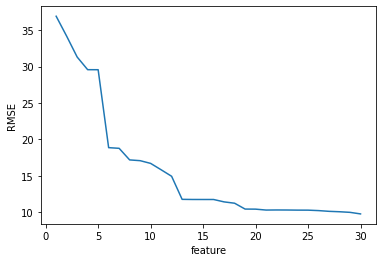

In [79]:
#line plot based on the number of feature and the relationship between RMSE
sns.lineplot(x = 'feature', y = 'RMSE',data= cost_df)
plt.show()

In [83]:
#regress housing price on all K+(K*(K+1))/2 features
alpha, beta_array,cost, cost_list = multivariate_ols(interaction_df_train, y_train, 0.001, 1000000)
print('intercept is {} and slope is {}, the RMSE cost is {}'.format(alpha, beta_array, cost))

Time taken: 256.69 seconds
intercept is 22.694505494503783 and slope is [[-0.79833782]
 [-5.07975338]
 [-1.71228541]
 [ 3.36166031]
 [ 1.8438293 ]
 [ 9.46351095]
 [ 5.67316322]
 [-5.88717071]
 [ 7.40650112]
 [ 3.44772829]
 [ 3.0075792 ]
 [ 4.16103575]
 [ 4.65471484]
 [ 0.9298755 ]
 [ 0.13924652]
 [ 1.85508752]
 [ 2.87416316]
 [ 0.66796739]
 [ 3.80506599]
 [-3.04516034]
 [-0.55146259]
 [-2.98783961]
 [-0.45414541]
 [-2.49682628]
 [-0.61093461]
 [ 2.25326029]
 [ 1.42981288]
 [ 0.19345796]
 [-0.3205289 ]
 [ 1.48423903]
 [ 1.56754984]
 [ 0.19716869]
 [-1.97629288]
 [-0.54576612]
 [ 2.33627798]
 [ 1.37306165]
 [-0.54945152]
 [-0.78569078]
 [ 5.66957039]
 [-1.1634074 ]
 [-1.66073038]
 [ 0.85715245]
 [ 1.21285458]
 [ 0.84995609]
 [ 2.80678656]
 [ 1.72116512]
 [-6.12706185]
 [ 0.65826144]
 [-4.24874874]
 [ 3.36166031]
 [-1.74715251]
 [-7.63924642]
 [ 0.94904513]
 [ 1.14150823]
 [-2.53028812]
 [ 0.34262419]
 [ 1.35314452]
 [ 1.79060207]
 [-1.79759233]
 [-1.38612095]
 [-1.65475416]
 [ 1.56549938

### 3.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your `multivariate_ols` regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model using all features from the training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training set. How do these numbers compare to each other, to the RMSE from 3.2?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [153]:
from sklearn.metrics import mean_squared_error

def multivariate_ols_ridge(xvalue_matrix, yvalues, R=0.001, lamb = 0.0, MaxIterations=1000):
    start_time = time.time()
    
    # your code here
    xvalue_matrix = np.array(xvalue_matrix)
    yvalues = np.array(yvalues)[:, np.newaxis]
    
    #455,2
    n, m = xvalue_matrix.shape
    
    alpha = 0.0
    beta_arr = np.transpose(np.array([[0.0] * m]))
    cost = np.inf
    epsilon = 1e-6
    
    
    for i in range(MaxIterations):
        cost_reference = cost
        gd_alpha = alpha
        gd_beta = np.copy(beta_arr)
        
        part_1 = gd_alpha + np.dot(xvalue_matrix, gd_beta) - yvalues
        alpha -= R / n * (part_1.sum())
        
        beta_arr  = beta_arr*(1 - (R * lamb) / n) - R / n * (np.dot(xvalue_matrix.T, part_1))
        #beta_arr  -= ((beta_arr * R * lamb) / n) - R / n * (np.dot(xvalue_matrix.T, part_1))
        
        part_2 = alpha + np.dot(xvalue_matrix, beta_arr) - yvalues
        
        penal = lamb * ((beta_arr ** 2).sum())
        
        cost = 1.0 / (2 * n) * ((part_2 ** 2).sum()) + penal
        
        if i % 10000 == 0:
            print('iteration ', i, ': ', cost)
        
#         print(rmse)
    
        if cost_reference - cost < 0:
                print('not converge stopped after iteration times: {}'.format(i))
                rmse = np.sqrt((part_1**2 / len(yvalues)))
                break

        if abs(alpha-gd_alpha) < epsilon and max(abs(beta_arr - gd_beta)) < epsilon:
                rmse = np.sqrt((part_1**2 / len(yvalues)))
                
                print('cost < epsilon stopped after iteration times: {}'.format(i))
                break


    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta_arr, rmse[len(rmse)-1]

In [177]:
#reference check using linear model ridge
reg = sklearn.linear_model.Ridge(alpha = 0.001)
reg.fit(test_1, y_train)
print("R square of testing set: {:.2f}".format(reg.score(test_1, y_train)))
print(reg.coef_)

R square of testing set: 0.32
[-1.96073462  0.94935449 -3.18063733  1.88185427 -0.13263705]


In [176]:
alpha, beta_array,rmse = multivariate_ols_ridge(test_1, y_train, R=0.0001, lamb=0.001, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  300.77569614688355
iteration  10000 :  65.23004432487177
iteration  20000 :  34.50597514833495
iteration  30000 :  30.300919253671804
iteration  40000 :  29.70252949822209
iteration  50000 :  29.60734695815356
iteration  60000 :  29.587643954524342
iteration  70000 :  29.58171357355842
iteration  80000 :  29.57936017018925
iteration  90000 :  29.578313701552847
iteration  100000 :  29.577837216157608
iteration  110000 :  29.57762386169478
cost < epsilon stopped after iteration times: 112862
Time taken: 9.10 seconds
intercept is 22.694220984320598 and slope is [[-1.96667719]
 [ 0.9594809 ]
 [-3.15240204]
 [ 1.88086204]
 [-0.14964078]], the cost is [0.23188622]


In [181]:
alpha, beta_array,rmse = multivariate_ols_ridge(interaction_df_train, y_train, R=0.0001, lamb=0.01, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  300.64561625817396
iteration  10000 :  45.69801113871037
iteration  20000 :  14.82233070033432
iteration  30000 :  10.23811519883075
iteration  40000 :  9.291686567926638
iteration  50000 :  8.892901730428003
iteration  60000 :  8.609455008092448
iteration  70000 :  8.374419109244222
iteration  80000 :  8.173096862729063
iteration  90000 :  7.999354536996002
iteration  100000 :  7.849116831507955
iteration  110000 :  7.719187339494387
iteration  120000 :  7.606923299047674
iteration  130000 :  7.51009047702838
iteration  140000 :  7.426776199530361
iteration  150000 :  7.355329506472359
iteration  160000 :  7.294316904344738
iteration  170000 :  7.242488173808351
iteration  180000 :  7.198749147339412
iteration  190000 :  7.162139571887294
iteration  200000 :  7.131814821763485
iteration  210000 :  7.107030608199876
iteration  220000 :  7.087130070578848
iteration  230000 :  7.071532791921826
iteration  240000 :  7.05972538993036
iteration  250000 :  7.05125341246337
it

In [182]:
alpha, beta_array,rmse = multivariate_ols_ridge(interaction_df_train, y_train, R = 0.001, lamb = 0.1, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  298.98594629387
not converge stopped after iteration times: 4614
Time taken: 0.45 seconds
intercept is 22.470298639408416 and slope is [[ 7.01623601e-03]
 [-4.28768474e-03]
 [ 8.06685086e-02]
 [ 6.84260662e-02]
 [-7.95777828e-02]
 [ 1.19406358e+00]
 [ 1.00203676e-01]
 [-3.03368649e-01]
 [ 4.77411317e-01]
 [-1.44025512e-01]
 [-5.44879657e-01]
 [ 2.11802647e-01]
 [-5.64177343e-01]
 [-4.37168390e-02]
 [ 1.07353739e-01]
 [ 2.01190095e-03]
 [ 9.61326980e-01]
 [-1.89186804e-01]
 [-3.42815328e-01]
 [ 3.13331121e-02]
 [-2.60171968e-01]
 [ 1.99169643e-02]
 [ 1.18775208e-02]
 [ 1.26687723e-03]
 [-3.49072384e-01]
 [ 3.23916690e-03]
 [ 1.66697913e-01]
 [-4.13781328e-01]
 [ 2.88323685e-01]
 [ 4.56429254e-01]
 [ 3.31925194e-01]
 [ 1.40364225e-01]
 [-9.00486609e-02]
 [ 3.57845202e-02]
 [-1.04071582e-01]
 [ 3.84818414e-02]
 [ 1.06332882e-02]
 [-4.10452304e-01]
 [ 4.70758230e-01]
 [-1.58336803e-01]
 [-2.82600019e-01]
 [-3.61063125e-01]
 [ 1.12341343e-01]
 [-5.41932116e-01]
 [ 3.13385626

In [183]:
alpha, beta_array,rmse = multivariate_ols_ridge(interaction_df_train, y_train, R = 0.001, lamb = 1, MaxIterations= 100000000)
print('intercept is {} and slope is {}, the cost is {}'.format(alpha, beta_array,rmse))

iteration  0 :  298.98716698158466
not converge stopped after iteration times: 2603
Time taken: 0.26 seconds
intercept is 21.017818234232468 and slope is [[-0.02447253]
 [ 0.03445023]
 [ 0.01096944]
 [ 0.04304876]
 [-0.13425681]
 [ 1.13599257]
 [ 0.06068266]
 [-0.23896558]
 [ 0.33396284]
 [-0.15565273]
 [-0.60834144]
 [ 0.21911067]
 [-0.55125349]
 [-0.09625291]
 [ 0.12170655]
 [-0.02660576]
 [ 0.71892883]
 [-0.15934033]
 [-0.22866452]
 [-0.00425203]
 [-0.19500314]
 [-0.01331272]
 [-0.02043909]
 [-0.02992177]
 [-0.22189172]
 [-0.03170057]
 [ 0.1375803 ]
 [-0.2892619 ]
 [ 0.31388442]
 [ 0.30888201]
 [ 0.26264569]
 [ 0.13810419]
 [-0.05340987]
 [ 0.05036394]
 [-0.08275714]
 [ 0.01761255]
 [ 0.04283048]
 [-0.30875182]
 [ 0.27377963]
 [-0.06971779]
 [-0.23105492]
 [-0.18918366]
 [ 0.05752465]
 [-0.46239517]
 [ 0.22679106]
 [ 0.13674321]
 [-0.02670445]
 [ 0.17216427]
 [-0.29041947]
 [ 0.04304876]
 [-0.23620682]
 [ 0.05698199]
 [ 0.09171562]
 [ 0.01101393]
 [ 0.19701263]
 [ 0.08189628]
 [ 0.0

- The RMSE is lower comparing to the non-standardized 3.2, using the lamda as 0.01. The RMSE with the Ridge regularization is 0.00065457, while the RMSE from 3.2 is 3.97.
- Using different lamda have different RMSE value, the RMSE for lambda takes the value of 0.1 is 0.007, the RMSE for lambda takes the value of 1 is 0.055. Which all are lower than the RMSE reported from 3.2 (non-regulizaed)
   

### 3.4 Cross-validate lambda

Up to this point, you have been fitting models and performing regularization (and basic tuning of the lambda hyperparameter) without cross-validation. This could easily lead to overfitting. Fix this by using 5-fold cross-validation on your training set to repeat 3.3 in a more systematic way.

Specifically, use 5-fold cross-validation to select the optimal value of lambda, using the lambda values `[0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]`. For each value of lambda, you should run 5-fold cross-validation, and report the average cross-validated RMSE across the 5 validation folds.  Create a figure that plots the average cross-validated RMSE (y-axis) as a function of lambda (x-axis).

Finally, select the value of lambda that minimizes cross-validated RMSE, and use it to evaluate test performance (remember, this is your holdout set from 1.3!). How does the test RMSE compare to the cross-validated RMSE? How does it compare to RMSE from nearest neighbors in PS3?


*Note-*:
* Don't forget to use standardized data!
* Your plot might be prettier if you show the x-axis in log scale.

In [72]:
len(Y_train)

455

In [125]:
stand_df = interaction_df_train.merge(Y_train, left_index= True, right_index= True)
stand_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2,MEDV
1,-0.294653,-0.499723,-0.413017,-0.270395,0.470928,-0.205380,0.832605,-0.001771,-0.638367,-0.560096,...,-0.304913,-0.209715,0.027942,1.153955,0.924016,1.061611,0.504055,1.225239,0.624664,21.6
3,-0.359325,0.344513,-1.004627,-0.270395,-0.694489,1.463462,-0.555824,-0.438871,-0.523106,-0.858201,...,-1.155730,-0.540083,-0.966566,-2.309483,-0.791396,-1.335941,0.400947,-1.095254,-0.849198,33.4
4,0.020532,-0.499723,1.016432,-0.270395,-0.065810,0.221891,-0.580681,0.159804,1.666847,1.544523,...,1.517796,1.880552,0.216764,0.722749,0.673157,-0.219720,0.370426,-0.091240,-0.440885,36.2
5,0.249076,-0.499723,1.050518,-0.270395,0.520389,-0.237704,1.127335,-0.789579,1.666847,1.514713,...,1.553806,1.942185,1.056891,0.906992,0.843222,0.720045,0.533273,0.932652,0.318679,28.7
6,-0.435498,2.877222,-0.877397,-0.270395,-1.595662,0.579488,-1.432913,0.588317,-0.638367,-1.001291,...,-0.813137,-0.660455,-1.003070,0.399055,0.626301,-1.224750,0.520437,-1.146305,-0.861019,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,-0.265779,-0.499723,-0.401328,-0.270395,0.172414,-0.833376,1.059867,-0.038769,-0.638367,-0.619717,...,-0.344176,-0.351985,0.135486,1.261984,0.776581,1.432964,0.199533,1.448422,1.033014,12.6
449,-0.393413,-0.499723,-0.030964,-0.270395,0.167970,-0.562018,-1.802214,0.742230,-0.638367,-0.589907,...,-0.466254,-0.323950,-0.520324,0.331543,0.412066,-0.284801,0.194647,-0.141031,-0.447399,13.0
450,-0.381875,-0.499723,-0.380642,-0.270395,-1.289562,-0.758408,0.839707,-0.777172,-0.523106,-0.142750,...,0.094928,0.231273,0.258808,1.202496,0.964200,1.019060,0.539056,1.181755,0.564588,13.4
451,-0.378929,0.344513,-0.600052,-0.270395,-1.623405,-0.583497,-0.928676,0.366663,-0.753628,-1.072836,...,-0.915989,-0.757996,-0.538485,0.079403,0.423298,0.091057,0.400363,0.380141,-0.122041,15.2


In [74]:
# Your code here
#al = list(np.array([1000,100,10,1,0.1,0.01,0.001,0.0001]))
al = list(np.array([0.001,0.0001]))


In [165]:
test_2 = stand_df[['CRIM','ZN','INDUS','CHAS', 'MEDV']]

In [185]:
#initializing values
k = 5
folds = np.array_split(stand_df, k)
total_rmse = 0


for i in range(k):
    #split into test and validation set
    train_df = folds.copy()
    validation_df = folds[i]
    
    del train_df[i]
    train_df = pd.concat(train_df, sort= False)
    
      
    #set the value
    train_y_df = train_df['MEDV']
    train_x_df = train_df.loc[:, train_df.columns != 'MEDV']
    
    
    #print(train_y_df)
    
    validation_y_df = validation_df['MEDV']
    validation_x_df = validation_df.loc[:, validation_df.columns != 'MEDV']
    
    
    
    
    #print(validation_y_df)
    

    #for i in al:
    
    alpha, beta, rmse = multivariate_ols_ridge(train_x_df, train_y_df, R=0.01, lamb= 0, MaxIterations= 100000000)
    print(rmse)

    #calculate rmse and average

    total_rmse += rmse

average_rmse = total_rmse / k
    
print(average_rmse)

iteration  0 :  321.5238783200971
iteration  10000 :  42.18364730928796
iteration  20000 :  40.46266218807854
iteration  30000 :  39.52056206760337
iteration  40000 :  38.90773904267838
iteration  50000 :  38.470289314027404
iteration  60000 :  38.13780542286601
iteration  70000 :  37.87305386194238
iteration  80000 :  37.65447066638054
iteration  90000 :  37.468793119555095
iteration  100000 :  37.30750267955808
iteration  110000 :  37.16493170483902
iteration  120000 :  37.03718818176923
iteration  130000 :  36.92151812092525
iteration  140000 :  36.81591563583836
iteration  150000 :  36.718878554097294
iteration  160000 :  36.629251896632155
iteration  170000 :  36.54612558182034
iteration  180000 :  36.468766243587595
iteration  190000 :  36.39657090181771
iteration  200000 :  36.32903487645204
iteration  210000 :  36.26572914533207
iteration  220000 :  36.206284068933755
iteration  230000 :  36.150377478601825
iteration  240000 :  36.0977258036839
iteration  250000 :  36.048077348

iteration  2070000 :  34.83742164370255
iteration  2080000 :  34.836401928209945
iteration  2090000 :  34.83538706620846
iteration  2100000 :  34.83437698097501
iteration  2110000 :  34.833371597681065
iteration  2120000 :  34.83237084333807
iteration  2130000 :  34.83137464674407
iteration  2140000 :  34.830382938432386
iteration  2150000 :  34.829395650621976
iteration  2160000 :  34.82841271716909
iteration  2170000 :  34.827434073520585
iteration  2180000 :  34.826459656668824
iteration  2190000 :  34.825489405107824
iteration  2200000 :  34.82452325879078
iteration  2210000 :  34.823561159089074
iteration  2220000 :  34.82260304875242
iteration  2230000 :  34.82164887187022
iteration  2240000 :  34.82069857383431
iteration  2250000 :  34.81975210130258
iteration  2260000 :  34.81880940216413
iteration  2270000 :  34.81787042550479
iteration  2280000 :  34.81693512157478
iteration  2290000 :  34.81600344175599
iteration  2300000 :  34.8150753385316
iteration  2310000 :  34.81415076

iteration  4110000 :  34.6827844805677
iteration  4120000 :  34.68218696622749
iteration  4130000 :  34.681590549600486
iteration  4140000 :  34.68099522723585
iteration  4150000 :  34.68040099570971
iteration  4160000 :  34.679807851624695
iteration  4170000 :  34.67921579160976
iteration  4180000 :  34.678624812319676
iteration  4190000 :  34.67803491043476
iteration  4200000 :  34.67744608266044
iteration  4210000 :  34.6768583257272
iteration  4220000 :  34.67627163638987
iteration  4230000 :  34.67568601142757
iteration  4240000 :  34.67510144764333
iteration  4250000 :  34.674517941863634
iteration  4260000 :  34.67393549093836
iteration  4270000 :  34.673354091740336
iteration  4280000 :  34.67277374116498
iteration  4290000 :  34.672194436130205
iteration  4300000 :  34.67161617357587
iteration  4310000 :  34.67103895046378
iteration  4320000 :  34.67046276377722
iteration  4330000 :  34.66988761052072
iteration  4340000 :  34.66931348771983
iteration  4350000 :  34.66874039242

iteration  6150000 :  34.58004653860973
iteration  6160000 :  34.57962400392766
iteration  6170000 :  34.579202152494716
iteration  6180000 :  34.578780983018646
iteration  6190000 :  34.57836049421096
iteration  6200000 :  34.577940684786896
iteration  6210000 :  34.57752155346545
iteration  6220000 :  34.57710309896938
iteration  6230000 :  34.57668532002507
iteration  6240000 :  34.576268215362674
iteration  6250000 :  34.57585178371581
iteration  6260000 :  34.57543602382194
iteration  6270000 :  34.57502093442195
iteration  6280000 :  34.574606514260424
iteration  6290000 :  34.574192762085474
iteration  6300000 :  34.57377967664866
iteration  6310000 :  34.57336725670526
iteration  6320000 :  34.572955501013816
iteration  6330000 :  34.57254440833653
iteration  6340000 :  34.57213397743885
iteration  6350000 :  34.57172420708995
iteration  6360000 :  34.57131509606209
iteration  6370000 :  34.57090664313117
iteration  6380000 :  34.57049884707636
iteration  6390000 :  34.57009170

iteration  8190000 :  34.506410418919764
iteration  8200000 :  34.50610460336721
iteration  8210000 :  34.50579926401178
iteration  8220000 :  34.505494400047326
iteration  8230000 :  34.50519001066927
iteration  8240000 :  34.50488609507465
iteration  8250000 :  34.50458265246199
iteration  8260000 :  34.50427968203146
iteration  8270000 :  34.50397718298469
iteration  8280000 :  34.50367515452495
iteration  8290000 :  34.503373595857035
iteration  8300000 :  34.50307250618729
iteration  8310000 :  34.50277188472359
iteration  8320000 :  34.50247173067538
iteration  8330000 :  34.50217204325352
iteration  8340000 :  34.50187282167057
iteration  8350000 :  34.50157406514045
iteration  8360000 :  34.50127577287875
iteration  8370000 :  34.50097794410249
iteration  8380000 :  34.50068057803021
iteration  8390000 :  34.50038367388189
iteration  8400000 :  34.50008723087919
iteration  8410000 :  34.49979124824512
iteration  8420000 :  34.49949572520419
iteration  8430000 :  34.499200660982

iteration  10220000 :  34.45308372037649
iteration  10230000 :  34.45285995426321
iteration  10240000 :  34.4526365281211
iteration  10250000 :  34.452413441395784
iteration  10260000 :  34.452190693533666
iteration  10270000 :  34.45196828398239
iteration  10280000 :  34.45174621219035
iteration  10290000 :  34.451524477607
iteration  10300000 :  34.4513030796828
iteration  10310000 :  34.45108201786916
iteration  10320000 :  34.450861291618494
iteration  10330000 :  34.450640900384045
iteration  10340000 :  34.450420843620215
iteration  10350000 :  34.45020112078219
iteration  10360000 :  34.44998173132634
iteration  10370000 :  34.44976267470975
iteration  10380000 :  34.44954395039061
iteration  10390000 :  34.44932555782802
iteration  10400000 :  34.44910749648205
iteration  10410000 :  34.44888976581374
iteration  10420000 :  34.44867236528501
iteration  10430000 :  34.448455294358894
iteration  10440000 :  34.448238552499085
iteration  10450000 :  34.44802213917055
iteration  10

iteration  12210000 :  34.41459247529002
iteration  12220000 :  34.414426596688514
iteration  12230000 :  34.414260964799304
iteration  12240000 :  34.414095579230136
iteration  12250000 :  34.413930439589414
iteration  12260000 :  34.4137655454862
iteration  12270000 :  34.41360089653018
iteration  12280000 :  34.41343649233176
iteration  12290000 :  34.41327233250209
iteration  12300000 :  34.41310841665282
iteration  12310000 :  34.412944744396334
iteration  12320000 :  34.412781315345754
iteration  12330000 :  34.41261812911475
iteration  12340000 :  34.412455185317654
iteration  12350000 :  34.41229248356961
iteration  12360000 :  34.41213002348623
iteration  12370000 :  34.41196780468387
iteration  12380000 :  34.411805826779535
iteration  12390000 :  34.41164408939088
iteration  12400000 :  34.411482592136174
iteration  12410000 :  34.4113213346345
iteration  12420000 :  34.41116031650535
iteration  12430000 :  34.41099953736898
iteration  12440000 :  34.41083899684635
iteration

iteration  14200000 :  34.385975267819994
iteration  14210000 :  34.38585155167765
iteration  14220000 :  34.38572801594217
iteration  14230000 :  34.385604660333165
iteration  14240000 :  34.38548148457088
iteration  14250000 :  34.38535848837589
iteration  14260000 :  34.385235671469374
iteration  14270000 :  34.385113033572885
iteration  14280000 :  34.38499057440851
iteration  14290000 :  34.38486829369867
iteration  14300000 :  34.38474619116643
iteration  14310000 :  34.38462426653518
iteration  14320000 :  34.38450251952883
iteration  14330000 :  34.3843809498717
iteration  14340000 :  34.384259557288644
iteration  14350000 :  34.3841383415049
iteration  14360000 :  34.384017302246214
iteration  14370000 :  34.383896439238775
iteration  14380000 :  34.383775752209246
iteration  14390000 :  34.383655240884636
iteration  14400000 :  34.38353490499252
iteration  14410000 :  34.38341474426098
iteration  14420000 :  34.38329475841837
iteration  14430000 :  34.3831749471937
iteration 

iteration  16190000 :  34.3645750225246
iteration  16200000 :  34.364482240690606
iteration  16210000 :  34.36438959170503
iteration  16220000 :  34.364297075365975
iteration  16230000 :  34.36420469147186
iteration  16240000 :  34.36411243982155
iteration  16250000 :  34.36402032021407
iteration  16260000 :  34.36392833244885
iteration  16270000 :  34.36383647632565
iteration  16280000 :  34.36374475164453
iteration  16290000 :  34.36365315820587
iteration  16300000 :  34.363561695810446
iteration  16310000 :  34.363470364259385
iteration  16320000 :  34.363379163353855
iteration  16330000 :  34.363288092895694
iteration  16340000 :  34.36319715268698
iteration  16350000 :  34.363106342529925
iteration  16360000 :  34.36301566222719
iteration  16370000 :  34.362925111581845
iteration  16380000 :  34.36283469039715
iteration  16390000 :  34.36274439847666
iteration  16400000 :  34.36265423562447
iteration  16410000 :  34.36256420164474
iteration  16420000 :  34.3624742963421
iteration 

iteration  18180000 :  34.348486998914076
iteration  18190000 :  34.34841706781489
iteration  18200000 :  34.34834723518372
iteration  18210000 :  34.3482775008741
iteration  18220000 :  34.34820786473963
iteration  18230000 :  34.3481383266343
iteration  18240000 :  34.34806888641233
iteration  18250000 :  34.347999543928005
iteration  18260000 :  34.34793029903604
iteration  18270000 :  34.347861151591175
iteration  18280000 :  34.347792101448654
iteration  18290000 :  34.347723148463714
iteration  18300000 :  34.34765429249188
iteration  18310000 :  34.34758553338903
iteration  18320000 :  34.34751687101106
iteration  18330000 :  34.347448305214286
iteration  18340000 :  34.34737983585513
iteration  18350000 :  34.3473114627903
iteration  18360000 :  34.34724318587672
iteration  18370000 :  34.34717500497159
iteration  18380000 :  34.34710691993218
iteration  18390000 :  34.34703893061617
iteration  18400000 :  34.346971036881385
iteration  18410000 :  34.34690323858583
iteration  1

iteration  20180000 :  34.33628195899201
iteration  20190000 :  34.33622908757218
iteration  20200000 :  34.33617628947248
iteration  20210000 :  34.336123564585975
iteration  20220000 :  34.33607091280592
iteration  20230000 :  34.336018334025596
iteration  20240000 :  34.33596582813855
iteration  20250000 :  34.33591339503848
iteration  20260000 :  34.3358610346193
iteration  20270000 :  34.33580874677494
iteration  20280000 :  34.33575653139963
iteration  20290000 :  34.33570438838776
iteration  20300000 :  34.3356523176338
iteration  20310000 :  34.33560031903237
iteration  20320000 :  34.33554839247843
iteration  20330000 :  34.335496537866916
iteration  20340000 :  34.33544475509301
iteration  20350000 :  34.335393044052104
iteration  20360000 :  34.335341404639586
iteration  20370000 :  34.33528983675119
iteration  20380000 :  34.33523834028273
iteration  20390000 :  34.335186915130144
iteration  20400000 :  34.33513556118955
iteration  20410000 :  34.3350842783574
iteration  20

iteration  22170000 :  34.32707653161615
iteration  22180000 :  34.327036342163375
iteration  22190000 :  34.32699620768982
iteration  22200000 :  34.326956128116784
iteration  22210000 :  34.32691610336556
iteration  22220000 :  34.32687613335763
iteration  22230000 :  34.32683621801463
iteration  22240000 :  34.32679635725829
iteration  22250000 :  34.32675655101036
iteration  22260000 :  34.32671679919289
iteration  22270000 :  34.32667710172789
iteration  22280000 :  34.32663745853759
iteration  22290000 :  34.3265978695443
iteration  22300000 :  34.32655833467045
iteration  22310000 :  34.32651885383856
iteration  22320000 :  34.326479426971346
iteration  22330000 :  34.32644005399155
iteration  22340000 :  34.32640073482212
iteration  22350000 :  34.326361469385944
iteration  22360000 :  34.3263222576063
iteration  22370000 :  34.32628309940638
iteration  22380000 :  34.326243994709536
iteration  22390000 :  34.3262049434393
iteration  22400000 :  34.326165945519165
iteration  22

iteration  24160000 :  34.32006722019191
iteration  24170000 :  34.32003656331808
iteration  24180000 :  34.32000594787734
iteration  24190000 :  34.31997537381143
iteration  24200000 :  34.31994484106187
iteration  24210000 :  34.31991434957065
iteration  24220000 :  34.31988389927956
iteration  24230000 :  34.31985349013064
iteration  24240000 :  34.31982312206595
iteration  24250000 :  34.31979279502755
iteration  24260000 :  34.31976250895776
iteration  24270000 :  34.31973226379893
iteration  24280000 :  34.31970205949338
iteration  24290000 :  34.31967189598376
iteration  24300000 :  34.31964177321245
iteration  24310000 :  34.319611691122205
iteration  24320000 :  34.319581649655795
iteration  24330000 :  34.31955164875607
iteration  24340000 :  34.31952168836588
iteration  24350000 :  34.31949176842831
iteration  24360000 :  34.319461888886345
iteration  24370000 :  34.3194320496833
iteration  24380000 :  34.319402250762344
iteration  24390000 :  34.31937249206687
iteration  24

iteration  26150000 :  34.314712450517845
iteration  26160000 :  34.31468899313873
iteration  26170000 :  34.314665567124706
iteration  26180000 :  34.31464217243213
iteration  26190000 :  34.31461880901761
iteration  26200000 :  34.31459547683787
iteration  26210000 :  34.314572175849484
iteration  26220000 :  34.3145489060091
iteration  26230000 :  34.31452566727364
iteration  26240000 :  34.3145024596
iteration  26250000 :  34.314479282944994
iteration  26260000 :  34.31445613726569
iteration  26270000 :  34.31443302251896
iteration  26280000 :  34.31440993866221
iteration  26290000 :  34.31438688565236
iteration  26300000 :  34.314363863446836
iteration  26310000 :  34.31434087200279
iteration  26320000 :  34.3143179112777
iteration  26330000 :  34.314294981228876
iteration  26340000 :  34.31427208181391
iteration  26350000 :  34.31424921299031
iteration  26360000 :  34.31422637471562
iteration  26370000 :  34.31420356694762
iteration  26380000 :  34.31418078964399
iteration  26390

iteration  28140000 :  34.31060985082377
iteration  28150000 :  34.31059185404499
iteration  28160000 :  34.31057388110459
iteration  28170000 :  34.31055593197007
iteration  28180000 :  34.310538006608745
iteration  28190000 :  34.310520104988036
iteration  28200000 :  34.31050222707567
iteration  28210000 :  34.31048437283902
iteration  28220000 :  34.31046654224574
iteration  28230000 :  34.31044873526345
iteration  28240000 :  34.31043095185993
iteration  28250000 :  34.31041319200284
iteration  28260000 :  34.31039545566008
iteration  28270000 :  34.31037774279938
iteration  28280000 :  34.310360053388685
iteration  28290000 :  34.31034238739587
iteration  28300000 :  34.31032474478895
iteration  28310000 :  34.31030712553592
iteration  28320000 :  34.310289529604894
iteration  28330000 :  34.31027195696402
iteration  28340000 :  34.310254407581354
iteration  28350000 :  34.31023688142509
iteration  28360000 :  34.31021937846359
iteration  28370000 :  34.31020189866511
iteration  

iteration  30130000 :  34.30745872116068
iteration  30140000 :  34.30744488171303
iteration  30150000 :  34.307431060447264
iteration  30160000 :  34.30741725733881
iteration  30170000 :  34.30740347236316
iteration  30180000 :  34.3073897054956
iteration  30190000 :  34.30737595671189
iteration  30200000 :  34.30736222598753
iteration  30210000 :  34.30734851329793
iteration  30220000 :  34.30733481861893
iteration  30230000 :  34.307321141926096
iteration  30240000 :  34.30730748319511
iteration  30250000 :  34.30729384240173
iteration  30260000 :  34.307280219521694
iteration  30270000 :  34.3072666145308
iteration  30280000 :  34.30725302740496
iteration  30290000 :  34.30723945811987
iteration  30300000 :  34.30722590665151
iteration  30310000 :  34.307212372975826
iteration  30320000 :  34.30719885706883
iteration  30330000 :  34.3071853589064
iteration  30340000 :  34.30717187846467
iteration  30350000 :  34.30715841571966
iteration  30360000 :  34.30714497064739
iteration  3037

iteration  32120000 :  34.30503314317871
iteration  32130000 :  34.30502247934332
iteration  32140000 :  34.30501182941822
iteration  32150000 :  34.30500119338503
iteration  32160000 :  34.30499057122502
iteration  32170000 :  34.30497996291968
iteration  32180000 :  34.304969368450465
iteration  32190000 :  34.30495878779893
iteration  32200000 :  34.3049482209465
iteration  32210000 :  34.30493766787487
iteration  32220000 :  34.30492712856543
iteration  32230000 :  34.30491660299992
iteration  32240000 :  34.304906091159864
iteration  32250000 :  34.304895593027005
iteration  32260000 :  34.304885108582866
iteration  32270000 :  34.304874637809405
iteration  32280000 :  34.304864180688085
iteration  32290000 :  34.304853737200794
iteration  32300000 :  34.30484330732927
iteration  32310000 :  34.30483289105532
iteration  32320000 :  34.30482248836081
iteration  32330000 :  34.30481209922752
iteration  32340000 :  34.30480172363733
iteration  32350000 :  34.304791361572285
iteration

iteration  34110000 :  34.3031625652247
iteration  34120000 :  34.303154334139556
iteration  34130000 :  34.30314611372546
iteration  34140000 :  34.303137903968306
iteration  34150000 :  34.30312970485406
iteration  34160000 :  34.30312151636858
iteration  34170000 :  34.30311333849768
iteration  34180000 :  34.30310517122738
iteration  34190000 :  34.30309701454364
iteration  34200000 :  34.303088868432425
iteration  34210000 :  34.30308073287975
iteration  34220000 :  34.30307260787159
iteration  34230000 :  34.303064493394004
iteration  34240000 :  34.30305638943308
iteration  34250000 :  34.30304829597482
iteration  34260000 :  34.3030402130053
iteration  34270000 :  34.30303214051071
iteration  34280000 :  34.303024078477115
iteration  34290000 :  34.30301602689073
iteration  34300000 :  34.303007985737665
iteration  34310000 :  34.302999955004104
iteration  34320000 :  34.302991934676236
iteration  34330000 :  34.30298392474039
iteration  34340000 :  34.30297592518263
iteration 

iteration  36100000 :  34.30171767935699
iteration  36110000 :  34.3017113166312
iteration  36120000 :  34.301704962110634
iteration  36130000 :  34.30169861578454
iteration  36140000 :  34.301692277642154
iteration  36150000 :  34.30168594767255
iteration  36160000 :  34.30167962586526
iteration  36170000 :  34.3016733122094
iteration  36180000 :  34.30166700669427
iteration  36190000 :  34.30166070930916
iteration  36200000 :  34.30165442004353
iteration  36210000 :  34.301648138886684
iteration  36220000 :  34.30164186582761
iteration  36230000 :  34.30163560085618
iteration  36240000 :  34.30162934396148
iteration  36250000 :  34.30162309513294
iteration  36260000 :  34.30161685435998
iteration  36270000 :  34.301610621632065
iteration  36280000 :  34.30160439693849
iteration  36290000 :  34.30159818026893
iteration  36300000 :  34.30159197161263
iteration  36310000 :  34.30158577095916
iteration  36320000 :  34.30157957829806
iteration  36330000 :  34.30157339361872
iteration  363

iteration  38090000 :  34.30060007368223
iteration  38100000 :  34.30059514898941
iteration  38110000 :  34.30059023061849
iteration  38120000 :  34.30058531856125
iteration  38130000 :  34.30058041280942
iteration  38140000 :  34.30057551335472
iteration  38150000 :  34.300570620189006
iteration  38160000 :  34.300565733304
iteration  38170000 :  34.300560852691625
iteration  38180000 :  34.30055597834357
iteration  38190000 :  34.30055111025177
iteration  38200000 :  34.30054624840796
iteration  38210000 :  34.300541392804114
iteration  38220000 :  34.30053654343196
iteration  38230000 :  34.30053170028347
iteration  38240000 :  34.30052686335047
iteration  38250000 :  34.3005220326249
iteration  38260000 :  34.300517208098576
iteration  38270000 :  34.30051238976355
iteration  38280000 :  34.30050757761165
iteration  38290000 :  34.30050277163474
iteration  38300000 :  34.30049797182495
iteration  38310000 :  34.30049317817412
iteration  38320000 :  34.30048839067425
iteration  3833

iteration  40080000 :  34.29973459892781
iteration  40090000 :  34.29973078313486
iteration  40100000 :  34.299726972221094
iteration  40110000 :  34.29972316618028
iteration  40120000 :  34.299719365006084
iteration  40130000 :  34.29971556869223
iteration  40140000 :  34.29971177723235
iteration  40150000 :  34.29970799062027
iteration  40160000 :  34.29970420884961
iteration  40170000 :  34.299700431914005
iteration  40180000 :  34.29969665980737
iteration  40190000 :  34.29969289252337
iteration  40200000 :  34.299689130055725
iteration  40210000 :  34.29968537239823
iteration  40220000 :  34.29968161954456
iteration  40230000 :  34.299677871488626
iteration  40240000 :  34.299674128224154
iteration  40250000 :  34.29967038974483
iteration  40260000 :  34.29966665604464
iteration  40270000 :  34.29966292711723
iteration  40280000 :  34.29965920295649
iteration  40290000 :  34.2996554835562
iteration  40300000 :  34.29965176891022
iteration  40310000 :  34.29964805901239
iteration  

iteration  42080000 :  34.29906074195978
iteration  42090000 :  34.29905778641574
iteration  42100000 :  34.299054834638284
iteration  42110000 :  34.299051886622586
iteration  42120000 :  34.29904894236375
iteration  42130000 :  34.29904600185701
iteration  42140000 :  34.2990430650973
iteration  42150000 :  34.299040132080044
iteration  42160000 :  34.299037202800356
iteration  42170000 :  34.299034277253305
iteration  42180000 :  34.29903135543419
iteration  42190000 :  34.299028437338166
iteration  42200000 :  34.29902552296048
iteration  42210000 :  34.29902261229622
iteration  42220000 :  34.2990197053407
iteration  42230000 :  34.299016802089064
iteration  42240000 :  34.299013902536615
iteration  42250000 :  34.29901100667854
iteration  42260000 :  34.29900811451009
iteration  42270000 :  34.299005226026495
iteration  42280000 :  34.29900234122299
iteration  42290000 :  34.2989994600949
iteration  42300000 :  34.29899658263737
iteration  42310000 :  34.2989937088457
iteration  

iteration  44080000 :  34.298538599268404
iteration  44090000 :  34.29853630821655
iteration  44100000 :  34.29853402007613
cost < epsilon stopped after iteration times: 44100267
Time taken: 38653.74 seconds
[0.63019968]
iteration  0 :  308.2035137712787
iteration  10000 :  37.306737639434154
iteration  20000 :  35.757017036312526
iteration  30000 :  34.90379903832241
iteration  40000 :  34.349224624823556
iteration  50000 :  33.95581251107038
iteration  60000 :  33.6586283401945
iteration  70000 :  33.422804425830876
iteration  80000 :  33.22825514584959
iteration  90000 :  33.06282161394853
iteration  100000 :  32.918828519533044
iteration  110000 :  32.79123816333761
iteration  120000 :  32.67661740595069
iteration  130000 :  32.5725404535175
iteration  140000 :  32.477233863244145
iteration  150000 :  32.389359974194036
iteration  160000 :  32.30788136772801
iteration  170000 :  32.23197382525115
iteration  180000 :  32.160968944616826
iteration  190000 :  32.09431528921192
iterati

iteration  2000000 :  30.11480386708233
iteration  2010000 :  30.112721814649976
iteration  2020000 :  30.110652356013034
iteration  2030000 :  30.108595295453874
iteration  2040000 :  30.10655044152179
iteration  2050000 :  30.104517606923455
iteration  2060000 :  30.1024966084159
iteration  2070000 :  30.100487266703308
iteration  2080000 :  30.0984894063363
iteration  2090000 :  30.09650285561429
iteration  2100000 :  30.09452744649045
iteration  2110000 :  30.092563014479644
iteration  2120000 :  30.09060939856859
iteration  2130000 :  30.088666441128936
iteration  2140000 :  30.08673398783243
iteration  2150000 :  30.084811887568932
iteration  2160000 :  30.082899992366094
iteration  2170000 :  30.080998157312028
iteration  2180000 :  30.079106240479323
iteration  2190000 :  30.077224102851797
iteration  2200000 :  30.075351608253214
iteration  2210000 :  30.073488623277534
iteration  2220000 :  30.071635017221602
iteration  2230000 :  30.069790662019233
iteration  2240000 :  30.0

iteration  4020000 :  29.82459926021002
iteration  4030000 :  29.823519283464123
iteration  4040000 :  29.82244145626262
iteration  4050000 :  29.821365769141927
iteration  4060000 :  29.820292212730635
iteration  4070000 :  29.819220777748612
iteration  4080000 :  29.8181514550055
iteration  4090000 :  29.81708423539964
iteration  4100000 :  29.816019109916834
iteration  4110000 :  29.814956069629293
iteration  4120000 :  29.813895105694154
iteration  4130000 :  29.81283620935287
iteration  4140000 :  29.81177937192949
iteration  4150000 :  29.81072458483011
iteration  4160000 :  29.809671839541473
iteration  4170000 :  29.808621127629976
iteration  4180000 :  29.80757244074066
iteration  4190000 :  29.806525770596185
iteration  4200000 :  29.805481108995636
iteration  4210000 :  29.804438447813748
iteration  4220000 :  29.80339777899996
iteration  4230000 :  29.802359094577124
iteration  4240000 :  29.801322386640937
iteration  4250000 :  29.800287647358676
iteration  4260000 :  29.7

iteration  6040000 :  29.641312654481506
iteration  6050000 :  29.64054863883721
iteration  6060000 :  29.63978581274639
iteration  6070000 :  29.639024173746886
iteration  6080000 :  29.638263719386764
iteration  6090000 :  29.637504447224032
iteration  6100000 :  29.636746354826833
iteration  6110000 :  29.635989439773123
iteration  6120000 :  29.6352336996507
iteration  6130000 :  29.634479132057063
iteration  6140000 :  29.63372573459946
iteration  6150000 :  29.632973504894636
iteration  6160000 :  29.632222440568842
iteration  6170000 :  29.631472539257793
iteration  6180000 :  29.630723798606443
iteration  6190000 :  29.629976216269196
iteration  6200000 :  29.629229789909417
iteration  6210000 :  29.62848451719979
iteration  6220000 :  29.627740395821885
iteration  6230000 :  29.62699742346634
iteration  6240000 :  29.626255597832568
iteration  6250000 :  29.625514916628944
iteration  6260000 :  29.624775377572572
iteration  6270000 :  29.62403697838909
iteration  6280000 :  29

iteration  8060000 :  29.508315983677043
iteration  8070000 :  29.50775205984069
iteration  8080000 :  29.507188961297718
iteration  8090000 :  29.50662668668292
iteration  8100000 :  29.50606523463407
iteration  8110000 :  29.505504603791866
iteration  8120000 :  29.50494479279993
iteration  8130000 :  29.50438580030487
iteration  8140000 :  29.503827624956163
iteration  8150000 :  29.503270265406172
iteration  8160000 :  29.502713720310126
iteration  8170000 :  29.50215798832616
iteration  8180000 :  29.501603068115262
iteration  8190000 :  29.5010489583413
iteration  8200000 :  29.500495657670854
iteration  8210000 :  29.499943164773516
iteration  8220000 :  29.499391478321563
iteration  8230000 :  29.49884059699011
iteration  8240000 :  29.49829051945706
iteration  8250000 :  29.497741244403123
iteration  8260000 :  29.497192770511738
iteration  8270000 :  29.496645096469226
iteration  8280000 :  29.496098220964495
iteration  8290000 :  29.495552142689395
iteration  8300000 :  29.4

iteration  10080000 :  29.40948350244099
iteration  10090000 :  29.409061955168298
iteration  10100000 :  29.4086410057141
iteration  10110000 :  29.408220653150487
iteration  10120000 :  29.407800896551073
iteration  10130000 :  29.407381734991304
iteration  10140000 :  29.40696316754808
iteration  10150000 :  29.406545193299767
iteration  10160000 :  29.406127811326815
iteration  10170000 :  29.405711020710843
iteration  10180000 :  29.405294820535328
iteration  10190000 :  29.404879209885262
iteration  10200000 :  29.40446418784715
iteration  10210000 :  29.404049753509312
iteration  10220000 :  29.403635905961373
iteration  10230000 :  29.40322264429488
iteration  10240000 :  29.402809967602664
iteration  10250000 :  29.402397874979357
iteration  10260000 :  29.401986365521086
iteration  10270000 :  29.4015754383255
iteration  10280000 :  29.401165092491926
iteration  10290000 :  29.400755327121214
iteration  10300000 :  29.40034614131568
iteration  10310000 :  29.39993753417934
it

iteration  12050000 :  29.336907192465787
iteration  12060000 :  29.336587350192286
iteration  12070000 :  29.336267950484487
iteration  12080000 :  29.335948992678148
iteration  12090000 :  29.335630476110182
iteration  12100000 :  29.335312400118426
iteration  12110000 :  29.334994764042147
iteration  12120000 :  29.334677567221352
iteration  12130000 :  29.334360808997296
iteration  12140000 :  29.334044488712458
iteration  12150000 :  29.33372860571011
iteration  12160000 :  29.33341315933474
iteration  12170000 :  29.333098148931985
iteration  12180000 :  29.332783573848552
iteration  12190000 :  29.33246943343207
iteration  12200000 :  29.332155727031452
iteration  12210000 :  29.331842453996522
iteration  12220000 :  29.331529613678242
iteration  12230000 :  29.33121720542861
iteration  12240000 :  29.33090522860077
iteration  12250000 :  29.330593682548887
iteration  12260000 :  29.330282566628135
iteration  12270000 :  29.329971880194822
iteration  12280000 :  29.3296616226062

iteration  14020000 :  29.28167121019112
iteration  14030000 :  29.281426992330434
iteration  14040000 :  29.281183105055852
iteration  14050000 :  29.280939547885104
iteration  14060000 :  29.280696320336453
iteration  14070000 :  29.280453421928964
iteration  14080000 :  29.28021085218272
iteration  14090000 :  29.279968610618162
iteration  14100000 :  29.279726696756878
iteration  14110000 :  29.279485110120934
iteration  14120000 :  29.27924385023327
iteration  14130000 :  29.279002916617614
iteration  14140000 :  29.27876230879848
iteration  14150000 :  29.278522026300998
iteration  14160000 :  29.278282068651134
iteration  14170000 :  29.27804243537574
iteration  14180000 :  29.277803126002116
iteration  14190000 :  29.27756414005864
iteration  14200000 :  29.27732547707422
iteration  14210000 :  29.277087136578647
iteration  14220000 :  29.276849118102305
iteration  14230000 :  29.27661142117653
iteration  14240000 :  29.276374045333295
iteration  14250000 :  29.27613699010518
i

iteration  15990000 :  29.239381062333333
iteration  16000000 :  29.23919354579875
iteration  16010000 :  29.239006278126368
iteration  16020000 :  29.23881925896217
iteration  16030000 :  29.238632487952884
iteration  16040000 :  29.238445964745654
iteration  16050000 :  29.23825968898838
iteration  16060000 :  29.23807366032916
iteration  16070000 :  29.23788787841712
iteration  16080000 :  29.237702342901454
iteration  16090000 :  29.23751705343222
iteration  16100000 :  29.23733200965976
iteration  16110000 :  29.23714721123522
iteration  16120000 :  29.236962657810157
iteration  16130000 :  29.2367783490367
iteration  16140000 :  29.236594284567285
iteration  16150000 :  29.23641046405534
iteration  16160000 :  29.23622688715438
iteration  16170000 :  29.2360435535188
iteration  16180000 :  29.235860462803224
iteration  16190000 :  29.23567761466319
iteration  16200000 :  29.23549500875437
iteration  16210000 :  29.235312644733146
iteration  16220000 :  29.23513052225654
iteration

iteration  17960000 :  29.206832053881683
iteration  17970000 :  29.206687366187378
iteration  17980000 :  29.20654286715261
iteration  17990000 :  29.206398556515488
iteration  18000000 :  29.206254434014454
iteration  18010000 :  29.2061104993884
iteration  18020000 :  29.205966752376703
iteration  18030000 :  29.205823192719066
iteration  18040000 :  29.205679820155428
iteration  18050000 :  29.20553663442635
iteration  18060000 :  29.205393635272678
iteration  18070000 :  29.20525082243561
iteration  18080000 :  29.205108195656788
iteration  18090000 :  29.204965754678263
iteration  18100000 :  29.20482349924237
iteration  18110000 :  29.204681429092062
iteration  18120000 :  29.204539543970355
iteration  18130000 :  29.204397843620914
iteration  18140000 :  29.204256327787654
iteration  18150000 :  29.20411499621489
iteration  18160000 :  29.203973848647415
iteration  18170000 :  29.20383288483023
iteration  18180000 :  29.20369210450895
iteration  18190000 :  29.20355150742931
it

iteration  19930000 :  29.181664743842187
iteration  19940000 :  29.181552623748544
iteration  19950000 :  29.181440647583816
iteration  19960000 :  29.18132881515238
iteration  19970000 :  29.18121712625931
iteration  19980000 :  29.181105580709577
iteration  19990000 :  29.18099417830875
iteration  20000000 :  29.180882918862387
iteration  20010000 :  29.180771802176597
iteration  20020000 :  29.18066082805762
iteration  20030000 :  29.18054999631205
iteration  20040000 :  29.180439306746717
iteration  20050000 :  29.180328759168738
iteration  20060000 :  29.18021835338557
iteration  20070000 :  29.180108089204907
iteration  20080000 :  29.17999796643462
iteration  20090000 :  29.179887984883074
iteration  20100000 :  29.179778144358835
iteration  20110000 :  29.179668444670593
iteration  20120000 :  29.179558885627586
iteration  20130000 :  29.179449467039035
iteration  20140000 :  29.179340188714736
iteration  20150000 :  29.179231050464505
iteration  20160000 :  29.179122052098567

iteration  21900000 :  29.162126936509985
iteration  21910000 :  29.16203973055238
iteration  21920000 :  29.161952635021134
iteration  21930000 :  29.16186564976912
iteration  21940000 :  29.1617787746497
iteration  21950000 :  29.161692009516234
iteration  21960000 :  29.16160535422246
iteration  21970000 :  29.161518808622297
iteration  21980000 :  29.161432372569706
iteration  21990000 :  29.161346045919146
iteration  22000000 :  29.16125982852491
iteration  22010000 :  29.161173720241845
iteration  22020000 :  29.16108772092479
iteration  22030000 :  29.161001830428983
iteration  22040000 :  29.16091604860963
iteration  22050000 :  29.16083037532242
iteration  22060000 :  29.160744810422933
iteration  22070000 :  29.160659353767073
iteration  22080000 :  29.160574005211227
iteration  22090000 :  29.160488764611486
iteration  22100000 :  29.160403631824625
iteration  22110000 :  29.160318606707303
iteration  22120000 :  29.160233689116403
iteration  22130000 :  29.160148878909343
i

iteration  23870000 :  29.146906871061745
iteration  23880000 :  29.146838826430105
iteration  23890000 :  29.146770866944845
iteration  23900000 :  29.146702992494763
iteration  23910000 :  29.14663520296868
iteration  23920000 :  29.146567498255596
iteration  23930000 :  29.146499878244718
iteration  23940000 :  29.146432342825275
iteration  23950000 :  29.146364891886808
iteration  23960000 :  29.146297525318978
iteration  23970000 :  29.14623024301153
iteration  23980000 :  29.146163044854312
iteration  23990000 :  29.146095930737612
iteration  24000000 :  29.146028900551514
iteration  24010000 :  29.145961954186436
iteration  24020000 :  29.14589509153287
iteration  24030000 :  29.145828312481623
iteration  24040000 :  29.145761616923487
iteration  24050000 :  29.145695004749495
iteration  24060000 :  29.14562847585076
iteration  24070000 :  29.145562030118676
iteration  24080000 :  29.145495667444507
iteration  24090000 :  29.14542938772002
iteration  24100000 :  29.1453631908370

iteration  25840000 :  29.13501515997721
iteration  25850000 :  29.13496192159289
iteration  25860000 :  29.134908749149975
iteration  25870000 :  29.13485564256369
iteration  25880000 :  29.13480260174939
iteration  25890000 :  29.13474962662241
iteration  25900000 :  29.134696717098215
iteration  25910000 :  29.13464387309254
iteration  25920000 :  29.134591094520964
iteration  25930000 :  29.134538381299528
iteration  25940000 :  29.13448573334416
iteration  25950000 :  29.134433150570842
iteration  25960000 :  29.13438063289581
iteration  25970000 :  29.134328180235467
iteration  25980000 :  29.1342757925061
iteration  25990000 :  29.13422346962443
iteration  26000000 :  29.134171211506843
iteration  26010000 :  29.13411901807042
iteration  26020000 :  29.13406688923179
iteration  26030000 :  29.134014824908107
iteration  26040000 :  29.133962825016436
iteration  26050000 :  29.133910889473924
iteration  26060000 :  29.13385901819794
iteration  26070000 :  29.13380721110602
iterati

iteration  27820000 :  29.12565870856773
iteration  27830000 :  29.125617009363637
iteration  27840000 :  29.1255753613566
iteration  27850000 :  29.12553376448188
iteration  27860000 :  29.125492218674328
iteration  27870000 :  29.12545072386944
iteration  27880000 :  29.1254092800023
iteration  27890000 :  29.125367887008494
iteration  27900000 :  29.12532654482337
iteration  27910000 :  29.125285253382547
iteration  27920000 :  29.1252440126217
iteration  27930000 :  29.125202822476567
iteration  27940000 :  29.12516168288297
iteration  27950000 :  29.125120593776835
iteration  27960000 :  29.125079555094054
iteration  27970000 :  29.12503856677081
iteration  27980000 :  29.124997628743287
iteration  27990000 :  29.124956740947734
iteration  28000000 :  29.124915903320336
iteration  28010000 :  29.12487511579775
iteration  28020000 :  29.124834378316272
iteration  28030000 :  29.12479369081262
iteration  28040000 :  29.124753053223507
iteration  28050000 :  29.124712465485555
iterat

iteration  29790000 :  29.11835587045939
iteration  29800000 :  29.118323104822647
iteration  29810000 :  29.118290379116676
iteration  29820000 :  29.118257693291397
iteration  29830000 :  29.118225047296814
iteration  29840000 :  29.118192441083043
iteration  29850000 :  29.11815987460015
iteration  29860000 :  29.118127347798534
iteration  29870000 :  29.118094860628283
iteration  29880000 :  29.11806241303983
iteration  29890000 :  29.118030004983606
iteration  29900000 :  29.117997636410095
iteration  29910000 :  29.11796530726971
iteration  29920000 :  29.117933017513153
iteration  29930000 :  29.117900767091154
iteration  29940000 :  29.117868555954356
iteration  29950000 :  29.117836384053557
iteration  29960000 :  29.11780425133965
iteration  29970000 :  29.117772157763582
iteration  29980000 :  29.117740103276347
iteration  29990000 :  29.117708087828895
iteration  30000000 :  29.11767611137248
iteration  30010000 :  29.11764417385816
iteration  30020000 :  29.117612275237303

iteration  31760000 :  29.112612925847504
iteration  31770000 :  29.112587137392676
iteration  31780000 :  29.112561380168398
iteration  31790000 :  29.11253565413594
iteration  31800000 :  29.112509959256602
iteration  31810000 :  29.11248429549184
iteration  31820000 :  29.112458662802865
iteration  31830000 :  29.112433061151325
iteration  31840000 :  29.11240749049875
iteration  31850000 :  29.11238195080655
iteration  31860000 :  29.11235644203635
iteration  31870000 :  29.112330964149947
iteration  31880000 :  29.11230551710902
iteration  31890000 :  29.112280100875317
iteration  31900000 :  29.112254715410533
iteration  31910000 :  29.112229360676583
iteration  31920000 :  29.112204036635486
iteration  31930000 :  29.112178743249206
iteration  31940000 :  29.112153480479495
iteration  31950000 :  29.11212824828865
iteration  31960000 :  29.112103046638737
iteration  31970000 :  29.112077875491845
iteration  31980000 :  29.11205273481021
iteration  31990000 :  29.11202762455604
i

iteration  33730000 :  29.10808981488112
iteration  33740000 :  29.108069489758734
iteration  33750000 :  29.108049189120248
iteration  33760000 :  29.108028912935595
iteration  33770000 :  29.108008661174846
iteration  33780000 :  29.107988433807787
iteration  33790000 :  29.107968230804477
iteration  33800000 :  29.10794805213515
iteration  33810000 :  29.10792789776966
iteration  33820000 :  29.107907767678252
iteration  33830000 :  29.107887661831032
iteration  33840000 :  29.107867580198285
iteration  33850000 :  29.107847522750294
iteration  33860000 :  29.107827489457254
iteration  33870000 :  29.10780748028951
iteration  33880000 :  29.107787495217313
iteration  33890000 :  29.107767534211295
iteration  33900000 :  29.10774759724178
iteration  33910000 :  29.107727684279123
iteration  33920000 :  29.107707795293965
iteration  33930000 :  29.107687930256876
iteration  33940000 :  29.107668089138308
iteration  33950000 :  29.107648271908985
iteration  33960000 :  29.1076284785395

iteration  35700000 :  29.104522897479427
iteration  35710000 :  29.104506859692574
iteration  35720000 :  29.104490841138986
iteration  35730000 :  29.104474841795348
iteration  35740000 :  29.104458861638165
iteration  35750000 :  29.104442900643924
iteration  35760000 :  29.10442695878944
iteration  35770000 :  29.104411036051186
iteration  35780000 :  29.10439513240589
iteration  35790000 :  29.104379247830312
iteration  35800000 :  29.104363382301287
iteration  35810000 :  29.104347535795384
iteration  35820000 :  29.104331708289564
iteration  35830000 :  29.10431589976045
iteration  35840000 :  29.104300110185235
iteration  35850000 :  29.104284339540513
iteration  35860000 :  29.104268587803244
iteration  35870000 :  29.104252854950488
iteration  35880000 :  29.104237140959214
iteration  35890000 :  29.104221445806257
iteration  35900000 :  29.104205769468834
iteration  35910000 :  29.104190111923895
iteration  35920000 :  29.104174473148603
iteration  35930000 :  29.10415885312

iteration  37680000 :  29.101694366839855
iteration  37690000 :  29.101681714899733
iteration  37700000 :  29.101669078075503
iteration  37710000 :  29.101656456348792
iteration  37720000 :  29.10164384970142
iteration  37730000 :  29.101631258115166
iteration  37740000 :  29.101618681571768
iteration  37750000 :  29.101606120052804
iteration  37760000 :  29.1015935735402
iteration  37770000 :  29.101581042015795
iteration  37780000 :  29.101568525461463
iteration  37790000 :  29.101556023858944
iteration  37800000 :  29.101543537190132
iteration  37810000 :  29.101531065437015
iteration  37820000 :  29.101518608581507
iteration  37830000 :  29.10150616660548
iteration  37840000 :  29.101493739490966
iteration  37850000 :  29.10148132722002
iteration  37860000 :  29.10146892977454
iteration  37870000 :  29.10145654713664
iteration  37880000 :  29.101444179288272
iteration  37890000 :  29.10143182621169
iteration  37900000 :  29.101419487888887
iteration  37910000 :  29.10140716430203
i

iteration  39660000 :  29.099462089637033
iteration  39670000 :  29.09945210059482
iteration  39680000 :  29.09944212344969
iteration  39690000 :  29.099432158187142
iteration  39700000 :  29.09942220479303
iteration  39710000 :  29.099412263252976
iteration  39720000 :  29.099402333552685
iteration  39730000 :  29.0993924156779
iteration  39740000 :  29.099382509614404
iteration  39750000 :  29.099372615347907
iteration  39760000 :  29.099362732864172
iteration  39770000 :  29.099352862149058
iteration  39780000 :  29.0993430031884
iteration  39790000 :  29.099333155967884
iteration  39800000 :  29.09932332047354
iteration  39810000 :  29.099313496691185
iteration  39820000 :  29.099303684606678
iteration  39830000 :  29.099293884205895
iteration  39840000 :  29.09928409547486
iteration  39850000 :  29.099274318399324
iteration  39860000 :  29.099264552965455
iteration  39870000 :  29.09925479915913
iteration  39880000 :  29.099245056966314
iteration  39890000 :  29.09923532637306
ite

iteration  41630000 :  29.097706959416918
iteration  41640000 :  29.097699058067448
iteration  41650000 :  29.09769116610399
iteration  41660000 :  29.09768328351547
iteration  41670000 :  29.09767541029046
iteration  41680000 :  29.097667546417913
iteration  41690000 :  29.097659691886392
iteration  41700000 :  29.09765184668482
iteration  41710000 :  29.097644010801954
iteration  41720000 :  29.097636184226605
iteration  41730000 :  29.09762836694764
iteration  41740000 :  29.097620558953935
iteration  41750000 :  29.097612760234338
iteration  41760000 :  29.097604970777677
iteration  41770000 :  29.09759719057282
iteration  41780000 :  29.09758941960874
iteration  41790000 :  29.09758165787436
iteration  41800000 :  29.097573905358516
iteration  41810000 :  29.09756616205026
iteration  41820000 :  29.097558427938438
iteration  41830000 :  29.0975507030121
iteration  41840000 :  29.097542987260113
iteration  41850000 :  29.097535280671647
iteration  41860000 :  29.09752758323565
iter

iteration  43600000 :  29.096318266041045
iteration  43610000 :  29.096312012570596
iteration  43620000 :  29.0963057665126
iteration  43630000 :  29.096299527858104
iteration  43640000 :  29.096293296598443
iteration  43650000 :  29.096287072724643
iteration  43660000 :  29.09628085622795
iteration  43670000 :  29.09627464709959
iteration  43680000 :  29.096268445330573
iteration  43690000 :  29.09626225091225
iteration  43700000 :  29.096256063835845
iteration  43710000 :  29.096249884092522
iteration  43720000 :  29.096243711673505
iteration  43730000 :  29.0962375465701
iteration  43740000 :  29.096231388773568
iteration  43750000 :  29.096225238275107
iteration  43760000 :  29.096219095066036
iteration  43770000 :  29.096212959137663
iteration  43780000 :  29.0962068304812
iteration  43790000 :  29.09620070908813
iteration  43800000 :  29.09619459494959
iteration  43810000 :  29.09618848805699
iteration  43820000 :  29.096182388401683
iteration  43830000 :  29.09617629597505
itera

iteration  45570000 :  29.095218942400358
iteration  45580000 :  29.095213990837433
iteration  45590000 :  29.095209045133203
iteration  45600000 :  29.09520410528065
iteration  45610000 :  29.095199171272817
iteration  45620000 :  29.095194243102778
iteration  45630000 :  29.095189320763513
iteration  45640000 :  29.095184404248144
iteration  45650000 :  29.09517949354962
iteration  45660000 :  29.09517458866112
iteration  45670000 :  29.09516968957576
iteration  45680000 :  29.09516479628656
iteration  45690000 :  29.095159908786453
iteration  45700000 :  29.095155027068802
iteration  45710000 :  29.0951501511266
iteration  45720000 :  29.095145280953016
iteration  45730000 :  29.095140416541113
iteration  45740000 :  29.095135557884078
iteration  45750000 :  29.09513070497497
iteration  45760000 :  29.09512585780708
iteration  45770000 :  29.095121016373433
iteration  45780000 :  29.09511618066729
iteration  45790000 :  29.09511135068177
iteration  45800000 :  29.09510652641017
iter

iteration  47550000 :  29.09434439896529
iteration  47560000 :  29.09434048139115
iteration  47570000 :  29.094336568445296
iteration  47580000 :  29.094332660122202
iteration  47590000 :  29.094328756416317
iteration  47600000 :  29.094324857322324
iteration  47610000 :  29.0943209628346
iteration  47620000 :  29.094317072947756
iteration  47630000 :  29.094313187656375
iteration  47640000 :  29.094309306954813
iteration  47650000 :  29.094305430837778
iteration  47660000 :  29.094301559299737
iteration  47670000 :  29.094297692335296
iteration  47680000 :  29.094293829938955
iteration  47690000 :  29.09428997210535
iteration  47700000 :  29.09428611882914
iteration  47710000 :  29.09428227010478
iteration  47720000 :  29.094278425926802
iteration  47730000 :  29.09427458628995
iteration  47740000 :  29.094270751188795
iteration  47750000 :  29.094266920617986
iteration  47760000 :  29.094263094571943
iteration  47770000 :  29.094259273045566
iteration  47780000 :  29.09425545603327
i

iteration  49530000 :  29.093652368257892
iteration  49540000 :  29.09364926775568
iteration  49550000 :  29.09364617091193
iteration  49560000 :  29.09364307772225
iteration  49570000 :  29.093639988182282
iteration  49580000 :  29.093636902287752
iteration  49590000 :  29.09363382003435
iteration  49600000 :  29.093630741417616
iteration  49610000 :  29.093627666433363
iteration  49620000 :  29.093624595077312
iteration  49630000 :  29.093621527345082
iteration  49640000 :  29.09361846323244
iteration  49650000 :  29.09361540273503
iteration  49660000 :  29.09361234584858
iteration  49670000 :  29.09360929256895
iteration  49680000 :  29.093606242891617
iteration  49690000 :  29.093603196812424
iteration  49700000 :  29.09360015432723
iteration  49710000 :  29.09359711543151
iteration  49720000 :  29.09359408012129
iteration  49730000 :  29.093591048392124
iteration  49740000 :  29.09358802023975
iteration  49750000 :  29.093584995660148
iteration  49760000 :  29.093581974648863
iter

iteration  51510000 :  29.09310459936045
iteration  51520000 :  29.09310214486241
iteration  51530000 :  29.093099693257518
iteration  51540000 :  29.093097244542392
iteration  51550000 :  29.093094798713583
iteration  51560000 :  29.09309235576768
iteration  51570000 :  29.093089915701295
iteration  51580000 :  29.093087478510917
iteration  51590000 :  29.09308504419327
iteration  51600000 :  29.093082612744897
iteration  51610000 :  29.0930801841624
iteration  51620000 :  29.093077758442398
iteration  51630000 :  29.093075335581492
iteration  51640000 :  29.093072915576297
iteration  51650000 :  29.09307049842349
iteration  51660000 :  29.093068084119636
iteration  51670000 :  29.093065672661375
iteration  51680000 :  29.09306326404532
iteration  51690000 :  29.093060858268156
iteration  51700000 :  29.09305845532653
iteration  51710000 :  29.093056055216998
iteration  51720000 :  29.093053657936306
iteration  51730000 :  29.09305126348107
iteration  51740000 :  29.093048871847902
it

iteration  1280000 :  28.056211155677488
iteration  1290000 :  28.053196987446647
iteration  1300000 :  28.050218186122905
iteration  1310000 :  28.04727408061794
iteration  1320000 :  28.04436401533292
iteration  1330000 :  28.04148734973038
iteration  1340000 :  28.03864345792048
iteration  1350000 :  28.03583172826128
iteration  1360000 :  28.03305156297194
iteration  1370000 :  28.03030237775906
iteration  1380000 :  28.027583601454857
iteration  1390000 :  28.024894675667255
iteration  1400000 :  28.022235054441317
iteration  1410000 :  28.019604203931117
iteration  1420000 :  28.017001602082463
iteration  1430000 :  28.014426738325408
iteration  1440000 :  28.01187911327617
iteration  1450000 :  28.00935823844879
iteration  1460000 :  28.00686363597509
iteration  1470000 :  28.00439483833378
iteration  1480000 :  28.001951388087335
iteration  1490000 :  27.999532837627022
iteration  1500000 :  27.997138748925813
iteration  1510000 :  27.994768693298177
iteration  1520000 :  27.99

iteration  3300000 :  27.752781464694014
iteration  3310000 :  27.751901569354406
iteration  3320000 :  27.75102414514324
iteration  3330000 :  27.750149172316398
iteration  3340000 :  27.749276631393645
iteration  3350000 :  27.74840650315463
iteration  3360000 :  27.74753876863468
iteration  3370000 :  27.746673409120934
iteration  3380000 :  27.74581040614826
iteration  3390000 :  27.744949741495542
iteration  3400000 :  27.744091397181773
iteration  3410000 :  27.743235355462463
iteration  3420000 :  27.74238159882581
iteration  3430000 :  27.74153010998914
iteration  3440000 :  27.74068087189549
iteration  3450000 :  27.73983386771004
iteration  3460000 :  27.738989080816587
iteration  3470000 :  27.73814649481433
iteration  3480000 :  27.73730609351468
iteration  3490000 :  27.73646786093763
iteration  3500000 :  27.73563178130894
iteration  3510000 :  27.734797839056803
iteration  3520000 :  27.733966018808847
iteration  3530000 :  27.73313630538901
iteration  3540000 :  27.7323

iteration  5320000 :  27.60930054191804
iteration  5330000 :  27.608714071597767
iteration  5340000 :  27.608128541537308
iteration  5350000 :  27.607543949239144
iteration  5360000 :  27.606960292222762
iteration  5370000 :  27.606377568024833
iteration  5380000 :  27.605795774198914
iteration  5390000 :  27.60521490831516
iteration  5400000 :  27.604634967960212
iteration  5410000 :  27.60405595073706
iteration  5420000 :  27.603477854264764
iteration  5430000 :  27.60290067617832
iteration  5440000 :  27.602324414128482
iteration  5450000 :  27.60174906578152
iteration  5460000 :  27.60117462881923
iteration  5470000 :  27.600601100938462
iteration  5480000 :  27.600028479851286
iteration  5490000 :  27.599456763284536
iteration  5500000 :  27.598885948979856
iteration  5510000 :  27.598316034693386
iteration  5520000 :  27.597747018195705
iteration  5530000 :  27.59717889727156
iteration  5540000 :  27.596611669719916
iteration  5550000 :  27.59604533335351
iteration  5560000 :  27

iteration  7340000 :  27.507339552094315
iteration  7350000 :  27.506907069124566
iteration  7360000 :  27.50647521542875
iteration  7370000 :  27.50604398998666
iteration  7380000 :  27.505613391780905
iteration  7390000 :  27.505183419796758
iteration  7400000 :  27.50475407302223
iteration  7410000 :  27.504325350447868
iteration  7420000 :  27.50389725106697
iteration  7430000 :  27.50346977387544
iteration  7440000 :  27.503042917871777
iteration  7450000 :  27.502616682057123
iteration  7460000 :  27.502191065435095
iteration  7470000 :  27.50176606701198
iteration  7480000 :  27.501341685796554
iteration  7490000 :  27.5009179208001
iteration  7500000 :  27.50049477103647
iteration  7510000 :  27.500072235521966
iteration  7520000 :  27.49965031327542
iteration  7530000 :  27.49922900331809
iteration  7540000 :  27.49880830467374
iteration  7550000 :  27.498388216368504
iteration  7560000 :  27.49796873743091
iteration  7570000 :  27.49754986689201
iteration  7580000 :  27.49713

iteration  9360000 :  27.431519802417732
iteration  9370000 :  27.43119655473809
iteration  9380000 :  27.430873769731065
iteration  9390000 :  27.43055144671828
iteration  9400000 :  27.43022958502262
iteration  9410000 :  27.429908183968166
iteration  9420000 :  27.42958724287991
iteration  9430000 :  27.429266761084193
iteration  9440000 :  27.428946737908163
iteration  9450000 :  27.428627172680358
iteration  9460000 :  27.428308064730274
iteration  9470000 :  27.427989413388495
iteration  9480000 :  27.427671217986802
iteration  9490000 :  27.42735347785791
iteration  9500000 :  27.42703619233583
iteration  9510000 :  27.426719360755488
iteration  9520000 :  27.42640298245296
iteration  9530000 :  27.42608705676543
iteration  9540000 :  27.42577158303105
iteration  9550000 :  27.425456560589193
iteration  9560000 :  27.42514198878024
iteration  9570000 :  27.424827866945613
iteration  9580000 :  27.424514194427847
iteration  9590000 :  27.424200970570492
iteration  9600000 :  27.4

iteration  11350000 :  27.37549580248464
iteration  11360000 :  27.37525255530455
iteration  11370000 :  27.37500965481247
iteration  11380000 :  27.37476710050956
iteration  11390000 :  27.37452489189765
iteration  11400000 :  27.374283028479397
iteration  11410000 :  27.37404150975811
iteration  11420000 :  27.373800335237814
iteration  11430000 :  27.37355950442334
iteration  11440000 :  27.373319016820272
iteration  11450000 :  27.373078871934744
iteration  11460000 :  27.372839069273862
iteration  11470000 :  27.37259960834534
iteration  11480000 :  27.372360488657577
iteration  11490000 :  27.37212170971974
iteration  11500000 :  27.371883271041774
iteration  11510000 :  27.37164517213424
iteration  11520000 :  27.37140741250859
iteration  11530000 :  27.37116999167679
iteration  11540000 :  27.370932909151627
iteration  11550000 :  27.370696164446645
iteration  11560000 :  27.37045975707604
iteration  11570000 :  27.370223686554766
iteration  11580000 :  27.36998795239845
iterat

iteration  13320000 :  27.33368544838804
iteration  13330000 :  27.33350172463424
iteration  13340000 :  27.333318262147472
iteration  13350000 :  27.333135060553577
iteration  13360000 :  27.33295211947898
iteration  13370000 :  27.33276943855064
iteration  13380000 :  27.33258701739603
iteration  13390000 :  27.33240485564315
iteration  13400000 :  27.33222295292063
iteration  13410000 :  27.332041308857544
iteration  13420000 :  27.331859923083513
iteration  13430000 :  27.331678795228814
iteration  13440000 :  27.331497924924047
iteration  13450000 :  27.331317311800518
iteration  13460000 :  27.331136955490013
iteration  13470000 :  27.330956855624805
iteration  13480000 :  27.330777011837824
iteration  13490000 :  27.330597423762306
iteration  13500000 :  27.330418091032286
iteration  13510000 :  27.330239013282185
iteration  13520000 :  27.330060190146874
iteration  13530000 :  27.329881621261986
iteration  13540000 :  27.32970330626343
iteration  13550000 :  27.32952524478777
i

iteration  15300000 :  27.30195870370292
iteration  15310000 :  27.301820056887703
iteration  15320000 :  27.301681606868872
iteration  15330000 :  27.301543353365297
iteration  15340000 :  27.301405296096327
iteration  15350000 :  27.301267434781504
iteration  15360000 :  27.30112976914104
iteration  15370000 :  27.300992298895338
iteration  15380000 :  27.300855023765312
iteration  15390000 :  27.300717943472176
iteration  15400000 :  27.300581057737762
iteration  15410000 :  27.30044436628411
iteration  15420000 :  27.300307868833627
iteration  15430000 :  27.300171565109228
iteration  15440000 :  27.300035454834216
iteration  15450000 :  27.299899537732315
iteration  15460000 :  27.299763813527576
iteration  15470000 :  27.299628281944457
iteration  15480000 :  27.299492942707893
iteration  15490000 :  27.299357795543056
iteration  15500000 :  27.299222840175734
iteration  15510000 :  27.299088076331895
iteration  15520000 :  27.298953503738005
iteration  15530000 :  27.29881912212

iteration  17270000 :  27.278115142627982
iteration  17280000 :  27.27801031092242
iteration  17290000 :  27.277905627751366
iteration  17300000 :  27.277801092903058
iteration  17310000 :  27.277696706165983
iteration  17320000 :  27.277592467329008
iteration  17330000 :  27.27748837618127
iteration  17340000 :  27.27738443251216
iteration  17350000 :  27.277280636111385
iteration  17360000 :  27.277176986769028
iteration  17370000 :  27.27707348427538
iteration  17380000 :  27.27697012842113
iteration  17390000 :  27.276866918997186
iteration  17400000 :  27.276763855794798
iteration  17410000 :  27.276660938605417
iteration  17420000 :  27.276558167220962
iteration  17430000 :  27.276455541433595
iteration  17440000 :  27.276353061035643
iteration  17450000 :  27.276250725819953
iteration  17460000 :  27.2761485355794
iteration  17470000 :  27.276046490107433
iteration  17480000 :  27.2759445891977
iteration  17490000 :  27.275842832643953
iteration  17500000 :  27.27574122024056
it

iteration  19240000 :  27.260082649598925
iteration  19250000 :  27.26000334657372
iteration  19260000 :  27.259924155714625
iteration  19270000 :  27.259845076861996
iteration  19280000 :  27.259766109856432
iteration  19290000 :  27.259687254538797
iteration  19300000 :  27.25960851075006
iteration  19310000 :  27.25952987833153
iteration  19320000 :  27.259451357124703
iteration  19330000 :  27.259372946971265
iteration  19340000 :  27.259294647713247
iteration  19350000 :  27.259216459192785
iteration  19360000 :  27.259138381252214
iteration  19370000 :  27.259060413734293
iteration  19380000 :  27.25898255648176
iteration  19390000 :  27.258904809337725
iteration  19400000 :  27.25882717214556
iteration  19410000 :  27.25874964474872
iteration  19420000 :  27.25867222699097
iteration  19430000 :  27.2585949187163
iteration  19440000 :  27.25851771976893
iteration  19450000 :  27.258440629993245
iteration  19460000 :  27.2583636492339
iteration  19470000 :  27.25828677733577
itera

iteration  21210000 :  27.24643827526889
iteration  21220000 :  27.24637825485313
iteration  21230000 :  27.24631831918207
iteration  21240000 :  27.246258468135466
iteration  21250000 :  27.246198701593034
iteration  21260000 :  27.246139019434658
iteration  21270000 :  27.246079421540493
iteration  21280000 :  27.24601990779082
iteration  21290000 :  27.2459604780661
iteration  21300000 :  27.24590113224693
iteration  21310000 :  27.245841870214203
iteration  21320000 :  27.245782691848742
iteration  21330000 :  27.245723597031795
iteration  21340000 :  27.245664585644636
iteration  21350000 :  27.24560565756878
iteration  21360000 :  27.24554681268576
iteration  21370000 :  27.2454880508775
iteration  21380000 :  27.245429372025956
iteration  21390000 :  27.245370776013306
iteration  21400000 :  27.245312262721843
iteration  21410000 :  27.245253832034063
iteration  21420000 :  27.24519548383263
iteration  21430000 :  27.24513721800037
iteration  21440000 :  27.245079034420304
itera

iteration  23190000 :  27.236063717635602
iteration  23200000 :  27.23601833327193
iteration  23210000 :  27.23597301287624
iteration  23220000 :  27.235927756357743
iteration  23230000 :  27.235882563625957
iteration  23240000 :  27.23583743459032
iteration  23250000 :  27.235792369160524
iteration  23260000 :  27.235747367246407
iteration  23270000 :  27.235702428757826
iteration  23280000 :  27.23565755360496
iteration  23290000 :  27.235612741697842
iteration  23300000 :  27.23556799294681
iteration  23310000 :  27.235523307262284
iteration  23320000 :  27.235478684555
iteration  23330000 :  27.23543412473541
iteration  23340000 :  27.23538962771449
iteration  23350000 :  27.23534519340317
iteration  23360000 :  27.235300821712443
iteration  23370000 :  27.235256512553562
iteration  23380000 :  27.23521226583788
iteration  23390000 :  27.23516808147676
iteration  23400000 :  27.23512395938191
iteration  23410000 :  27.23507989946495
iteration  23420000 :  27.235035901637744
iterati

iteration  25160000 :  27.228251579852298
iteration  25170000 :  27.228217197457578
iteration  25180000 :  27.228182863440274
iteration  25190000 :  27.228148577731982
iteration  25200000 :  27.22811434026425
iteration  25210000 :  27.228080150968786
iteration  25220000 :  27.228046009777447
iteration  25230000 :  27.228011916622144
iteration  25240000 :  27.227977871434764
iteration  25250000 :  27.227943874147435
iteration  25260000 :  27.227909924692426
iteration  25270000 :  27.227876023001937
iteration  25280000 :  27.22784216900836
iteration  25290000 :  27.22780836264424
iteration  25300000 :  27.227774603842153
iteration  25310000 :  27.22774089253462
iteration  25320000 :  27.227707228654605
iteration  25330000 :  27.22767361213481
iteration  25340000 :  27.2276400429083
iteration  25350000 :  27.227606520908044
iteration  25360000 :  27.227573046067313
iteration  25370000 :  27.227539618319195
iteration  25380000 :  27.2275062375971
iteration  25390000 :  27.227472903834506
i

iteration  27130000 :  27.222331899632753
iteration  27140000 :  27.222305839700528
iteration  27150000 :  27.222279816372957
iteration  27160000 :  27.222253829598287
iteration  27170000 :  27.222227879324876
iteration  27180000 :  27.222201965501107
iteration  27190000 :  27.22217608807549
iteration  27200000 :  27.222150246996623
iteration  27210000 :  27.222124442213033
iteration  27220000 :  27.222098673673614
iteration  27230000 :  27.222072941326953
iteration  27240000 :  27.22204724512197
iteration  27250000 :  27.22202158500763
iteration  27260000 :  27.22199596093293
iteration  27270000 :  27.22197037284682
iteration  27280000 :  27.22194482069857
iteration  27290000 :  27.221919304437378
iteration  27300000 :  27.22189382401251
iteration  27310000 :  27.221868379373344
iteration  27320000 :  27.221842970469286
iteration  27330000 :  27.221817597249853
iteration  27340000 :  27.221792259664586
iteration  27350000 :  27.221766957663228
iteration  27360000 :  27.22174169119536


iteration  29100000 :  27.21784410450437
iteration  29110000 :  27.217824343188457
iteration  29120000 :  27.217804609582775
iteration  29130000 :  27.217784903648287
iteration  29140000 :  27.217765225345897
iteration  29150000 :  27.21774557463659
iteration  29160000 :  27.217725951481594
iteration  29170000 :  27.21770635584183
iteration  29180000 :  27.217686787678566
iteration  29190000 :  27.217667246953134
iteration  29200000 :  27.217647733626706
iteration  29210000 :  27.217628247660635
iteration  29220000 :  27.217608789016435
iteration  29230000 :  27.21758935765539
iteration  29240000 :  27.217569953539144
iteration  29250000 :  27.217550576629193
iteration  29260000 :  27.217531226887253
iteration  29270000 :  27.217511904274904
iteration  29280000 :  27.217492608753886
iteration  29290000 :  27.21747334028602
iteration  29300000 :  27.21745409883317
iteration  29310000 :  27.217434884357104
iteration  29320000 :  27.217415696819923
iteration  29330000 :  27.21739653618353

iteration  31070000 :  27.214440239910402
iteration  31080000 :  27.214425247832644
iteration  31090000 :  27.21441027674205
iteration  31100000 :  27.21439532660909
iteration  31110000 :  27.21438039740427
iteration  31120000 :  27.21436548909806
iteration  31130000 :  27.21435060166111
iteration  31140000 :  27.21433573506399
iteration  31150000 :  27.214320889277257
iteration  31160000 :  27.21430606427181
iteration  31170000 :  27.214291260018154
iteration  31180000 :  27.214276476487246
iteration  31190000 :  27.214261713649773
iteration  31200000 :  27.214246971476715
iteration  31210000 :  27.21423224993885
iteration  31220000 :  27.21421754900725
iteration  31230000 :  27.214202868652677
iteration  31240000 :  27.214188208846465
iteration  31250000 :  27.21417356955937
iteration  31260000 :  27.214158950762773
iteration  31270000 :  27.214144352427617
iteration  31280000 :  27.214129774525123
iteration  31290000 :  27.214115217026563
iteration  31300000 :  27.214100679903236
it

iteration  33040000 :  27.211857302424548
iteration  33050000 :  27.211845923296465
iteration  33060000 :  27.211834560071267
iteration  33070000 :  27.2118232127267
iteration  33080000 :  27.211811881240276
iteration  33090000 :  27.211800565589797
iteration  33100000 :  27.21178926575293
iteration  33110000 :  27.21177798170762
iteration  33120000 :  27.211766713431484
iteration  33130000 :  27.211755460902342
iteration  33140000 :  27.211744224098155
iteration  33150000 :  27.211733002996787
iteration  33160000 :  27.211721797576224
iteration  33170000 :  27.211710607814283
iteration  33180000 :  27.21169943368904
iteration  33190000 :  27.211688275178503
iteration  33200000 :  27.211677132260682
iteration  33210000 :  27.21166600491373
iteration  33220000 :  27.21165489311569
iteration  33230000 :  27.211643796844726
iteration  33240000 :  27.211632716079006
iteration  33250000 :  27.211621650796797
iteration  33260000 :  27.21161060097623
iteration  33270000 :  27.211599566595595


iteration  35020000 :  27.209887760843795
iteration  35030000 :  27.209879132079255
iteration  35040000 :  27.209870515353682
iteration  35050000 :  27.209861910650513
iteration  35060000 :  27.209853317952575
iteration  35070000 :  27.20984473724319
iteration  35080000 :  27.209836168505557
iteration  35090000 :  27.209827611722655
iteration  35100000 :  27.209819066878026
iteration  35110000 :  27.209810533954702
iteration  35120000 :  27.20980201293595
iteration  35130000 :  27.209793503805155
iteration  35140000 :  27.209785006545573
iteration  35150000 :  27.20977652114056
iteration  35160000 :  27.209768047573494
iteration  35170000 :  27.209759585827687
iteration  35180000 :  27.209751135886652
iteration  35190000 :  27.209742697733738
iteration  35200000 :  27.209734271352502
iteration  35210000 :  27.20972585672631
iteration  35220000 :  27.20971745383877
iteration  35230000 :  27.209709062673355
iteration  35240000 :  27.209700683213548
iteration  35250000 :  27.2096923154430

iteration  36990000 :  27.208400493238926
iteration  37000000 :  27.208393937947932
iteration  37010000 :  27.208387391788207
iteration  37020000 :  27.208380854746956
iteration  37030000 :  27.208374326811338
iteration  37040000 :  27.20836780796864
iteration  37050000 :  27.20836129820609
iteration  37060000 :  27.208354797511035
iteration  37070000 :  27.208348305870647
iteration  37080000 :  27.20834182327229
iteration  37090000 :  27.208335349703383
iteration  37100000 :  27.208328885151126
iteration  37110000 :  27.208322429603033
iteration  37120000 :  27.208315983046397
iteration  37130000 :  27.20830954546864
iteration  37140000 :  27.20830311685719
iteration  37150000 :  27.2082966971995
iteration  37160000 :  27.208290286482956
iteration  37170000 :  27.20828388469516
iteration  37180000 :  27.20827749182345
iteration  37190000 :  27.208271107855403
iteration  37200000 :  27.20826473277864
iteration  37210000 :  27.20825836658055
iteration  37220000 :  27.208252009248753
ite

iteration  38960000 :  27.20727037306382
iteration  38970000 :  27.207265390773497
iteration  38980000 :  27.207260415412055
iteration  38990000 :  27.20725544696996
iteration  39000000 :  27.207250485437356
iteration  39010000 :  27.207245530804638
iteration  39020000 :  27.20724058306214
iteration  39030000 :  27.207235642200292
iteration  39040000 :  27.207230708209373
iteration  39050000 :  27.207225781079885
iteration  39060000 :  27.207220860802078
iteration  39070000 :  27.207215947366535
iteration  39080000 :  27.207211040763543
iteration  39090000 :  27.207206140983654
iteration  39100000 :  27.20720124801726
iteration  39110000 :  27.207196361854844
iteration  39120000 :  27.20719148248693
iteration  39130000 :  27.207186609903964
iteration  39140000 :  27.20718174409644
iteration  39150000 :  27.207176885054974
iteration  39160000 :  27.207172032769975
iteration  39170000 :  27.207167187232056
iteration  39180000 :  27.207162348431847
iteration  39190000 :  27.20715751635979

iteration  40930000 :  27.206411255588673
iteration  40940000 :  27.206407467178124
iteration  40950000 :  27.206403684027805
iteration  40960000 :  27.206399906130322
iteration  40970000 :  27.206396133478375
iteration  40980000 :  27.20639236606469
iteration  40990000 :  27.206388603881756
iteration  41000000 :  27.206384846922457
iteration  41010000 :  27.206381095179488
iteration  41020000 :  27.206377348645454
iteration  41030000 :  27.206373607313196
iteration  41040000 :  27.20636987117531
iteration  41050000 :  27.20636614022473
iteration  41060000 :  27.20636241445417
iteration  41070000 :  27.20635869385615
iteration  41080000 :  27.206354978423775
iteration  41090000 :  27.206351268149657
iteration  41100000 :  27.206347563026647
iteration  41110000 :  27.206343863047493
iteration  41120000 :  27.206340168205102
iteration  41130000 :  27.206336478492304
iteration  41140000 :  27.206332793901783
iteration  41150000 :  27.20632911442656
iteration  41160000 :  27.20632544005939

iteration  42900000 :  27.205757869215212
iteration  42910000 :  27.20575498735372
iteration  42920000 :  27.20575210948742
iteration  42930000 :  27.205749235610728
iteration  42940000 :  27.205746365718106
iteration  42950000 :  27.20574349980392
iteration  42960000 :  27.20574063786273
iteration  42970000 :  27.205737779888956
iteration  42980000 :  27.205734925877085
iteration  42990000 :  27.20573207582154
iteration  43000000 :  27.205729229716866
iteration  43010000 :  27.205726387557498
iteration  43020000 :  27.205723549337982
iteration  43030000 :  27.205720715052784
iteration  43040000 :  27.205717884696465
iteration  43050000 :  27.20571505826353
iteration  43060000 :  27.205712235748496
iteration  43070000 :  27.20570941714594
iteration  43080000 :  27.20570660245035
iteration  43090000 :  27.20570379165633
iteration  43100000 :  27.205700984758337
iteration  43110000 :  27.20569818175114
iteration  43120000 :  27.205695382629123
iteration  43130000 :  27.205692587387002
it

iteration  44870000 :  27.205260734318177
iteration  44880000 :  27.205258541138374
iteration  44890000 :  27.205256350994308
cost < epsilon stopped after iteration times: 44894820
Time taken: 12626.44 seconds
[0.25998619]
iteration  0 :  303.61862054532554
iteration  10000 :  40.605907202004246
iteration  20000 :  38.87487379001782
iteration  30000 :  37.970939895805714
iteration  40000 :  37.40875345444671
iteration  50000 :  37.02362045101229
iteration  60000 :  36.74029732791734
iteration  70000 :  36.51965666867986
iteration  80000 :  36.33982065859826
iteration  90000 :  36.18793078506811
iteration  100000 :  36.056116250466914
iteration  110000 :  35.939376291432254
iteration  120000 :  35.834415415947014
iteration  130000 :  35.73898079807975
iteration  140000 :  35.65147489874807
iteration  150000 :  35.570723489548236
iteration  160000 :  35.49583359645843
iteration  170000 :  35.4261046001074
iteration  180000 :  35.36097138180251
iteration  190000 :  35.29996714938678
itera

iteration  2020000 :  33.71692495861635
iteration  2030000 :  33.71514398088612
iteration  2040000 :  33.71337174557083
iteration  2050000 :  33.71160814004734
iteration  2060000 :  33.709853053977035
iteration  2070000 :  33.70810637924668
iteration  2080000 :  33.706368009911
iteration  2090000 :  33.70463784213705
iteration  2100000 :  33.70291577415022
iteration  2110000 :  33.701201706182054
iteration  2120000 :  33.699495540419406
iteration  2130000 :  33.69779718095515
iteration  2140000 :  33.69610653374079
iteration  2150000 :  33.694423506539785
iteration  2160000 :  33.69274800888271
iteration  2170000 :  33.69107995202383
iteration  2180000 :  33.68941924889862
iteration  2190000 :  33.687765814082766
iteration  2200000 :  33.68611956375214
iteration  2210000 :  33.68448041564431
iteration  2220000 :  33.68284828902086
iteration  2230000 :  33.68122310463081
iteration  2240000 :  33.67960478467519
iteration  2250000 :  33.67799325277276
iteration  2260000 :  33.676388433926

iteration  4060000 :  33.4561066135455
iteration  4070000 :  33.45513698396502
iteration  4080000 :  33.454169359041515
iteration  4090000 :  33.453203730936984
iteration  4100000 :  33.45224009187893
iteration  4110000 :  33.451278434159306
iteration  4120000 :  33.45031875013395
iteration  4130000 :  33.44936103222165
iteration  4140000 :  33.448405272903436
iteration  4150000 :  33.44745146472192
iteration  4160000 :  33.44649960028043
iteration  4170000 :  33.44554967224241
iteration  4180000 :  33.4446016733305
iteration  4190000 :  33.44365559632622
iteration  4200000 :  33.44271143406879
iteration  4210000 :  33.44176917945482
iteration  4220000 :  33.44082882543741
iteration  4230000 :  33.43989036502561
iteration  4240000 :  33.43895379128381
iteration  4250000 :  33.43801909733083
iteration  4260000 :  33.43708627633958
iteration  4270000 :  33.43615532153628
iteration  4280000 :  33.43522622619989
iteration  4290000 :  33.434298983661435
iteration  4300000 :  33.433373587303

iteration  6100000 :  33.291966154278036
iteration  6110000 :  33.291299428014675
iteration  6120000 :  33.29063383345322
iteration  6130000 :  33.28996936817666
iteration  6140000 :  33.28930602977731
iteration  6150000 :  33.28864381585637
iteration  6160000 :  33.28798272402404
iteration  6170000 :  33.287322751899424
iteration  6180000 :  33.2866638971105
iteration  6190000 :  33.286006157294054
iteration  6200000 :  33.28534953009562
iteration  6210000 :  33.284694013169236
iteration  6220000 :  33.28403960417773
iteration  6230000 :  33.28338630079241
iteration  6240000 :  33.282734100692934
iteration  6250000 :  33.28208300156763
iteration  6260000 :  33.28143300111298
iteration  6270000 :  33.280784097033845
iteration  6280000 :  33.28013628704334
iteration  6290000 :  33.27948956886269
iteration  6300000 :  33.27884394022131
iteration  6310000 :  33.2781993988567
iteration  6320000 :  33.277555942514354
iteration  6330000 :  33.276913568947776
iteration  6340000 :  33.27627227

iteration  8140000 :  33.17651690395004
iteration  8150000 :  33.17604041412654
iteration  8160000 :  33.175564691056536
iteration  8170000 :  33.17508973338904
iteration  8180000 :  33.17461553977623
iteration  8190000 :  33.17414210887312
iteration  8200000 :  33.173669439337836
iteration  8210000 :  33.17319752983156
iteration  8220000 :  33.172726379018286
iteration  8230000 :  33.17225598556529
iteration  8240000 :  33.171786348142355
iteration  8250000 :  33.171317465422696
iteration  8260000 :  33.170849336082135
iteration  8270000 :  33.17038195879964
iteration  8280000 :  33.16991533225694
iteration  8290000 :  33.16944945513869
iteration  8300000 :  33.16898432613257
iteration  8310000 :  33.16851994392901
iteration  8320000 :  33.168056307221406
iteration  8330000 :  33.16759341470591
iteration  8340000 :  33.16713126508178
iteration  8350000 :  33.16666985705078
iteration  8360000 :  33.16620918931773
iteration  8370000 :  33.16574926059027
iteration  8380000 :  33.16529006

iteration  10180000 :  33.0934916910088
iteration  10190000 :  33.09314723161872
iteration  10200000 :  33.09280331404946
iteration  10210000 :  33.09245993740327
iteration  10220000 :  33.092117100784016
iteration  10230000 :  33.09177480329708
iteration  10240000 :  33.09143304404981
iteration  10250000 :  33.09109182215083
iteration  10260000 :  33.09075113671052
iteration  10270000 :  33.090410986841206
iteration  10280000 :  33.090071371656144
iteration  10290000 :  33.08973229027095
iteration  10300000 :  33.08939374180234
iteration  10310000 :  33.08905572536899
iteration  10320000 :  33.08871824009097
iteration  10330000 :  33.08838128508999
iteration  10340000 :  33.088044859489585
iteration  10350000 :  33.087708962414524
iteration  10360000 :  33.08737359299136
iteration  10370000 :  33.08703875034842
iteration  10380000 :  33.08670443361535
iteration  10390000 :  33.08637064192334
iteration  10400000 :  33.086037374405436
iteration  10410000 :  33.08570463019607
iteration  

iteration  12170000 :  33.03455316351917
iteration  12180000 :  33.0343007566805
iteration  12190000 :  33.03404874121616
iteration  12200000 :  33.03379711649446
iteration  12210000 :  33.033545881885075
iteration  12220000 :  33.0332950367584
iteration  12230000 :  33.03304458048634
iteration  12240000 :  33.03279451244145
iteration  12250000 :  33.03254483199757
iteration  12260000 :  33.03229553852962
iteration  12270000 :  33.03204663141352
iteration  12280000 :  33.03179811002637
iteration  12290000 :  33.03154997374625
iteration  12300000 :  33.03130222195225
iteration  12310000 :  33.03105485402461
iteration  12320000 :  33.03080786934466
iteration  12330000 :  33.0305612672946
iteration  12340000 :  33.03031504725801
iteration  12350000 :  33.03006920861919
iteration  12360000 :  33.02982375076358
iteration  12370000 :  33.02957867307791
iteration  12380000 :  33.02933397494954
iteration  12390000 :  33.0290896557673
iteration  12400000 :  33.028845714920756
iteration  1241000

iteration  14160000 :  32.99128140150609
iteration  14170000 :  32.991095714364086
iteration  14180000 :  32.990910311816684
iteration  14190000 :  32.99072519341223
iteration  14200000 :  32.99054035869998
iteration  14210000 :  32.990355807229506
iteration  14220000 :  32.990171538551465
iteration  14230000 :  32.98998755221724
iteration  14240000 :  32.98980384777894
iteration  14250000 :  32.98962042478924
iteration  14260000 :  32.98943728280182
iteration  14270000 :  32.98925442137085
iteration  14280000 :  32.9890718400514
iteration  14290000 :  32.988889538399455
iteration  14300000 :  32.98870751597112
iteration  14310000 :  32.98852577232402
iteration  14320000 :  32.98834430701581
iteration  14330000 :  32.98816311960547
iteration  14340000 :  32.98798220965225
iteration  14350000 :  32.98780157671637
iteration  14360000 :  32.98762122035879
iteration  14370000 :  32.98744114014106
iteration  14380000 :  32.987261335625504
iteration  14390000 :  32.98708180637528
iteration  

iteration  16150000 :  32.959396563353025
iteration  16160000 :  32.95925950371932
iteration  16170000 :  32.95912265199889
iteration  16180000 :  32.95898600786593
iteration  16190000 :  32.958849570995554
iteration  16200000 :  32.958713341063095
iteration  16210000 :  32.958577317744485
iteration  16220000 :  32.95844150071622
iteration  16230000 :  32.95830588965537
iteration  16240000 :  32.95817048423941
iteration  16250000 :  32.958035284146426
iteration  16260000 :  32.957900289054955
iteration  16270000 :  32.957765498644186
iteration  16280000 :  32.95763091259374
iteration  16290000 :  32.957496530583676
iteration  16300000 :  32.9573623522948
iteration  16310000 :  32.95722837740824
iteration  16320000 :  32.957094605605654
iteration  16330000 :  32.956961036569425
iteration  16340000 :  32.95682766998215
iteration  16350000 :  32.95669450552711
iteration  16360000 :  32.95656154288812
iteration  16370000 :  32.9564287817495
iteration  16380000 :  32.95629622179591
iteratio

iteration  18140000 :  32.93582801887824
iteration  18150000 :  32.93572655098417
iteration  18160000 :  32.93562523557234
iteration  18170000 :  32.93552407240679
iteration  18180000 :  32.935423061251726
iteration  18190000 :  32.93532220187198
iteration  18200000 :  32.9352214940327
iteration  18210000 :  32.93512093749929
iteration  18220000 :  32.93502053203758
iteration  18230000 :  32.93492027741389
iteration  18240000 :  32.934820173394755
iteration  18250000 :  32.93472021974714
iteration  18260000 :  32.93462041623841
iteration  18270000 :  32.9345207626363
iteration  18280000 :  32.93442125870896
iteration  18290000 :  32.93432190422481
iteration  18300000 :  32.93422269895266
iteration  18310000 :  32.934123642661824
iteration  18320000 :  32.93402473512176
iteration  18330000 :  32.93392597610245
iteration  18340000 :  32.93382736537427
iteration  18350000 :  32.93372890270789
iteration  18360000 :  32.93363058787434
iteration  18370000 :  32.93353242064497
iteration  1838

iteration  20130000 :  32.91835712648024
iteration  20140000 :  32.9182818047572
iteration  20150000 :  32.91820659525188
iteration  20160000 :  32.91813149779216
iteration  20170000 :  32.918056512206654
iteration  20180000 :  32.917981638324
iteration  20190000 :  32.91790687597321
iteration  20200000 :  32.91783222498342
iteration  20210000 :  32.91775768518432
iteration  20220000 :  32.91768325640541
iteration  20230000 :  32.91760893847706
iteration  20240000 :  32.9175347312294
iteration  20250000 :  32.917460634493146
iteration  20260000 :  32.91738664809891
iteration  20270000 :  32.91731277187813
iteration  20280000 :  32.91723900566206
iteration  20290000 :  32.91716534928221
iteration  20300000 :  32.917091802570745
iteration  20310000 :  32.917018365359766
iteration  20320000 :  32.91694503748171
iteration  20330000 :  32.91687181876927
iteration  20340000 :  32.91679870905547
iteration  20350000 :  32.91672570817358
iteration  20360000 :  32.91665281595707
iteration  20370

iteration  22120000 :  32.90537278789663
iteration  22130000 :  32.90531673739667
iteration  22140000 :  32.90526076974414
iteration  22150000 :  32.90520488481351
iteration  22160000 :  32.905149082479284
iteration  22170000 :  32.90509336261621
iteration  22180000 :  32.905037725099355
iteration  22190000 :  32.90498216980395
iteration  22200000 :  32.90492669660524
iteration  22210000 :  32.904871305378876
iteration  22220000 :  32.904815996000615
iteration  22230000 :  32.904760768346385
iteration  22240000 :  32.904705622292326
iteration  22250000 :  32.90465055771482
iteration  22260000 :  32.90459557449043
iteration  22270000 :  32.904540672495756
iteration  22280000 :  32.90448585160789
iteration  22290000 :  32.90443111170388
iteration  22300000 :  32.904376452661005
iteration  22310000 :  32.90432187435675
iteration  22320000 :  32.90426737666894
iteration  22330000 :  32.90421295947536
iteration  22340000 :  32.90415862265402
iteration  22350000 :  32.9041043660833
iteration

iteration  24110000 :  32.895700129677586
iteration  24120000 :  32.895658326529016
iteration  24130000 :  32.89561658472311
iteration  24140000 :  32.89557490416773
iteration  24150000 :  32.89553328477085
iteration  24160000 :  32.895491726440646
iteration  24170000 :  32.89545022908546
iteration  24180000 :  32.89540879261364
iteration  24190000 :  32.89536741693373
iteration  24200000 :  32.895326101954545
iteration  24210000 :  32.895284847584804
iteration  24220000 :  32.89524365373354
iteration  24230000 :  32.895202520310015
iteration  24240000 :  32.89516144722328
iteration  24250000 :  32.89512043438283
iteration  24260000 :  32.89507948169845
iteration  24270000 :  32.895038589079455
iteration  24280000 :  32.89499775643593
iteration  24290000 :  32.89495698367774
iteration  24300000 :  32.89491627071511
iteration  24310000 :  32.89487561745808
iteration  24320000 :  32.89483502381725
iteration  24330000 :  32.894794489702996
iteration  24340000 :  32.89475401502608
iteratio

iteration  26100000 :  32.88847910981905
iteration  26110000 :  32.888447869366296
iteration  26120000 :  32.888416674454795
iteration  26130000 :  32.888385525017135
iteration  26140000 :  32.888354420985344
iteration  26150000 :  32.888323362291835
iteration  26160000 :  32.88829234886916
iteration  26170000 :  32.888261380649794
iteration  26180000 :  32.88823045756652
iteration  26190000 :  32.88819957955216
iteration  26200000 :  32.888168746539534
iteration  26210000 :  32.88813795846163
iteration  26220000 :  32.88810721525175
iteration  26230000 :  32.88807651684286
iteration  26240000 :  32.88804586316841
iteration  26250000 :  32.88801525416167
iteration  26260000 :  32.88798468975626
iteration  26270000 :  32.887954169885866
iteration  26280000 :  32.88792369448404
iteration  26290000 :  32.88789326348469
iteration  26300000 :  32.88786287682175
iteration  26310000 :  32.88783253442916
iteration  26320000 :  32.88780223624113
iteration  26330000 :  32.88777198219178
iteratio

iteration  28090000 :  32.88307792321759
iteration  28100000 :  32.88305453383062
iteration  28110000 :  32.883031178336836
iteration  28120000 :  32.88300785668601
iteration  28130000 :  32.882984568828384
iteration  28140000 :  32.88296131471377
iteration  28150000 :  32.882938094292435
iteration  28160000 :  32.882914907514674
iteration  28170000 :  32.8828917543306
iteration  28180000 :  32.88286863469079
iteration  28190000 :  32.88284554854547
iteration  28200000 :  32.8828224958454
iteration  28210000 :  32.882799476541
iteration  28220000 :  32.8827764905831
iteration  28230000 :  32.88275353792231
iteration  28240000 :  32.88273061850949
iteration  28250000 :  32.88270773229549
iteration  28260000 :  32.88268487923146
iteration  28270000 :  32.88266205926828
iteration  28280000 :  32.88263927235709
iteration  28290000 :  32.882616518449126
iteration  28300000 :  32.88259379749564
iteration  28310000 :  32.882571109447994
iteration  28320000 :  32.88254845425755
iteration  2833

iteration  30090000 :  32.87901336724983
iteration  30100000 :  32.87899585235762
iteration  30110000 :  32.87897836270863
iteration  30120000 :  32.87896089826584
iteration  30130000 :  32.878943458992126
iteration  30140000 :  32.878926044850715
iteration  30150000 :  32.878908655804665
iteration  30160000 :  32.87889129181716
iteration  30170000 :  32.878873952851436
iteration  30180000 :  32.87885663887092
iteration  30190000 :  32.87883934983892
iteration  30200000 :  32.878822085718724
iteration  30210000 :  32.87880484647396
iteration  30220000 :  32.87878763206806
iteration  30230000 :  32.87877044246457
iteration  30240000 :  32.878753277627254
iteration  30250000 :  32.8787361375196
iteration  30260000 :  32.87871902210557
iteration  30270000 :  32.878701931348786
iteration  30280000 :  32.87868486521319
iteration  30290000 :  32.878667823662745
iteration  30300000 :  32.878650806661234
iteration  30310000 :  32.87863381417277
iteration  30320000 :  32.878616846161385
iterati

iteration  32080000 :  32.87598063617426
iteration  32090000 :  32.87596748194606
iteration  32100000 :  32.87595434658435
iteration  32110000 :  32.87594123006169
iteration  32120000 :  32.87592813235064
iteration  32130000 :  32.87591505342379
iteration  32140000 :  32.87590199325367
iteration  32150000 :  32.875888951813046
iteration  32160000 :  32.875875929074574
iteration  32170000 :  32.87586292501099
iteration  32180000 :  32.87584993959522
iteration  32190000 :  32.87583697279986
iteration  32200000 :  32.87582402459798
iteration  32210000 :  32.87581109496244
iteration  32220000 :  32.87579818386609
iteration  32230000 :  32.87578529128207
iteration  32240000 :  32.875772417183285
iteration  32250000 :  32.875759561542914
iteration  32260000 :  32.875746724334014
iteration  32270000 :  32.875733905529884
iteration  32280000 :  32.8757211051034
iteration  32290000 :  32.875708323028014
iteration  32300000 :  32.87569555927702
iteration  32310000 :  32.87568281382364
iteration 

iteration  34070000 :  32.87370151144463
iteration  34080000 :  32.873691619192805
iteration  34090000 :  32.87368174106726
iteration  34100000 :  32.87367187704764
iteration  34110000 :  32.87366202711338
iteration  34120000 :  32.8736521912441
iteration  34130000 :  32.87364236941946
iteration  34140000 :  32.87363256161917
iteration  34150000 :  32.87362276782271
iteration  34160000 :  32.87361298801
iteration  34170000 :  32.87360322216078
iteration  34180000 :  32.87359347025475
iteration  34190000 :  32.8735837322717
iteration  34200000 :  32.873574008191504
iteration  34210000 :  32.87356429799402
iteration  34220000 :  32.87355460165916
iteration  34230000 :  32.873544919166825
iteration  34240000 :  32.8735352504969
iteration  34250000 :  32.87352559562965
iteration  34260000 :  32.87351595454475
iteration  34270000 :  32.87350632722243
iteration  34280000 :  32.87349671364268
iteration  34290000 :  32.87348711378561
iteration  34300000 :  32.87347752763139
iteration  34310000

iteration  36070000 :  32.871979140968364
iteration  36080000 :  32.871971703640476
iteration  36090000 :  32.87196427689163
iteration  36100000 :  32.87195686070672
iteration  36110000 :  32.871949455070336
iteration  36120000 :  32.8719420599675
iteration  36130000 :  32.871934675382796
iteration  36140000 :  32.87192730130132
iteration  36150000 :  32.87191993770775
iteration  36160000 :  32.8719125845871
iteration  36170000 :  32.87190524192412
iteration  36180000 :  32.87189790970394
iteration  36190000 :  32.87189058791134
iteration  36200000 :  32.871883276531456
iteration  36210000 :  32.87187597554916
iteration  36220000 :  32.871868684949554
iteration  36230000 :  32.8718614047176
iteration  36240000 :  32.87185413483844
iteration  36250000 :  32.87184687529721
iteration  36260000 :  32.87183962607893
iteration  36270000 :  32.87183238716871
iteration  36280000 :  32.871825158551815
iteration  36290000 :  32.871817940213354
iteration  36300000 :  32.87181073213845
iteration  

iteration  38060000 :  32.87068914909618
iteration  38070000 :  32.87068354361128
iteration  38080000 :  32.87067794607204
iteration  38090000 :  32.87067235646711
iteration  38100000 :  32.870666774785185
iteration  38110000 :  32.870661201014855
iteration  38120000 :  32.87065563514476
iteration  38130000 :  32.87065007716359
iteration  38140000 :  32.87064452706001
iteration  38150000 :  32.870638984822854
iteration  38160000 :  32.870633450440664
iteration  38170000 :  32.87062792390218
iteration  38180000 :  32.87062240519632
iteration  38190000 :  32.87061689431182
iteration  38200000 :  32.87061139123743
iteration  38210000 :  32.870605895961816
iteration  38220000 :  32.870600408473976
iteration  38230000 :  32.870594928762664
iteration  38240000 :  32.870589456816774
iteration  38250000 :  32.87058399262523
iteration  38260000 :  32.87057853617674
iteration  38270000 :  32.870573087460436
iteration  38280000 :  32.87056764646495
iteration  38290000 :  32.8705622131795
iteratio

iteration  40050000 :  32.86971645032009
iteration  40060000 :  32.86971222156339
iteration  40070000 :  32.86970799878229
iteration  40080000 :  32.86970378196848
iteration  40090000 :  32.86969957111322
iteration  40100000 :  32.86969536620814
iteration  40110000 :  32.8696911672446
iteration  40120000 :  32.86968697421433
iteration  40130000 :  32.86968278710864
iteration  40140000 :  32.86967860591924
iteration  40150000 :  32.86967443063755
iteration  40160000 :  32.86967026125521
iteration  40170000 :  32.869666097763876
iteration  40180000 :  32.86966194015501
iteration  40190000 :  32.869657788420255
iteration  40200000 :  32.86965364255119
iteration  40210000 :  32.869649502539524
iteration  40220000 :  32.869645368376815
iteration  40230000 :  32.869641240054776
iteration  40240000 :  32.869637117565084
iteration  40250000 :  32.869633000899285
iteration  40260000 :  32.86962889004925
iteration  40270000 :  32.869624785006536
iteration  40280000 :  32.86962068576297
iteration

iteration  42040000 :  32.86898235741603
iteration  42050000 :  32.86897916462965
iteration  42060000 :  32.868975976342526
iteration  42070000 :  32.868972792548355
iteration  42080000 :  32.86896961324068
iteration  42090000 :  32.868966438413224
iteration  42100000 :  32.868963268059616
iteration  42110000 :  32.868960102173354
iteration  42120000 :  32.86895694074818
iteration  42130000 :  32.868953783777776
iteration  42140000 :  32.86895063125581
iteration  42150000 :  32.86894748317587
iteration  42160000 :  32.86894433953173
iteration  42170000 :  32.86894120031711
iteration  42180000 :  32.8689380655255
iteration  42190000 :  32.86893493515089
iteration  42200000 :  32.86893180918675
iteration  42210000 :  32.86892868762691
iteration  42220000 :  32.868925570465215
iteration  42230000 :  32.868922457695284
iteration  42240000 :  32.8689193493109
iteration  42250000 :  32.86891624530586
iteration  42260000 :  32.86891314567391
iteration  42270000 :  32.868910050408886
iteration

iteration  44030000 :  32.86842790841275
iteration  44040000 :  32.86842549604332
iteration  44050000 :  32.86842308706516
iteration  44060000 :  32.868420681473445
iteration  44070000 :  32.8684182792634
iteration  44080000 :  32.86841588043021
iteration  44090000 :  32.86841348496907
iteration  44100000 :  32.86841109287519
iteration  44110000 :  32.868408704143924
iteration  44120000 :  32.86840631877045
iteration  44130000 :  32.868403936749935
iteration  44140000 :  32.86840155807759
iteration  44150000 :  32.868399182748796
iteration  44160000 :  32.86839681075878
iteration  44170000 :  32.868394442102826
iteration  44180000 :  32.868392076776175
iteration  44190000 :  32.8683897147741
iteration  44200000 :  32.868387356091915
iteration  44210000 :  32.86838500072494
iteration  44220000 :  32.868382648668366
iteration  44230000 :  32.86838029991771
iteration  44240000 :  32.86837795446802
iteration  44250000 :  32.868375612314864
iteration  44260000 :  32.86837327345341
iteration

iteration  1550000 :  22.38583662892406
iteration  1560000 :  22.383456505660565
iteration  1570000 :  22.381097239299915
iteration  1580000 :  22.378758498569326
iteration  1590000 :  22.376439959321498
iteration  1600000 :  22.374141304340558
iteration  1610000 :  22.371862223154494
iteration  1620000 :  22.369602411853496
iteration  1630000 :  22.36736157291418
iteration  1640000 :  22.3651394150295
iteration  1650000 :  22.362935652943825
iteration  1660000 :  22.360750007293596
iteration  1670000 :  22.358582204452777
iteration  1680000 :  22.356431976383192
iteration  1690000 :  22.354299060489687
iteration  1700000 :  22.35218319947962
iteration  1710000 :  22.350084141226883
iteration  1720000 :  22.348001638640035
iteration  1730000 :  22.345935449534508
iteration  1740000 :  22.343885336508723
iteration  1750000 :  22.341851066824095
iteration  1760000 :  22.33983241228854
iteration  1770000 :  22.337829149143523
iteration  1780000 :  22.33584105795465
iteration  1790000 :  2

iteration  3570000 :  22.111356837627888
iteration  3580000 :  22.110502260655515
iteration  3590000 :  22.109650173924187
iteration  3600000 :  22.108800560863212
iteration  3610000 :  22.10795340508567
iteration  3620000 :  22.107108690386124
iteration  3630000 :  22.106266400738157
iteration  3640000 :  22.10542652029203
iteration  3650000 :  22.1045890333723
iteration  3660000 :  22.1037539244757
iteration  3670000 :  22.10292117826864
iteration  3680000 :  22.102090779585176
iteration  3690000 :  22.10126271342468
iteration  3700000 :  22.100436964949793
iteration  3710000 :  22.0996135194842
iteration  3720000 :  22.09879236251063
iteration  3730000 :  22.097973479668678
iteration  3740000 :  22.097156856752832
iteration  3750000 :  22.096342479710476
iteration  3760000 :  22.095530334639786
iteration  3770000 :  22.094720407788017
iteration  3780000 :  22.09391268554936
iteration  3790000 :  22.09310715446306
iteration  3800000 :  22.092303801211717
iteration  3810000 :  22.0915

iteration  5590000 :  21.974893451624844
iteration  5600000 :  21.974352146502007
iteration  5610000 :  21.97381186541884
iteration  5620000 :  21.973272605478645
iteration  5630000 :  21.972734363802147
iteration  5640000 :  21.972197137527363
iteration  5650000 :  21.971660923809463
iteration  5660000 :  21.97112571982071
iteration  5670000 :  21.970591522749956
iteration  5680000 :  21.97005832980286
iteration  5690000 :  21.969526138201516
iteration  5700000 :  21.968994945184285
iteration  5710000 :  21.968464748005772
iteration  5720000 :  21.967935543936488
iteration  5730000 :  21.967407330262862
iteration  5740000 :  21.96688010428694
iteration  5750000 :  21.96635386332637
iteration  5760000 :  21.96582860471413
iteration  5770000 :  21.965304325798503
iteration  5780000 :  21.96478102394277
iteration  5790000 :  21.964258696525192
iteration  5800000 :  21.963737340938884
iteration  5810000 :  21.963216954591505
iteration  5820000 :  21.962697534905395
iteration  5830000 :  2

iteration  7610000 :  21.883264194974213
iteration  7620000 :  21.882886726909074
iteration  7630000 :  21.882509907886263
iteration  7640000 :  21.88213373666248
iteration  7650000 :  21.88175821199797
iteration  7660000 :  21.881383332656455
iteration  7670000 :  21.881009097405204
iteration  7680000 :  21.880635505014943
iteration  7690000 :  21.880262554259783
iteration  7700000 :  21.879890243917377
iteration  7710000 :  21.879518572768674
iteration  7720000 :  21.879147539598172
iteration  7730000 :  21.878777143193513
iteration  7740000 :  21.878407382345895
iteration  7750000 :  21.87803825584978
iteration  7760000 :  21.877669762502972
iteration  7770000 :  21.877301901106502
iteration  7780000 :  21.87693467046476
iteration  7790000 :  21.87656806938534
iteration  7800000 :  21.87620209667912
iteration  7810000 :  21.87583675116025
iteration  7820000 :  21.87547203164596
iteration  7830000 :  21.87510793695676
iteration  7840000 :  21.874744465916407
iteration  7850000 :  21.

iteration  9640000 :  21.818437387994244
iteration  9650000 :  21.818170011993786
iteration  9660000 :  21.817903085976383
iteration  9670000 :  21.817636609161703
iteration  9680000 :  21.81737058077076
iteration  9690000 :  21.817105000026263
iteration  9700000 :  21.816839866152236
iteration  9710000 :  21.816575178374396
iteration  9720000 :  21.816310935919773
iteration  9730000 :  21.816047138017108
iteration  9740000 :  21.81578378389648
iteration  9750000 :  21.815520872789552
iteration  9760000 :  21.81525840392941
iteration  9770000 :  21.814996376550628
iteration  9780000 :  21.81473478988933
iteration  9790000 :  21.81447364318312
iteration  9800000 :  21.814212935670856
iteration  9810000 :  21.813952666593213
iteration  9820000 :  21.813692835192008
iteration  9830000 :  21.81343344071075
iteration  9840000 :  21.813174482394263
iteration  9850000 :  21.81291595948887
iteration  9860000 :  21.812657871242347
iteration  9870000 :  21.81240021690393
iteration  9880000 :  21

iteration  11620000 :  21.773364024291727
iteration  11630000 :  21.773172236638256
iteration  11640000 :  21.772980769661597
iteration  11650000 :  21.77278962281871
iteration  11660000 :  21.7725987955676
iteration  11670000 :  21.772408287367185
iteration  11680000 :  21.772218097677474
iteration  11690000 :  21.77202822595914
iteration  11700000 :  21.771838671674086
iteration  11710000 :  21.77164943428497
iteration  11720000 :  21.77146051325546
iteration  11730000 :  21.77127190805018
iteration  11740000 :  21.771083618134643
iteration  11750000 :  21.770895642975415
iteration  11760000 :  21.770707982039774
iteration  11770000 :  21.77052063479616
iteration  11780000 :  21.770333600713844
iteration  11790000 :  21.770146879262985
iteration  11800000 :  21.769960469914693
iteration  11810000 :  21.769774372141093
iteration  11820000 :  21.769588585415118
iteration  11830000 :  21.769403109210657
iteration  11840000 :  21.76921794300256
iteration  11850000 :  21.769033086266518
i

iteration  13600000 :  21.741007341307306
iteration  13610000 :  21.74086956515845
iteration  13620000 :  21.740732018619514
iteration  13630000 :  21.74059470130469
iteration  13640000 :  21.740457612828894
iteration  13650000 :  21.740320752807555
iteration  13660000 :  21.740184120857002
iteration  13670000 :  21.740047716593946
iteration  13680000 :  21.73991153963602
iteration  13690000 :  21.739775589601194
iteration  13700000 :  21.73963986610835
iteration  13710000 :  21.73950436877697
iteration  13720000 :  21.73936909722704
iteration  13730000 :  21.73923405107936
iteration  13740000 :  21.73909922995532
iteration  13750000 :  21.738964633476908
iteration  13760000 :  21.738830261266827
iteration  13770000 :  21.73869611294835
iteration  13780000 :  21.738562188145522
iteration  13790000 :  21.738428486482796
iteration  13800000 :  21.738295007585574
iteration  13810000 :  21.738161751079627
iteration  13820000 :  21.73802871659147
iteration  13830000 :  21.737895903748246
it

iteration  15570000 :  21.717851613496382
iteration  15580000 :  21.71775238174795
iteration  15590000 :  21.71765331496995
iteration  15600000 :  21.717554412886297
iteration  15610000 :  21.71745567522124
iteration  15620000 :  21.717357101699495
iteration  15630000 :  21.717258692046435
iteration  15640000 :  21.71716044598767
iteration  15650000 :  21.717062363249433
iteration  15660000 :  21.71696444355824
iteration  15670000 :  21.716866686641268
iteration  15680000 :  21.716769092226087
iteration  15690000 :  21.71667166004065
iteration  15700000 :  21.716574389813474
iteration  15710000 :  21.71647728127344
iteration  15720000 :  21.716380334149985
iteration  15730000 :  21.71628354817289
iteration  15740000 :  21.716186923072524
iteration  15750000 :  21.716090458579544
iteration  15760000 :  21.71599415442529
iteration  15770000 :  21.71589801034137
iteration  15780000 :  21.71580202605989
iteration  15790000 :  21.715706201313388
iteration  15800000 :  21.71561053583496
iter

iteration  17540000 :  21.701167939396207
iteration  17550000 :  21.701096415062967
iteration  17560000 :  21.70102500937806
iteration  17570000 :  21.700953722143343
iteration  17580000 :  21.700882553161062
iteration  17590000 :  21.700811502233794
iteration  17600000 :  21.700740569164427
iteration  17610000 :  21.700669753756245
iteration  17620000 :  21.700599055812795
iteration  17630000 :  21.70052847513795
iteration  17640000 :  21.700458011535904
iteration  17650000 :  21.700387664811398
iteration  17660000 :  21.700317434769108
iteration  17670000 :  21.700247321214373
iteration  17680000 :  21.700177323952673
iteration  17690000 :  21.700107442789896
iteration  17700000 :  21.700037677532297
iteration  17710000 :  21.699968027986284
iteration  17720000 :  21.699898493958777
iteration  17730000 :  21.699829075256957
iteration  17740000 :  21.69975977168827
iteration  17750000 :  21.69969058306057
iteration  17760000 :  21.699621509181995
iteration  17770000 :  21.699552549861

iteration  19510000 :  21.689138704668103
iteration  19520000 :  21.689087115515143
iteration  19530000 :  21.689035611764144
iteration  19540000 :  21.688984193272823
iteration  19550000 :  21.688932859899204
iteration  19560000 :  21.688881611501422
iteration  19570000 :  21.688830447938034
iteration  19580000 :  21.688779369067692
iteration  19590000 :  21.688728374749367
iteration  19600000 :  21.688677464842137
iteration  19610000 :  21.68862663920554
iteration  19620000 :  21.688575897699128
iteration  19630000 :  21.688525240182774
iteration  19640000 :  21.68847466651666
iteration  19650000 :  21.688424176561043
iteration  19660000 :  21.68837377017666
iteration  19670000 :  21.688323447224157
iteration  19680000 :  21.68827320756462
iteration  19690000 :  21.68822305105942
iteration  19700000 :  21.688172977570005
iteration  19710000 :  21.688122986958145
iteration  19720000 :  21.688073079085726
iteration  19730000 :  21.688023253815153
iteration  19740000 :  21.6879735110086

iteration  21480000 :  21.680459520102566
iteration  21490000 :  21.680422285142342
iteration  21500000 :  21.68038511169902
iteration  21510000 :  21.680347999670392
iteration  21520000 :  21.68031094895438
iteration  21530000 :  21.68027395944907
iteration  21540000 :  21.6802370310527
iteration  21550000 :  21.680200163663834
iteration  21560000 :  21.680163357180955
iteration  21570000 :  21.680126611502843
iteration  21580000 :  21.68008992652848
iteration  21590000 :  21.68005330215701
iteration  21600000 :  21.68001673828766
iteration  21610000 :  21.6799802348199
iteration  21620000 :  21.679943791653386
iteration  21630000 :  21.679907408687875
iteration  21640000 :  21.679871085823294
iteration  21650000 :  21.679834822959855
iteration  21660000 :  21.679798619997804
iteration  21670000 :  21.67976247683754
iteration  21680000 :  21.679726393379774
iteration  21690000 :  21.679690369525197
iteration  21700000 :  21.679654405174904
iteration  21710000 :  21.67961850022992
iter

iteration  23460000 :  21.674166449464646
iteration  23470000 :  21.674139601941917
iteration  23480000 :  21.674112798688906
iteration  23490000 :  21.674086039632126
iteration  23500000 :  21.67405932469836
iteration  23510000 :  21.674032653814326
iteration  23520000 :  21.674006026907122
iteration  23530000 :  21.673979443903704
iteration  23540000 :  21.673952904731212
iteration  23550000 :  21.673926409317026
iteration  23560000 :  21.673899957588603
iteration  23570000 :  21.67387354947352
iteration  23580000 :  21.6738471848993
iteration  23590000 :  21.673820863793864
iteration  23600000 :  21.67379458608509
iteration  23610000 :  21.67376835170103
iteration  23620000 :  21.673742160569812
iteration  23630000 :  21.67371601261974
iteration  23640000 :  21.67368990777917
iteration  23650000 :  21.67366384597663
iteration  23660000 :  21.673637827140748
iteration  23670000 :  21.673611851200285
iteration  23680000 :  21.673585918084104
iteration  23690000 :  21.673560027721194
i

iteration  25430000 :  21.669647020192897
iteration  25440000 :  21.66962761832195
iteration  25450000 :  21.669608248383707
iteration  25460000 :  21.669588910325373
iteration  25470000 :  21.66956960409417
iteration  25480000 :  21.669550329637328
iteration  25490000 :  21.66953108690241
iteration  25500000 :  21.6695118758368
iteration  25510000 :  21.669492696388104
iteration  25520000 :  21.66947354850403
iteration  25530000 :  21.669454432132277
iteration  25540000 :  21.669435347220723
iteration  25550000 :  21.66941629371734
iteration  25560000 :  21.66939727157011
iteration  25570000 :  21.66937828072713
iteration  25580000 :  21.66935932113666
iteration  25590000 :  21.669340392746843
iteration  25600000 :  21.669321495506203
iteration  25610000 :  21.669302629363052
iteration  25620000 :  21.669283794266065
iteration  25630000 :  21.669264990163715
iteration  25640000 :  21.669246217004826
iteration  25650000 :  21.669227474738186
iteration  25660000 :  21.66920876331261
ite

iteration  27410000 :  21.666366018418625
iteration  27420000 :  21.666352011984298
iteration  27430000 :  21.666338028560943
iteration  27440000 :  21.66632406811033
iteration  27450000 :  21.666310130594677
iteration  27460000 :  21.666296215976075
iteration  27470000 :  21.666282324216695
iteration  27480000 :  21.666268455278743
iteration  27490000 :  21.666254609124596
iteration  27500000 :  21.666240785716557
iteration  27510000 :  21.666226985017097
iteration  27520000 :  21.66621320698861
iteration  27530000 :  21.666199451593766
iteration  27540000 :  21.66618571879516
iteration  27550000 :  21.666172008555414
iteration  27560000 :  21.66615832083732
iteration  27570000 :  21.666144655603688
iteration  27580000 :  21.666131012817317
iteration  27590000 :  21.666117392441187
iteration  27600000 :  21.666103794438296
iteration  27610000 :  21.666090218771696
iteration  27620000 :  21.66607666540445
iteration  27630000 :  21.666063134299723
iteration  27640000 :  21.6660496254207

iteration  29380000 :  21.664006908597926
iteration  29390000 :  21.663996774703726
iteration  29400000 :  21.663986657429305
iteration  29410000 :  21.663976556747315
iteration  29420000 :  21.66396647263036
iteration  29430000 :  21.663956405051188
iteration  29440000 :  21.663946353982475
iteration  29450000 :  21.66393631939707
iteration  29460000 :  21.663926301267676
iteration  29470000 :  21.663916299567294
iteration  29480000 :  21.66390631426879
iteration  29490000 :  21.66389634534505
iteration  29500000 :  21.663886392769218
iteration  29510000 :  21.66387645651426
iteration  29520000 :  21.66386653655324
iteration  29530000 :  21.663856632859417
iteration  29540000 :  21.66384674540586
iteration  29550000 :  21.663836874165856
iteration  29560000 :  21.663827019112645
iteration  29570000 :  21.663817180219546
iteration  29580000 :  21.663807357459984
iteration  29590000 :  21.663797550807264
iteration  29600000 :  21.663787760234914
iteration  29610000 :  21.663777985716415

iteration  31350000 :  21.662299604952565
iteration  31360000 :  21.66229226884916


KeyboardInterrupt: 

*Enter your observations here.*

###  Extra Credit 3: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in deep learning applications. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm.

In [ ]:
# Your code here

*Discuss your results here*